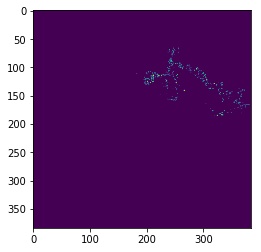

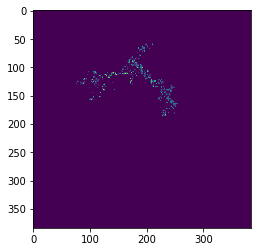

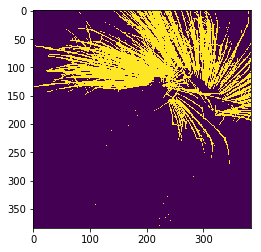

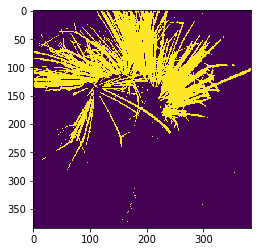

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picL))
picR = 18158
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picR))
FrameLSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picL,picL))
FrameRSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picR,picR))
picR = 18158
v0L = FrameL[0]
v0R = FrameR[0]
plt.figure()
plt.imshow(v0L)
plt.show()
plt.figure()
plt.imshow(v0R)
plt.show()
plt.figure()
plt.imshow(FrameLSum[0])
plt.show()
plt.figure()
plt.imshow(FrameRSum[0])
plt.show()

In [2]:
###################################
#Locate Features; single frame test
###################################
#plt.figure()
#plt.imshow(FrameL[100])
#plt.show()
print(np.max(FrameL[100]))
f = tp.locate(FrameL[100], 7, minmass=200) 
# 7 means the pixel of the size of the feature. It has to be odd. 
#minmass can be determined by the mass distribution below. 
#Since we already apply data-cleaning, it is not necessary to apply minmass here.
f.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,157.087221,3.789047,263.826686,1.320766,0.158558,42.544060,382.0,0.001642,100
1,173.166893,3.999093,589.997812,1.774345,0.244095,52.444250,747.0,0.000840,100
2,212.441973,4.670213,276.670176,1.513958,0.116278,36.657460,409.0,0.001533,100
3,194.955005,10.952250,291.386675,1.352819,0.188914,44.149496,340.0,0.001845,100
4,205.024691,11.658730,303.427446,1.344202,0.144332,47.092796,400.0,0.001568,100


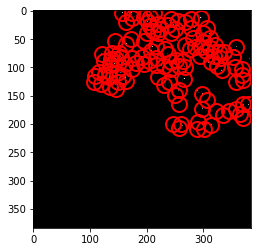

In [3]:
#Show points located. It will be better to have more points rather than missing points.
plt.figure()  # make a new figure
tp.annotate(f, FrameL[100]);

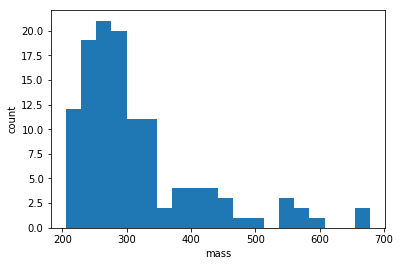

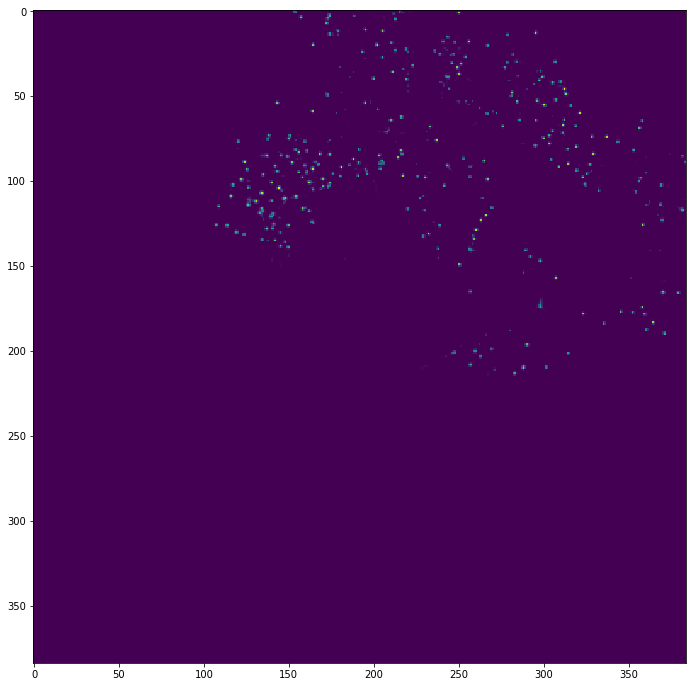

In [4]:
#Show 'mass' distribution
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');
plt.figure(figsize=(12,12))
plt.imshow(FrameL[100])
plt.show()

In [5]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
fL = tp.batch(FrameL, 7, minmass=200);
tL = tp.link_df(fL, 5, memory=3)
#tL.head()

Frame 369: 2 trajectories present


In [6]:
tL1 = tp.filter_stubs(tL, 50)
print('Before:', tL['particle'].nunique())
print('After:', tL1['particle'].nunique())

('Before:', 475)
('After:', 124)


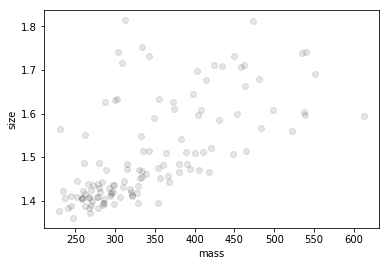

In [7]:
plt.figure()
tp.mass_size(tL1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

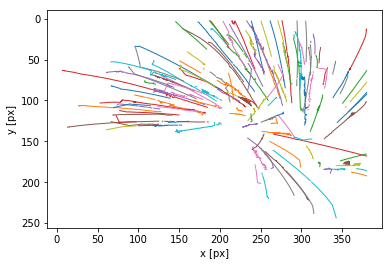

In [8]:
plt.figure()
tp.plot_traj(tL1);
tL1.to_csv('FrameL.csv')

In [9]:
# Left frame
fR = tp.batch(FrameR, 7, minmass=200);
tR = tp.link_df(fR, 5, memory=3)

Frame 369: 5 trajectories present


In [10]:
tR1 = tp.filter_stubs(tR, 50)
print('Before:', tR['particle'].nunique())
print('After:', tR1['particle'].nunique())

('Before:', 457)
('After:', 147)


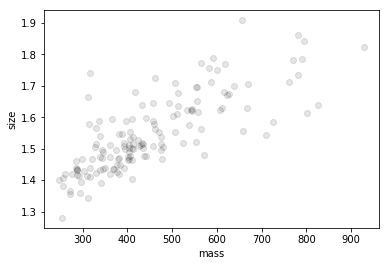

In [11]:
plt.figure()
tp.mass_size(tR1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

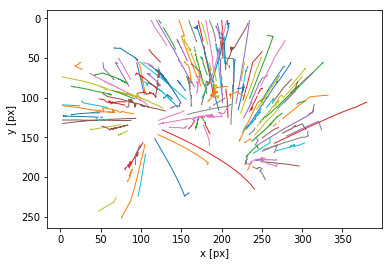

In [12]:
plt.figure()
tp.plot_traj(tR1);
tR1.to_csv('FrameR.csv')

In [13]:
print(len(tR))
plt.figure(figsize=[12,12])
plt.imshow(FrameRSum[0])
for ip in range(len(tR)):
#for ip in range(1000,1200):
    x = tR['x'][ip]
    y = tR['y'][ip]
    print(ip,x,y)
    plt.scatter(x,y,s=0.3,c='g')
#plt.show()
plt.savefig('frameR.tif')

21592
(0, 210.28239499553172, 59.953529937444145)
(1, 211.17097966728281, 57.963031423290204)
(2, 212.05293005671078, 55.965028355387524)
(3, 212.99563318777294, 53.929257641921396)
(4, 213.89818181818183, 51.966363636363639)
(5, 214.79685966633954, 50.02944062806673)
(6, 215.66444232602478, 48.112488083889417)
(7, 216.55943396226414, 46.18679245283019)
(8, 217.34746543778803, 44.315207373271889)
(9, 218.19960861056751, 42.409980430528378)
(10, 219.06, 40.605714285714285)
(11, 219.9507299270073, 38.692518248175183)
(12, 220.81371640407784, 36.85356811862836)
(13, 221.65277777777777, 35.022817460317462)
(14, 222.44395604395604, 33.220879120879118)
(15, 223.27321237993596, 31.409818569903948)
(16, 224.06820461384152, 29.643931795386159)
(17, 224.95306859205778, 27.831227436823106)
(18, 225.75139146567719, 26.064935064935064)
(19, 226.55506607929516, 24.325991189427313)
(20, 227.25112917795843, 22.674796747967481)
(21, 228.0598146588037, 20.916596461668071)
(22, 228.89932318104906, 19.154

(193, 151.31651693158258, 26.248099516240497)
(194, 151.25611510791367, 25.261151079136692)
(195, 151.14135702746364, 24.258481421647819)
(196, 150.39183318853171, 23.419635099913119)
(197, 150.23642732049038, 22.419439579684763)
(198, 154.01075268817203, 22.53942652329749)
(199, 153.22134038800706, 21.470017636684304)
(200, 153.28458498023716, 20.926482213438735)
(201, 153.514440433213, 20.518050541516246)
(202, 153.13804713804714, 19.696969696969695)
(203, 152.8955223880597, 18.901806755695208)
(204, 152.62635529608008, 18.21601334445371)
(205, 152.49687010954617, 17.586071987480437)
(206, 152.26835236541598, 16.898042414355629)
(207, 152.01232539030403, 16.225143796220213)
(208, 151.71404682274249, 15.472408026755852)
(209, 151.55518112889638, 14.8424599831508)
(210, 151.38936535162949, 14.259005145797598)
(211, 151.12850467289721, 13.535046728971963)
(212, 150.81741787624139, 12.844919786096256)
(213, 150.64296520423602, 12.271558245083208)
(214, 150.48996913580248, 11.640432098765

(384, 171.28314337132574, 4.3335332933413317)
(385, 171.08722919042188, 3.5923603192702394)
(386, 171.49837133550488, 3.4925081433224756)
(387, 201.19239746582195, 106.41147049016338)
(388, 201.15195417789758, 105.27291105121294)
(389, 201.10777202072538, 104.16373056994819)
(390, 201.03434980722048, 103.48755695758851)
(391, 201.10225618631733, 101.45997088791849)
(392, 201.05933158092378, 100.37063462260609)
(393, 201.04812082894276, 99.28731998595012)
(394, 201.01367941073309, 98.232549982462288)
(395, 200.99290250280166, 97.177810982443035)
(396, 201.0110599078341, 95.522580645161284)
(397, 200.57710181664555, 95.784114913392486)
(398, 200.52705410821642, 94.766733466933871)
(399, 200.48759007205766, 93.776220976781431)
(400, 200.43505617977527, 92.781123595505619)
(401, 200.37685318029651, 91.806791009086567)
(402, 200.3257299270073, 90.828010948905103)
(403, 200.29134917077545, 89.847153742716273)
(404, 200.78656853725852, 87.181692732290713)
(405, 200.76198856137265, 86.16014078

(568, 189.46203438395415, 105.0272206303725)
(569, 189.32102272727272, 104.06178977272727)
(570, 189.23115942028986, 102.96666666666667)
(571, 188.99436392914654, 101.88003220611917)
(572, 188.42775119617224, 100.98181818181818)
(573, 188.27230483271376, 99.931226765799252)
(574, 187.93820803295571, 99.418125643666329)
(575, 187.171875, 98.744791666666671)
(576, 186.01719690455718, 97.82459157351677)
(577, 184.3933393339334, 96.85418541854186)
(578, 184.99203187250995, 96.11075697211156)
(579, 184.95056497175142, 95.415254237288138)
(580, 185.0231923601637, 94.849249658935875)
(581, 185.0695596681557, 94.128270580727502)
(582, 185.07214323328068, 93.622959452343338)
(583, 185.03323558162268, 92.865102639296182)
(584, 185.00876740587933, 92.223826714801447)
(585, 185.15305010893246, 91.655773420479306)
(586, 185.09619952494063, 90.925178147268412)
(587, 108.13304473304473, 109.66695526695527)
(588, 107.68183071408878, 108.91508133443617)
(589, 106.82225433526011, 108.21734104046243)
(59

(756, 162.53896713615023, 98.392488262910803)
(757, 162.57531380753139, 97.55910041841004)
(758, 162.50798122065729, 97.472769953051639)
(759, 162.54156419085095, 97.539104771273983)
(760, 161.56900726392251, 98.144673123486683)
(761, 161.50686498855836, 97.840961098398168)
(762, 161.41379310344828, 97.604679802955658)
(763, 161.43661137440759, 97.356042654028442)
(764, 161.38095238095238, 96.826007326007328)
(765, 161.33253301320528, 96.662665066026406)
(766, 161.34474175482265, 96.393901680149341)
(767, 161.31960663798401, 96.194222495390292)
(768, 161.32162764771459, 95.973801560758076)
(769, 161.26501035196688, 95.86904761904762)
(770, 161.23344370860926, 95.726821192052981)
(771, 161.26246246246245, 95.344744744744744)
(772, 161.24356103023516, 95.097984322508395)
(773, 161.21254732287724, 94.958896700919411)
(774, 161.16739130434783, 94.863043478260863)
(775, 161.16160990712075, 94.734365325077405)
(776, 161.17633136094673, 94.272189349112423)
(777, 161.16074548631335, 94.0390215

(939, 119.12971481140754, 108.97010119595217)
(940, 118.51944444444445, 108.83944444444444)
(941, 118.05423094904161, 108.72884525479196)
(942, 117.33617234468937, 108.11122244488978)
(943, 116.54207345420734, 108.00697350069736)
(944, 116.28428796636889, 107.92065160273253)
(945, 115.20303867403315, 107.78637200736648)
(946, 115.05910390848427, 107.22116301239275)
(947, 114.04835513277844, 107.24573919936583)
(948, 113.41938724259167, 107.04922149673531)
(949, 113.20295809367296, 106.74239934264585)
(950, 113.05022831050228, 106.66625155666252)
(951, 112.29512635379061, 106.14440433212997)
(952, 112.13098115031416, 105.95263412276462)
(953, 111.50324837581209, 105.63818090954523)
(954, 111.27290076335878, 105.27242366412214)
(955, 111.01687186502508, 104.98951208390334)
(956, 110.46153846153847, 104.88607594936708)
(957, 110.59789156626506, 104.67218875502007)
(958, 110.0162213740458, 104.01526717557252)
(959, 109.23229750382069, 104.10086602139582)
(960, 108.41741935483871, 104.10967

(1123, 59.401229823212915, 90.13604919292851)
(1124, 59.176236044657095, 90.123604465709732)
(1125, 59.003259983700083, 90.125509372453138)
(1126, 58.825665859564168, 90.062146892655363)
(1127, 58.604231974921632, 90.028213166144198)
(1128, 58.364263803680984, 90.000766871165638)
(1129, 58.195569136745604, 89.98013750954928)
(1130, 58.026612077789153, 89.949846468781985)
(1131, 57.812641083521441, 89.919864559819416)
(1132, 57.606546854942231, 89.887676508344029)
(1133, 57.438748335552596, 89.916111850865519)
(1134, 57.160583941605836, 89.999270072992701)
(1135, 57.00056338028169, 90.029859154929582)
(1136, 56.823310601363914, 89.977061376317423)
(1137, 56.661177960734641, 89.925902469917673)
(1138, 56.503744043567053, 89.556160653505785)
(1139, 56.257485029940121, 89.467921300256634)
(1140, 56.156424581005588, 89.370311252992821)
(1141, 56.047039740470396, 89.23763179237632)
(1142, 55.910488245931283, 89.110307414104881)
(1143, 55.738949124270228, 89.001668056713925)
(1144, 55.5863219

(1310, 117.43261012491782, 86.405654174884944)
(1311, 117.55403726708074, 86.095652173913038)
(1312, 117.18948521358161, 86.02190580503833)
(1313, 117.10054844606947, 85.84765386959171)
(1314, 116.95567567567568, 85.749729729729737)
(1315, 116.86194690265486, 85.643067846607664)
(1316, 116.50463821892393, 85.627705627705623)
(1317, 116.29259525521208, 85.578001437814521)
(1318, 116.15236523652365, 85.482948294829484)
(1319, 116.40734055354994, 85.143200962695545)
(1320, 116.03954496208017, 85.173889490790899)
(1321, 115.9447983014862, 85.052547770700642)
(1322, 115.90237175951462, 84.912851627137343)
(1323, 115.70424107142857, 84.744977678571431)
(1324, 115.18746680828465, 84.791821561338296)
(1325, 115.11640498105035, 84.691932864103947)
(1326, 115.05081081081082, 84.599459459459453)
(1327, 115.04463336875664, 84.406482465462275)
(1328, 114.97516198704103, 84.301295896328298)
(1329, 114.856033143449, 84.220611082340753)
(1330, 114.73827893175074, 84.135311572700303)
(1331, 114.2451612

(1486, 189.71976149914821, 85.113713798977855)
(1487, 189.72131887985546, 84.188798554652209)
(1488, 189.74861760952786, 83.346660995321145)
(1489, 189.71270280965572, 82.842896715472889)
(1490, 189.81785428342675, 82.027622097678147)
(1491, 189.44753363228699, 81.23632286995516)
(1492, 189.70983213429255, 80.342925659472428)
(1493, 190.47223845704266, 79.832846288720049)
(1494, 188.32279757901816, 78.141223940820439)
(1495, 188.13059163059162, 77.499278499278503)
(1496, 187.95586107091171, 76.657018813314039)
(1497, 187.75992063492063, 75.863095238095241)
(1498, 187.57355021216406, 75.053748231966054)
(1499, 187.24757281553397, 74.123786407766985)
(1500, 187.15717227179135, 73.647906657515449)
(1501, 186.92839657282741, 72.821909424724609)
(1502, 186.74427480916032, 72.040076335877856)
(1503, 186.64633354964309, 71.509409474367288)
(1504, 186.44723618090453, 70.761306532663312)
(1505, 186.19418019026301, 69.909904868494678)
(1506, 185.97155361050329, 69.136761487964989)
(1507, 185.894

(1667, 79.135511515800744, 118.20032137118372)
(1668, 78.080181543116495, 118.07665153807362)
(1669, 76.906211936662601, 117.59622411693057)
(1670, 75.835460040295501, 117.4076561450638)
(1671, 75.709959623149388, 118.68775235531629)
(1672, 74.694087403598971, 118.62467866323908)
(1673, 73.652941176470591, 118.67320261437908)
(1674, 71.348635235732004, 116.97766749379653)
(1675, 70.299741602067186, 116.21770025839793)
(1676, 69.268803945745987, 116.08199753390875)
(1677, 68.214449541284409, 115.95240825688073)
(1678, 67.126066973079446, 115.49113591595535)
(1679, 66.069602272727266, 115.30681818181819)
(1680, 65.058486967577878, 115.12015257469803)
(1681, 64.058052434456926, 114.97315855181024)
(1682, 63.028628495339547, 114.5525965379494)
(1683, 61.989287964713299, 114.44801512287334)
(1684, 60.941678520625892, 114.31792318634425)
(1685, 59.949235048678723, 114.12517385257301)
(1686, 58.974838709677421, 113.99935483870968)
(1687, 58.022014676450965, 113.83722481654436)
(1688, 57.06201

(1861, 207.48096118299446, 119.02883548983364)
(1862, 207.44845158761271, 118.10623284986279)
(1863, 207.81334332833583, 117.14805097451274)
(1864, 207.78227224762574, 116.72951107984524)
(1865, 207.81044828803388, 115.31733145075891)
(1866, 207.39064801178202, 114.95103092783505)
(1867, 207.37974155898291, 114.08711963318049)
(1868, 207.76767676767676, 113.14141414141415)
(1869, 207.77345350266285, 112.26177795985252)
(1870, 207.34582623509371, 111.86626916524702)
(1871, 207.33508914100486, 111.05591572123177)
(1872, 207.34036029129936, 110.21042545036413)
(1873, 207.33625091174326, 109.37053245805981)
(1874, 207.25625920471282, 108.879970544919)
(1875, 207.26493506493506, 108.08534322820037)
(1876, 207.26105024556102, 107.25613902531167)
(1877, 207.17923823749067, 106.74906646751307)
(1878, 207.16556291390728, 105.97976453274467)
(1879, 207.17640692640691, 105.18037518037518)
(1880, 207.07530120481928, 104.69164156626506)
(1881, 207.06931089743588, 103.92828525641026)
(1882, 207.0792

(2040, 66.941526263627352, 128.90336967294351)
(2041, 65.910886075949364, 128.87341772151899)
(2042, 64.863952865559725, 128.85270487412961)
(2043, 63.664719626168221, 128.58878504672896)
(2044, 62.623414071510958, 128.58535178777393)
(2045, 61.637772675086111, 128.59471871412171)
(2046, 60.894627021387585, 128.89306207616067)
(2047, 59.670347874102703, 128.59801214798455)
(2048, 58.70286396181384, 128.57577565632459)
(2049, 57.7280385078219, 128.54632972322503)
(2050, 56.782805429864254, 128.52545248868779)
(2051, 55.837101449275366, 128.50492753623189)
(2052, 55.188487584650112, 128.81207674943568)
(2053, 54.241013553329402, 128.79198585739542)
(2054, 53.25868725868726, 128.75546975546976)
(2055, 52.295942720763726, 128.71181384248209)
(2056, 51.476552598225602, 128.5982256020279)
(2057, 50.544217687074827, 128.57204700061843)
(2058, 49.652846534653463, 128.54084158415841)
(2059, 48.71948356807512, 128.51173708920189)
(2060, 48.094602114635506, 128.83528102392876)
(2061, 47.123893805

(2230, 173.6685288640596, 125.45158286778398)
(2231, 173.56066314996232, 124.96834966088922)
(2232, 172.29025844930416, 123.39463220675944)
(2233, 174.49492583918814, 125.06479313036689)
(2234, 174.63601532567048, 124.8896551724138)
(2235, 173.4738598442714, 123.27474972191324)
(2236, 175.52978554408261, 124.96108022239873)
(2237, 174.31410256410257, 123.30494505494505)
(2238, 175.93100358422939, 124.70878136200717)
(2239, 175.08333333333334, 123.43468468468468)
(2240, 175.3083264633141, 123.30502885408079)
(2241, 176.91666666666666, 124.60956790123457)
(2242, 176.04731861198738, 123.3698738170347)
(2243, 176.28003003003002, 123.25075075075075)
(2244, 177.93794749403341, 124.56881463802705)
(2245, 178.59530261969286, 124.87624209575429)
(2246, 177.28972783143109, 123.18788410886742)
(2247, 179.01535312180144, 124.6028659160696)
(2248, 179.5960591133005, 124.77586206896552)
(2249, 178.25046904315198, 123.08818011257036)
(2250, 178.2509433962264, 122.37075471698114)
(2251, 181.0151802656

(2416, 212.29537767756483, 119.96166854565952)
(2417, 212.2899126290707, 119.54924543288324)
(2418, 212.43905191873588, 118.76410835214448)
(2419, 212.51077265973254, 118.03603268945022)
(2420, 212.5774697938877, 117.30561478322673)
(2421, 212.58460471567267, 116.8997919556172)
(2422, 212.65608663181479, 116.18932038834951)
(2423, 212.72130503144655, 115.4622641509434)
(2424, 212.71438721136767, 115.0866785079929)
(2425, 212.79640044994375, 114.35845519310087)
(2426, 212.77598828696927, 113.99121522693997)
(2427, 212.86097946287521, 113.30055292259084)
(2428, 212.84765129073213, 112.92805755395683)
(2429, 212.93427419354839, 112.22016129032258)
(2430, 213.02655935613683, 111.49376257545272)
(2431, 213.00702576112411, 111.11826697892272)
(2432, 213.09244406922753, 110.41325453777965)
(2433, 213.10737736577829, 110.02433371958286)
(2434, 213.18699515347333, 109.34410339256866)
(2435, 213.18382628229128, 108.96967427929614)
(2436, 213.28588661037395, 108.28387615601126)
(2437, 213.2470765

(2593, 215.00656167979002, 54.202755905511808)
(2594, 215.0, 54.005656819610309)
(2595, 214.98518995492594, 53.811976819059886)
(2596, 214.9815157116451, 53.624768946395562)
(2597, 214.96815286624204, 53.430225825130286)
(2598, 214.96417910447761, 53.260895522388061)
(2599, 214.96288933068257, 53.058979456593768)
(2600, 214.95575797007157, 52.863370201691609)
(2601, 214.9302176696543, 52.674775928297052)
(2602, 214.93429286608261, 52.52690863579474)
(2603, 214.92642550582465, 52.299202942979768)
(2604, 214.89963724304715, 52.157799274486095)
(2605, 214.90064620355412, 51.959612277867528)
(2606, 214.88007054673722, 51.784832451499121)
(2607, 214.88340486409155, 51.59084406294707)
(2608, 214.87206965840591, 51.355659745478903)
(2609, 214.84871311989957, 51.156308851224104)
(2610, 214.79572338489535, 51.045040946314835)
(2611, 214.75238527941843, 50.882780554293504)
(2612, 214.85352798053529, 50.718248175182481)
(2613, 214.42038567493114, 50.787327823691463)
(2614, 214.1229090909091, 50.7

(2782, 227.19845857418113, 142.45616570327553)
(2783, 227.30693991616209, 141.08989287377736)
(2784, 227.50097181729834, 140.22351797862001)
(2785, 227.94285714285715, 139.40581113801454)
(2786, 228.20536635706915, 139.27554179566565)
(2787, 229.00632911392404, 140.6398158803222)
(2788, 228.91029023746702, 138.31503957783642)
(2789, 229.0391091797936, 137.39163498098858)
(2790, 229.3095890410959, 137.16986301369863)
(2791, 230.38851351351352, 139.63918918918918)
(2792, 230.89522342064714, 139.66718027734976)
(2793, 231.06295081967212, 138.92262295081966)
(2794, 230.35940660822658, 134.94268374915711)
(2795, 231.85342465753425, 138.71986301369864)
(2796, 232.00922509225092, 138.04366543665438)
(2797, 232.17798060467769, 137.21163719338278)
(2798, 232.51112447384244, 137.08899579073963)
(2799, 232.89834660134721, 137.11145131659524)
(2800, 233.23458282950423, 136.86638452237003)
(2801, 233.43001186239621, 136.23428232502965)
(2802, 233.7801293356849, 136.19517930629041)
(2803, 234.077680

(2968, 139.34701159678858, 191.57091882247994)
(2969, 139.59018036072143, 191.93587174348698)
(2970, 139.80353982300886, 192.29646017699116)
(2971, 139.97799043062201, 192.688995215311)
(2972, 140.17103984450924, 193.06802721088437)
(2973, 140.35283687943263, 193.45567375886526)
(2974, 140.56860902255639, 193.88063909774436)
(2975, 140.7841091492777, 194.18619582664527)
(2976, 140.95869356388087, 194.58693563880882)
(2977, 141.14962593516211, 194.92851205320034)
(2978, 141.31587697423109, 195.30839567747299)
(2979, 141.52199661590524, 195.73857868020303)
(2980, 141.69347133757961, 196.06130573248407)
(2981, 141.91059907834102, 196.42488479262673)
(2982, 142.07296849087894, 196.80182421227198)
(2983, 142.2422586520947, 197.13479052823314)
(2984, 142.40660225442835, 197.53140096618358)
(2985, 142.63714531384352, 197.90025795356837)
(2986, 142.81376146788992, 198.22293577981651)
(2987, 142.96826835902084, 198.60562103354488)
(2988, 143.14920368818105, 198.92791282481139)
(2989, 143.305263

(3144, 227.07145877378434, 143.96955602536997)
(3145, 227.17196904557179, 143.75666380051589)
(3146, 227.27021276595744, 143.59659574468085)
(3147, 227.41359303771239, 143.12142561127229)
(3148, 227.48920000000001, 142.94319999999999)
(3149, 227.66423653300933, 142.69542324827864)
(3150, 227.75312500000001, 142.54726562499999)
(3151, 227.9222264582539, 142.02439954250858)
(3152, 228.00808229243202, 141.89199118295372)
(3153, 228.09593949044586, 141.7328821656051)
(3154, 228.18611632270168, 141.60375234521575)
(3155, 228.3243445692884, 141.03520599250936)
(3156, 228.40290060134419, 140.87760877255042)
(3157, 228.57507288629736, 140.76056851311952)
(3158, 228.68983583653511, 140.17638840377228)
(3159, 228.77393520203859, 140.0232981434292)
(3160, 228.85780969479353, 139.87289048473968)
(3161, 228.97220135236665, 139.26483846731782)
(3162, 229.06128550074737, 139.16928251121075)
(3163, 229.17500913408841, 138.4146876141761)
(3164, 229.22162162162161, 138.15472972972972)
(3165, 229.2982031

(3329, 242.32192846034215, 111.14502332814931)
(3330, 242.36277732128184, 111.06532456861135)
(3331, 242.39209839731643, 110.99590011181513)
(3332, 242.43413729128014, 110.9213358070501)
(3333, 242.59094339622641, 110.83056603773585)
(3334, 242.62926347009392, 110.7380128521997)
(3335, 242.66386554621849, 110.65826330532212)
(3336, 242.72051009564294, 110.59298618490968)
(3337, 242.74702108157655, 110.38496791934006)
(3338, 242.78581427904805, 110.30564629024731)
(3339, 242.82246513381079, 110.23332076894083)
(3340, 242.84482758620689, 110.14617691154423)
(3341, 242.88678485092666, 110.08340048348106)
(3342, 242.92834890965733, 110.0101246105919)
(3343, 242.97022900763358, 109.93015267175572)
(3344, 243.00543724512914, 109.84277299501586)
(3345, 243.04793196752996, 109.77348279860843)
(3346, 243.08634461772536, 109.70292887029289)
(3347, 243.12214312476584, 109.6335706257025)
(3348, 243.16243093922651, 109.43278084714549)
(3349, 243.19173492181682, 109.37416232315711)
(3350, 243.228399

(3512, 255.14362360709865, 139.45604622368964)
(3513, 255.33883299798794, 138.76780684104628)
(3514, 255.99574961360125, 138.62326120556415)
(3515, 256.16344667697064, 137.96522411128285)
(3516, 256.84307239985299, 137.79051819184124)
(3517, 257.12027631044293, 137.4973587972369)
(3518, 257.2798789712557, 136.87481089258699)
(3519, 257.92319810949192, 136.70618353682553)
(3520, 258.0735294117647, 136.09879336349925)
(3521, 258.37339228295821, 135.80707395498393)
(3522, 259.0264064293915, 135.62916188289321)
(3523, 259.15360127337846, 135.03382411460404)
(3524, 259.44208873184141, 134.74087161366313)
(3525, 260.59287859287861, 134.78249678249679)
(3526, 260.18904526435909, 134.00912894636744)
(3527, 260.28234771009335, 133.45086705202311)
(3528, 261.61724845995894, 133.77166324435319)
(3529, 261.2062726176116, 133.01688781664657)
(3530, 261.26901347240329, 132.46153846153845)
(3531, 261.55247614720582, 132.19082235347568)
(3532, 262.19368246051539, 132.05153782211138)
(3533, 262.2503352

(3701, 280.06170300287948, 137.94734677087618)
(3702, 280.16986179224256, 137.71199286669639)
(3703, 281.10305192231471, 137.31906460562823)
(3704, 281.19324497648569, 137.06797776827705)
(3705, 282.07569875776397, 136.75504658385094)
(3706, 282.978102189781, 136.37996755879968)
(3707, 283.08346333853353, 136.14664586583464)
(3708, 283.1820359281437, 135.89780439121756)
(3709, 284.06316202432328, 135.61200470772852)
(3710, 284.19113149847095, 135.29548929663608)
(3711, 285.05827067669173, 135.01428571428571)
(3712, 285.13260953858082, 134.77743311360993)
(3713, 286.0516795865633, 134.40051679586563)
(3714, 286.91205569805788, 134.15573470135581)
(3715, 287.01523545706374, 133.92174515235456)
(3716, 287.88542372881358, 133.67898305084745)
(3717, 287.995232856619, 133.34470113678034)
(3718, 288.88801099278601, 133.11851597389213)
(3719, 288.95604395604397, 132.89523809523808)
(3720, 289.85375638220279, 132.6560904449307)
(3721, 289.9458262350937, 132.32265758091992)
(3722, 290.8167712116

(3881, 274.44086956521738, 183.23826086956521)
(3882, 274.96003552397866, 183.30639431616342)
(3883, 275.39368061485908, 183.32365499573015)
(3884, 275.90346083788705, 183.40892531876139)
(3885, 276.34353741496597, 183.43282312925169)
(3886, 276.84767025089604, 183.57347670250897)
(3887, 277.27801179443975, 183.63100252737996)
(3888, 277.75567665758399, 183.67302452316076)
(3889, 278.17597292724196, 183.7165820642978)
(3890, 278.65045045045048, 183.77117117117118)
(3891, 279.05442176870747, 183.8137755102041)
(3892, 279.44363636363636, 183.86181818181819)
(3893, 279.91404255319151, 183.92085106382979)
(3894, 280.30577777777779, 183.95466666666667)
(3895, 280.77077865266841, 184.01049868766404)
(3896, 281.13541666666669, 184.05397727272728)
(3897, 281.59286367795062, 184.11893870082343)
(3898, 281.9462465245598, 184.15106580166821)
(3899, 282.31184834123223, 184.20758293838861)
(3900, 282.7366515837104, 184.21538461538461)
(3901, 283.08723021582733, 184.32194244604315)
(3902, 283.454624

(4058, 251.02888222055515, 178.9714928732183)
(4059, 249.58495954307472, 177.40028557829606)
(4060, 249.46957355055102, 177.39770004791566)
(4061, 249.33663943990666, 177.2024504084014)
(4062, 249.22828282828283, 177.04393939393938)
(4063, 249.14808362369337, 176.87049941927989)
(4064, 249.15281501340482, 176.70710455764075)
(4065, 249.28895184135976, 176.55429650613786)
(4066, 249.44148148148147, 176.42962962962963)
(4067, 249.92545799115604, 176.0612760581175)
(4068, 249.94125242091673, 176.04841833440929)
(4069, 249.95013123359581, 176.01377952755905)
(4070, 250.0, 176.05775922059846)
(4071, 250.03690303907382, 176.07525325615052)
(4072, 249.99209138840069, 176.43145869947276)
(4073, 250.04503582395088, 176.47492323439099)
(4074, 250.1233031674208, 176.51470588235293)
(4075, 250.18655967903712, 176.51554663991976)
(4076, 250.22545757071546, 176.53660565723794)
(4077, 250.2925060435133, 176.53505237711522)
(4078, 250.3416, 176.56479999999999)
(4079, 250.39310344827587, 176.5732758620

(4248, 306.69464285714287, 145.13928571428571)
(4249, 306.6563400576369, 144.96037463976944)
(4250, 306.67041461700632, 144.85945186226283)
(4251, 306.66233766233768, 144.66955266955267)
(4252, 306.71556642216791, 144.34474327628362)
(4253, 306.77455357142856, 144.17857142857142)
(4254, 306.84496124031006, 144.01119724375539)
(4255, 306.97554347826087, 143.81431159420291)
(4256, 307.03040540540542, 143.46621621621622)
(4257, 307.11490978157644, 143.29344729344729)
(4258, 307.15084388185653, 143.10759493670886)
(4259, 307.23982398239826, 142.91859185918591)
(4260, 307.27159090909089, 142.77727272727273)
(4261, 307.2456608811749, 142.63284379172231)
(4262, 307.32848837209303, 142.33575581395348)
(4263, 307.25266362252665, 142.22983257229833)
(4264, 196.84140969162996, 68.174743024963291)
(4265, 197.68711656441718, 66.568251533742327)
(4266, 198.01856148491879, 65.23433874709977)
(4267, 198.75127334465196, 63.796264855687603)
(4268, 199.81255028157682, 60.93000804505229)
(4269, 200.545367

(4430, 114.44364161849711, 67.328034682080926)
(4431, 113.95277449822905, 66.942148760330582)
(4432, 113.55403556771546, 66.55677154582763)
(4433, 112.92238033635188, 66.086675291073732)
(4434, 112.42307692307692, 65.744031830238725)
(4435, 111.96050955414013, 65.257324840764326)
(4436, 111.39690721649484, 64.905927835051543)
(4437, 110.94110576923077, 64.525240384615387)
(4438, 110.42049934296978, 64.089356110381075)
(4439, 109.95772946859904, 63.764492753623188)
(4440, 109.44877344877345, 63.303030303030305)
(4441, 108.96762141967622, 62.962640099626398)
(4442, 108.53151862464183, 62.593123209169057)
(4443, 108.01748251748252, 62.144522144522142)
(4444, 107.61498708010336, 61.838501291989665)
(4445, 107.09056603773585, 61.412578616352199)
(4446, 106.69220945083013, 61.06002554278416)
(4447, 106.13268998793727, 60.786489746682747)
(4448, 105.74683544303798, 60.310126582278478)
(4449, 105.26599749058971, 59.992471769134255)
(4450, 104.85994764397905, 59.684554973821989)
(4451, 104.4194

(4610, 276.29838226482923, 71.164769322947876)
(4611, 276.45605022831052, 70.925228310502277)
(4612, 276.65009208103129, 70.699815837937379)
(4613, 276.80338134001255, 70.419536631183462)
(4614, 276.96869462492617, 70.210277613703482)
(4615, 277.13214285714287, 69.97071428571428)
(4616, 277.29838187702268, 69.755339805825244)
(4617, 277.43858431644691, 69.551006245662734)
(4618, 277.61599471249173, 69.294117647058826)
(4619, 277.75784487862643, 69.063351095322673)
(4620, 277.89121813031164, 68.836827195467421)
(4621, 278.03987730061351, 68.644171779141104)
(4622, 278.20531400966183, 68.381642512077292)
(4623, 278.34654017857144, 68.181919642857139)
(4624, 278.48544819557623, 67.963911525029104)
(4625, 278.68960063266115, 67.740608936338475)
(4626, 278.80313111545991, 67.450489236790602)
(4627, 278.90873869995693, 67.261300043047783)
(4628, 279.06505469199772, 67.074841681059297)
(4629, 279.23972602739724, 66.81133250311332)
(4630, 279.38829787234044, 66.597739361702125)
(4631, 279.5706

(4786, 158.39415322580646, 165.39818548387098)
(4787, 158.76046738072054, 165.66991236611489)
(4788, 158.99184043517678, 165.8105167724388)
(4789, 159.21672661870502, 165.95143884892087)
(4790, 159.58531746031747, 166.06448412698413)
(4791, 159.86999109528051, 166.19501335707926)
(4792, 160.06878306878306, 166.35097001763668)
(4793, 160.33371428571428, 166.59885714285716)
(4794, 160.7148047229791, 166.78564940962761)
(4795, 160.93879668049792, 166.89937759336101)
(4796, 161.17102396514161, 167.03485838779957)
(4797, 161.43275632490014, 167.14780292942743)
(4798, 161.77659574468086, 167.32688588007736)
(4799, 162.0, 167.56360259981429)
(4800, 162.19742883379246, 167.722681359045)
(4801, 162.54158790170132, 167.89130434782609)
(4802, 162.81042654028437, 167.99336492890995)
(4803, 163.02661596958174, 168.11977186311788)
(4804, 163.23040152963671, 168.23804971319311)
(4805, 163.5758323057953, 168.45006165228114)
(4806, 163.85844748858449, 168.68150684931507)
(4807, 164.04535864978902, 168.

(4971, 237.73036896877957, 166.75780510879849)
(4972, 237.83853702051741, 166.63425512934879)
(4973, 237.94589552238807, 166.544776119403)
(4974, 238.04095238095238, 166.44285714285715)
(4975, 238.14872262773721, 166.32664233576642)
(4976, 238.24863387978141, 166.22404371584699)
(4977, 238.348134991119, 166.14031971580818)
(4978, 238.43653516295026, 166.04288164665522)
(4979, 238.54730983302412, 165.94434137291279)
(4980, 238.60680034873585, 165.85789014821273)
(4981, 238.69816513761467, 165.76055045871558)
(4982, 238.78347826086957, 165.67043478260871)
(4983, 238.89055604589586, 165.5631067961165)
(4984, 238.98586866167915, 165.45552784704904)
(4985, 239.08496176720476, 165.37298215802889)
(4986, 239.18377911993099, 165.28127696289906)
(4987, 239.26019080659151, 165.20901994796185)
(4988, 239.3553431798436, 165.11294526498696)
(4989, 239.43243243243242, 165.03716216216216)
(4990, 239.52428810720269, 164.95309882747068)
(4991, 239.5967596759676, 164.87578757875787)
(4992, 239.681818181

(5149, 149.28089275993469, 151.39357648339686)
(5150, 149.81085918854416, 151.65692124105013)
(5151, 150.28940142778694, 151.89181768259198)
(5152, 150.79485609308023, 152.13900796080833)
(5153, 151.26277372262774, 152.36889387984277)
(5154, 151.78888888888889, 152.63625730994153)
(5155, 152.25143513203216, 152.86796785304247)
(5156, 152.74283973187082, 153.09689213893967)
(5157, 153.205694363742, 153.34631028471819)
(5158, 153.71530249110322, 153.60083036773429)
(5159, 154.18502738892269, 153.82836275106513)
(5160, 154.67959427207637, 154.0799522673031)
(5161, 155.14533085961656, 154.31787260358689)
(5162, 155.62213527110117, 154.57406372275014)
(5163, 156.08149910767401, 154.76799524092803)
(5164, 156.55775764439412, 155.00906002265006)
(5165, 157.03191489361703, 155.2724586288416)
(5166, 157.46315192743765, 155.54591836734693)
(5167, 157.9690837549185, 155.73468240584597)
(5168, 158.41796200345422, 155.96430627518711)
(5169, 158.90576198169089, 156.21055465805063)
(5170, 159.3452508

(5331, 214.70927601809956, 190.00113122171945)
(5332, 214.94476557482338, 190.15221579961465)
(5333, 215.19470699432893, 190.35160680529302)
(5334, 215.40754923413567, 190.66466083150985)
(5335, 215.766391184573, 190.8236914600551)
(5336, 215.96821071752953, 190.98274296094459)
(5337, 216.19188544152743, 191.15513126491646)
(5338, 216.41107561235356, 191.30138445154421)
(5339, 216.76710929519919, 191.61235955056179)
(5340, 216.96886973180077, 191.76436781609195)
(5341, 217.20467502850627, 191.9532497149373)
(5342, 217.38766730401531, 192.11902485659655)
(5343, 217.72459770114943, 192.2951724137931)
(5344, 217.9421524663677, 192.59820627802691)
(5345, 218.14142295940638, 192.75600174596246)
(5346, 218.35849889624723, 192.94304635761588)
(5347, 218.68124729320053, 193.0883499350368)
(5348, 218.88140043763676, 193.27308533916849)
(5349, 219.08083038869259, 193.58480565371025)
(5350, 219.27691605839416, 193.73950729927006)
(5351, 219.58772727272728, 193.91772727272726)
(5352, 219.762719298

(5514, 143.45968297725707, 45.075120606478293)
(5515, 143.78965758211041, 44.470300489168416)
(5516, 142.48870292887028, 43.140585774058579)
(5517, 142.32035928143713, 42.322604790419163)
(5518, 142.48261589403972, 41.872516556291387)
(5519, 141.19197207678883, 40.479930191972073)
(5520, 141.7550831792976, 40.414972273567464)
(5521, 140.0196656833825, 38.590953785644054)
(5522, 140.73096885813149, 38.698961937716263)
(5523, 139.15157894736842, 36.985263157894735)
(5524, 138.39200863930887, 35.964362850971924)
(5525, 138.08286038592507, 35.174801362088537)
(5526, 137.27946537059537, 34.085054678007289)
(5527, 136.9812734082397, 33.31460674157303)
(5528, 136.30749354005167, 32.36434108527132)
(5529, 136.03195266272189, 31.689940828402367)
(5530, 135.40174129353233, 30.728855721393035)
(5531, 134.99129353233832, 29.934079601990049)
(5532, 134.5, 29.056532663316581)
(5533, 134.0313630880579, 28.314837153196621)
(5534, 133.12984054669704, 26.723234624145785)
(5535, 132.74969325153376, 25.91

(5696, 90.818181818181813, 106.77589852008457)
(5697, 87.994517543859644, 102.73684210526316)
(5698, 90.284974093264253, 106.71373056994818)
(5699, 90.061244979919678, 106.6706827309237)
(5700, 89.81790437436419, 106.35503560528993)
(5701, 87.035320088300224, 102.38189845474614)
(5702, 89.257171117705241, 106.17408506429278)
(5703, 89.0625, 106.2294921875)
(5704, 88.900305188199383, 106.25228891149543)
(5705, 88.748201438848923, 106.20143884892086)
(5706, 88.504210526315788, 106.13263157894737)
(5707, 88.19980601357905, 106.06013579049467)
(5708, 88.015857284440045, 106.13181367690783)
(5709, 87.837537840565091, 106.10898082744703)
(5710, 87.639751552795033, 106.02691511387164)
(5711, 87.336332958380197, 105.93700787401575)
(5712, 84.861671469740628, 101.99193083573488)
(5713, 84.771631982475355, 102.18674698795181)
(5714, 84.971850484540838, 103.02307337332718)
(5715, 85.29936305732484, 104.00363967242949)
(5716, 85.754444444444445, 105.05444444444444)
(5717, 85.749520766773159, 105.5

(5881, 83.34019370460048, 125.01694915254237)
(5882, 83.274444444444441, 124.88777777777779)
(5883, 204.89213197969542, 51.761421319796952)
(5884, 90.998293515358355, 107.30034129692832)
(5885, 184.21236133122028, 113.1648177496038)
(5886, 184.89590443686006, 112.78668941979522)
(5887, 185.13197969543148, 112.49576988155668)
(5888, 185.86625194401245, 112.11353032659409)
(5889, 186.10580204778157, 111.92662116040955)
(5890, 187.13311688311688, 111.1801948051948)
(5891, 187.86725663716814, 110.79056047197641)
(5892, 189.20059880239521, 110.00449101796407)
(5893, 189.91040462427745, 109.58959537572254)
(5894, 190.19897959183675, 109.31377551020408)
(5895, 190.50940860215053, 109.20295698924731)
(5896, 190.8983268983269, 109.01287001287001)
(5897, 191.1689961880559, 108.858958068615)
(5898, 191.43021582733812, 108.59280575539569)
(5899, 191.8322744599746, 108.28335451080051)
(5900, 192.07045735475896, 108.12978986402966)
(5901, 192.2882882882883, 107.97425997425998)
(5902, 192.74074074074

(6059, 241.17543859649123, 71.54293628808864)
(6060, 241.3107438016529, 71.195041322314054)
(6061, 241.40566873339239, 70.87953941541187)
(6062, 241.54397705544932, 70.573613766730404)
(6063, 241.62093227792437, 70.191732629727355)
(6064, 241.72802653399668, 69.871475953565508)
(6065, 241.8522906793049, 69.550552922590839)
(6066, 241.94818652849742, 69.251295336787564)
(6067, 242.03947368421052, 68.92280701754386)
(6068, 242.09539473684211, 68.61348684210526)
(6069, 242.18069306930693, 68.319306930693074)
(6070, 242.30234657039711, 68.005415162454881)
(6071, 242.35367762128325, 67.749608763693274)
(6072, 242.43627834245504, 67.381548084440965)
(6073, 242.56081081081081, 67.10617760617761)
(6074, 242.65118174409128, 66.848410757946212)
(6075, 242.75696864111498, 66.564459930313589)
(6076, 242.79833012202954, 66.282594733461792)
(6077, 242.98365316275763, 65.842928216062546)
(6078, 243.21293272371, 65.335728282168517)
(6079, 243.68281535648995, 64.321755027422299)
(6080, 244.046106557377

(6239, 260.34503816793892, 151.03053435114504)
(6240, 260.34636871508383, 150.60148975791435)
(6241, 260.44420600858371, 150.15236051502146)
(6242, 260.57809983896942, 148.94847020933977)
(6243, 115.4076923076923, 119.63589743589743)
(6244, 115.36552649228706, 118.80684104627767)
(6245, 115.18922651933701, 118.7603591160221)
(6246, 114.98819255222524, 117.30608537693007)
(6247, 114.81163708086785, 116.38264299802762)
(6248, 114.90340386384544, 116.39282428702852)
(6249, 114.94958753437214, 116.1622364802933)
(6250, 150.74780976220276, 107.4712140175219)
(6251, 149.73265306122448, 106.40068027210884)
(6252, 149.2905982905983, 106.13675213675214)
(6253, 149.1298224127373, 105.83894672382118)
(6254, 149.03227734608487, 105.35624626419606)
(6255, 148.97157622739019, 105.14082687338501)
(6256, 148.26322263222633, 104.73431734317343)
(6257, 148.14097421203439, 104.31633237822349)
(6258, 148.1382517048977, 104.01177929324241)
(6259, 147.96262219666474, 103.73030477285796)
(6260, 147.908017402

(6415, 122.97804391217565, 69.511976047904199)
(6416, 125.69582772543741, 70.178331090174964)
(6417, 125.71151358344113, 70.109961190168178)
(6418, 125.70241691842901, 70.052114803625372)
(6419, 122.29715165511932, 68.996150885296387)
(6420, 122.24219810040705, 68.88263229308005)
(6421, 122.21236230110159, 68.807833537331703)
(6422, 122.1848, 68.697599999999994)
(6423, 121.90440165061898, 68.440165061898213)
(6424, 124.78674121405751, 69.230830670926522)
(6425, 124.78260869565217, 69.138716356107665)
(6426, 124.78896672504378, 69.077057793345006)
(6427, 121.31221719457014, 67.953242835595773)
(6428, 121.20752182672935, 67.832102081934181)
(6429, 121.1570408825438, 67.728098637248536)
(6430, 121.15799492385787, 67.656091370558372)
(6431, 120.93019943019944, 67.414529914529908)
(6432, 120.53038674033149, 67.236779794790849)
(6433, 123.8536, 68.230400000000003)
(6434, 123.85323549032688, 68.156771180787189)
(6435, 123.84962913014161, 68.095077545515849)
(6436, 120.23367697594502, 66.84948

(6596, 100.84974958263773, 177.13355592654423)
(6597, 100.57502420135528, 177.92255566311712)
(6598, 100.4171270718232, 178.46685082872929)
(6599, 100.3482233502538, 178.96446700507613)
(6600, 100.18181818181819, 179.48117539026629)
(6601, 100.08527131782945, 179.97674418604652)
(6602, 99.983561643835614, 180.49589041095891)
(6603, 99.844621513944219, 180.98207171314741)
(6604, 99.751665080875355, 181.48620361560418)
(6605, 99.632898696088262, 181.97893681043129)
(6606, 99.507692307692309, 182.44999999999999)
(6607, 99.445631067961159, 182.95922330097088)
(6608, 99.314146341463413, 183.44292682926829)
(6609, 99.204523107177977, 183.91248770894788)
(6610, 99.108108108108112, 184.39916839916839)
(6611, 98.989371980676324, 184.8840579710145)
(6612, 98.893450635386117, 185.37732160312805)
(6613, 98.78225068618481, 185.83531564501374)
(6614, 98.689239332096477, 186.30797773654916)
(6615, 98.601785714285711, 186.82410714285714)
(6616, 98.463628396143733, 187.2646801051709)
(6617, 98.36725663

(6772, 80.685936151855046, 242.63330457290769)
(6773, 80.44766146993318, 242.92873051224944)
(6774, 80.269338303821058, 243.22087604846226)
(6775, 80.121863799283148, 243.58870967741936)
(6776, 79.963531669865645, 243.87236084452974)
(6777, 79.792717086834728, 244.18394024276378)
(6778, 79.654909437559581, 244.56911344137274)
(6779, 79.422045680238327, 244.84806355511421)
(6780, 79.272608125819133, 245.13499344692005)
(6781, 79.108359133126939, 245.42724458204336)
(6782, 78.946508172362556, 245.74591381872213)
(6783, 78.779683377308714, 246.06728232189974)
(6784, 78.658857979502201, 246.34992679355784)
(6785, 78.401242236024842, 246.72298136645963)
(6786, 78.298113207547175, 246.99622641509433)
(6787, 78.117079889807158, 247.30027548209367)
(6788, 77.954356846473033, 247.61964038727524)
(6789, 77.751014884979696, 247.8958051420839)
(6790, 77.623509369676327, 248.17887563884156)
(6791, 77.427480916030532, 248.54961832061068)
(6792, 77.295264623955433, 248.82729805013926)
(6793, 77.16200

(6949, 282.82631578947371, 149.31447368421053)
(6950, 283.66738816738814, 148.90187590187591)
(6951, 284.4316210807205, 148.55903935957303)
(6952, 285.2929047907823, 148.11461491813219)
(6953, 286.12639405204459, 147.73048327137548)
(6954, 286.97588908981317, 147.30379746835442)
(6955, 287.7646376811594, 146.9263768115942)
(6956, 288.59564164648913, 146.5817191283293)
(6957, 289.32879045996594, 146.14934696195343)
(6958, 290.12314979277681, 145.78626406157488)
(6959, 290.92754456584242, 145.36687751581368)
(6960, 291.72376357056697, 145.02714113389627)
(6961, 292.44243132670954, 144.67679719462302)
(6962, 293.249553305539, 144.25134008338296)
(6963, 294.02581369248037, 143.89393939393941)
(6964, 294.81230956733697, 143.55941499085924)
(6965, 295.59425287356322, 143.1367816091954)
(6966, 296.27615571776158, 142.79805352798053)
(6967, 297.06693136698811, 142.36131593874077)
(6968, 297.81548311990684, 142.04889406286381)
(6969, 298.59726962457336, 141.72241183162686)
(6970, 299.2603619381

(7133, 244.57187017001544, 178.93353941267387)
(7134, 244.91117478510029, 178.89684813753581)
(7135, 245.33879781420765, 178.86202185792351)
(7136, 245.67218934911241, 178.84970414201183)
(7137, 246.04374240583232, 178.79222357229648)
(7138, 246.42601431980907, 178.79713603818615)
(7139, 246.75057736720555, 178.79676674364896)
(7140, 247.11904761904762, 178.73809523809524)
(7141, 247.48105263157896, 178.76105263157893)
(7142, 247.80765357502517, 178.75629405840886)
(7143, 248.15298885511652, 178.6727456940223)
(7144, 248.48359788359789, 178.68571428571428)
(7145, 248.80061664953752, 178.68550873586844)
(7146, 249.14939024390245, 178.6260162601626)
(7147, 249.46936758893281, 178.66501976284584)
(7148, 249.82485322896281, 178.63698630136986)
(7149, 250.11746361746361, 178.59043659043658)
(7150, 250.43153049482163, 178.60874568469507)
(7151, 250.77504911591356, 178.60117878192534)
(7152, 251.06635071090048, 178.56682464454977)
(7153, 251.37855787476281, 178.57495256166982)
(7154, 251.6834

(7311, 53.390993959362987, 127.98242723778144)
(7312, 52.879911455451023, 127.93193137797455)
(7313, 52.348982785602502, 127.99269692227439)
(7314, 51.786956521739128, 127.97499999999999)
(7315, 51.31643454038997, 127.99721448467966)
(7316, 50.742148760330579, 128.02369146005509)
(7317, 50.259864712514094, 128.07384441939121)
(7318, 49.712253829321661, 128.06455142231948)
(7319, 49.194597574421167, 128.15600882028667)
(7320, 48.682704019488426, 128.14250913520098)
(7321, 48.159181353041504, 128.2234223990904)
(7322, 47.652587745389653, 128.22129684711481)
(7323, 47.125288683602768, 128.29330254041571)
(7324, 46.640957446808514, 128.28031914893617)
(7325, 46.100454029511916, 128.34903518728717)
(7326, 45.635243960208435, 128.33064898152534)
(7327, 45.138154027042916, 128.38095238095238)
(7328, 44.650596421471171, 128.37673956262427)
(7329, 44.051242236024848, 128.56004140786749)
(7330, 43.656465942744326, 128.41707798617966)
(7331, 43.101478837327896, 128.57521672616014)
(7332, 42.67893

(7487, 137.13491124260355, 122.91715976331361)
(7488, 137.40204865556979, 122.85147247119077)
(7489, 137.76814988290397, 122.8056206088993)
(7490, 137.95298165137615, 122.71330275229357)
(7491, 138.12177985948477, 122.63348946135831)
(7492, 138.37212276214834, 122.53196930946291)
(7493, 138.65251989389921, 122.41114058355437)
(7494, 138.88875878220139, 122.3056206088993)
(7495, 139.06043956043956, 122.20989010989011)
(7496, 139.26568265682656, 122.13530135301353)
(7497, 139.55450236966826, 122.06990521327015)
(7498, 139.79573934837092, 122.02506265664161)
(7499, 139.97303921568627, 121.96323529411765)
(7500, 140.13620488940629, 121.89289871944121)
(7501, 140.35795454545453, 121.84204545454546)
(7502, 140.6755126658625, 121.75995174909529)
(7503, 140.87037037037038, 121.70717592592592)
(7504, 141.01359003397508, 121.63193657984145)
(7505, 141.15952380952382, 121.56190476190476)
(7506, 141.41869398207427, 121.45326504481434)
(7507, 141.65914786967417, 121.37719298245614)
(7508, 141.85419

(7665, 231.19296187683284, 178.20058651026392)
(7666, 231.21706326175277, 178.17759721416135)
(7667, 231.2273590880304, 178.14946168461051)
(7668, 231.23928157589802, 178.12688296639629)
(7669, 231.25431034482759, 178.10529556650246)
(7670, 231.26013309134908, 178.08045977011494)
(7671, 231.26901248581157, 178.05164585698071)
(7672, 231.2968009478673, 178.02251184834122)
(7673, 231.31796996374936, 177.9979285344381)
(7674, 231.31704260651628, 177.97305764411027)
(7675, 231.33802055164955, 177.95565170362357)
(7676, 231.35172037138176, 177.9382850901147)
(7677, 231.35533262935587, 177.9181626187962)
(7678, 231.36697722567288, 177.90579710144928)
(7679, 231.3893085415456, 177.89424753050551)
(7680, 231.38359201773835, 177.87084257206209)
(7681, 231.53945818610129, 177.86160188457009)
(7682, 231.40968931016323, 177.84676145339654)
(7683, 231.17231638418079, 177.86521388216303)
(7684, 231.17331499312243, 177.90050435580008)
(7685, 231.51199563794984, 177.79661941112323)
(7686, 231.69552752

(7843, 101.0410094637224, 200.64037854889591)
(7844, 100.98860103626943, 201.05595854922279)
(7845, 100.92391304347827, 201.48260869565217)
(7846, 100.83937823834196, 201.88186528497408)
(7847, 100.74921956295526, 202.32778355879293)
(7848, 100.69034090909091, 202.75)
(7849, 100.61290322580645, 203.13839750260146)
(7850, 100.57446808510639, 203.58156028368793)
(7851, 100.45883534136546, 203.97991967871485)
(7852, 100.41017653167187, 204.3416407061267)
(7853, 100.32201745877788, 204.77982541222116)
(7854, 100.2908560311284, 205.14105058365757)
(7855, 100.1986970684039, 205.56243213897937)
(7856, 100.15704154002026, 205.93920972644378)
(7857, 100.072708113804, 206.32771338250791)
(7858, 100.00103092783505, 206.69999999999999)
(7859, 99.941699604743079, 207.06916996047431)
(7860, 99.891836734693882, 207.48571428571429)
(7861, 99.827768014059757, 207.83567662565906)
(7862, 99.733404710920766, 208.20877944325483)
(7863, 99.697632058287795, 208.61839708561021)
(7864, 99.618081180811814, 208.

(8022, 233.46188340807174, 153.70852017937219)
(8023, 233.58060606060607, 153.62909090909091)
(8024, 233.69345579793341, 153.56946039035591)
(8025, 233.81507656065961, 153.52532391048291)
(8026, 233.92748538011696, 153.4374269005848)
(8027, 234.0184331797235, 153.38709677419354)
(8028, 234.09860788863108, 153.35382830626449)
(8029, 234.20677966101695, 153.29943502824858)
(8030, 234.33410942956925, 153.21303841676368)
(8031, 234.41558441558442, 153.16450216450215)
(8032, 234.5257731958763, 153.12256586483392)
(8033, 234.59637912673057, 153.07348242811503)
(8034, 234.66817667044168, 153.02718006795018)
(8035, 234.76201117318436, 152.98770949720671)
(8036, 234.87459105779718, 152.93347873500545)
(8037, 234.98678414096915, 152.88105726872246)
(8038, 235.05561497326204, 152.80748663101605)
(8039, 235.12634989200865, 152.78293736501081)
(8040, 235.20086393088553, 152.74298056155507)
(8041, 235.3018991486575, 152.72167648984939)
(8042, 235.34367903103708, 152.71612414837244)
(8043, 235.068877

(8201, 258.87179487179486, 21.796221322537111)
(8202, 258.7156983930779, 21.803461063040793)
(8203, 258.59557109557107, 21.792540792540791)
(8204, 258.39999999999998, 21.76319018404908)
(8205, 258.26110124333923, 21.737122557726465)
(8206, 258.09290322580642, 21.668387096774193)
(8207, 257.94967741935483, 21.647741935483872)
(8208, 257.78650137741045, 21.652892561983471)
(8209, 257.63888888888891, 21.630116959064328)
(8210, 257.46944858420267, 21.611028315946349)
(8211, 257.33035714285717, 21.53720238095238)
(8212, 257.16935483870969, 21.54233870967742)
(8213, 257.00944881889762, 21.396850393700788)
(8214, 240.2956951305575, 133.66478475652787)
(8215, 241.31410701876302, 132.18068102849202)
(8216, 241.83994959042218, 131.82923755513548)
(8217, 242.0083655083655, 131.26061776061775)
(8218, 242.36681222707423, 130.81971303805364)
(8219, 242.54152128401955, 130.25331472435451)
(8220, 243.09798831927321, 129.92407527579493)
(8221, 243.2443342776204, 129.35694050991501)
(8222, 243.540858725

(8380, 245.53536345776033, 47.70235756385069)
(8381, 246.03181818181818, 47.098863636363639)
(8382, 246.51984126984127, 46.531746031746032)
(8383, 246.98384201077198, 45.895870736086174)
(8384, 247.46603260869566, 45.357336956521742)
(8385, 247.94553072625698, 44.772346368715084)
(8386, 248.41901931649332, 44.225854383358097)
(8387, 248.8391167192429, 43.687697160883282)
(8388, 249.3018549747049, 43.161888701517704)
(8389, 249.74354838709678, 42.638709677419357)
(8390, 250.19175627240142, 42.129032258064512)
(8391, 261.1711079943899, 168.56521739130434)
(8392, 262.54907539118068, 168.34992887624466)
(8393, 263.69230769230768, 168.07407407407408)
(8394, 264.32552083333331, 167.86979166666666)
(8395, 264.93197278911566, 167.72244897959183)
(8396, 217.96585365853659, 107.08719512195123)
(8397, 218.13653603034135, 106.24020227560051)
(8398, 218.30542838456506, 105.43100065402224)
(8399, 218.58767205266307, 103.87612208258528)
(8400, 218.74861572535991, 103.08637873754152)
(8401, 218.905598

(8558, 232.97949080622348, 15.691654879773692)
(8559, 233.01461495222034, 15.318718381112985)
(8560, 233.05739795918367, 15.000637755102041)
(8561, 233.09960159362549, 14.681274900398407)
(8562, 233.14827586206897, 14.328965517241379)
(8563, 233.19623502567029, 14.014831717056474)
(8564, 233.25196437925615, 13.702985856469356)
(8565, 233.28050713153723, 13.364500792393027)
(8566, 233.3092998955068, 13.055381400208987)
(8567, 233.35760171306211, 12.732334047109209)
(8568, 233.38826666666665, 12.4016)
(8569, 233.42102335928809, 12.10567296996663)
(8570, 233.45364402578087, 11.775409023301933)
(8571, 233.56290083867785, 11.448445979279724)
(8572, 233.58362456315527, 11.191213180229656)
(8573, 233.61297182349813, 10.838915470494417)
(8574, 233.64282165921509, 10.574267262791853)
(8575, 233.69037656903765, 10.244246861924687)
(8576, 233.72993827160494, 9.9315843621399171)
(8577, 233.76046738072054, 9.6523855890944503)
(8578, 233.81074297188755, 9.3328313253012052)
(8579, 233.84978070175438,

(8739, 119.21700620017715, 93.014171833480958)
(8740, 119.22472783825816, 92.391135303265941)
(8741, 119.3216583273767, 91.9542530378842)
(8742, 119.30058224163028, 91.33478893740903)
(8743, 119.39225712198686, 90.915997078159236)
(8744, 119.5434131736527, 90.52769461077844)
(8745, 119.56693489392831, 89.987564008778349)
(8746, 119.46238130021914, 89.292184075967853)
(8747, 119.53215434083602, 88.836816720257232)
(8748, 119.50043744531933, 88.174978127734036)
(8749, 119.49047619047619, 87.559047619047618)
(8750, 119.74212765957446, 87.278297872340431)
(8751, 119.90144230769231, 86.936698717948715)
(8752, 120.01693480101609, 86.597798475867904)
(8753, 120.05066666666667, 86.010666666666665)
(8754, 120.45767716535433, 85.830708661417319)
(8755, 120.75196078431372, 85.45392156862745)
(8756, 120.84591439688715, 85.055252918287934)
(8757, 121.1397445529677, 84.698722764838465)
(8758, 121.28470437017995, 84.595115681233935)
(8759, 122.82692307692308, 85.439560439560438)
(8760, 122.1848260125

(8916, 184.05414012738854, 152.1167728237792)
(8917, 184.06813819577735, 152.24760076775431)
(8918, 184.10108303249098, 152.37785800240673)
(8919, 184.1098901098901, 152.62179487179486)
(8920, 184.14922656960874, 152.75250227479526)
(8921, 184.16553727008713, 152.85769603097773)
(8922, 184.19943820224719, 152.94101123595505)
(8923, 184.23424270931326, 153.0376293508937)
(8924, 184.23939679547595, 153.13100848256363)
(8925, 184.26684881602915, 153.22677595628414)
(8926, 184.30497925311204, 153.33817427385893)
(8927, 184.32827102803739, 153.60630841121494)
(8928, 184.34899328859061, 153.72371364653245)
(8929, 184.39823982398241, 153.83278327832784)
(8930, 184.45532831001077, 153.93541442411194)
(8931, 184.54331683168317, 154.01980198019803)
(8932, 184.59219088937093, 154.10737527114966)
(8933, 184.6379716981132, 154.21226415094338)
(8934, 184.66091954022988, 154.33103448275861)
(8935, 184.70689655172413, 154.57435344827587)
(8936, 184.75562072336265, 154.73802541544478)
(8937, 184.791505

(9094, 192.92223738062756, 77.746248294679404)
(9095, 193.0262390670554, 77.225947521865891)
(9096, 192.90997229916897, 76.803324099722985)
(9097, 192.96802325581396, 76.361918604651166)
(9098, 192.94306569343067, 75.874452554744522)
(9099, 192.87887323943661, 75.487323943661977)
(9100, 192.80966325036604, 75.077598828696921)
(9101, 192.68281250000001, 74.643749999999997)
(9102, 192.65542521994135, 74.200879765395896)
(9103, 192.54160125588697, 73.816326530612244)
(9104, 192.35047361299053, 73.499323410013531)
(9105, 192.2457067371202, 73.068692206076619)
(9106, 192.10727496917386, 72.73366214549938)
(9107, 192.18885869565219, 72.302989130434781)
(9108, 192.07692307692307, 71.91511936339522)
(9109, 191.9447929736512, 71.58218318695107)
(9110, 192.00422535211268, 71.170422535211273)
(9111, 191.93227091633466, 70.77423638778221)
(9112, 191.9158163265306, 70.445153061224488)
(9113, 191.80673499267937, 70.058565153733525)
(9114, 191.70725034199725, 69.701778385772911)
(9115, 191.6638297872

(9273, 195.31203007518798, 47.843984962406012)
(9274, 195.22550831792975, 47.355822550831796)
(9275, 195.16054564533053, 46.822665267576077)
(9276, 195.0919651500484, 46.342691190706681)
(9277, 195.05342741935485, 45.796370967741936)
(9278, 194.95004541326068, 45.355131698455949)
(9279, 194.8857421875, 44.833984375)
(9280, 194.83247687564236, 44.366906474820141)
(9281, 194.78606001936109, 43.857696030977735)
(9282, 194.73260073260073, 43.361721611721613)
(9283, 194.62309758281111, 42.900626678603402)
(9284, 194.56329735034348, 42.407262021589794)
(9285, 194.51727447216891, 41.94241842610365)
(9286, 194.44030563514804, 41.473734479465136)
(9287, 194.39473684210526, 40.983430799220272)
(9288, 194.30080482897384, 40.545271629778675)
(9289, 194.2904135338346, 40.054511278195491)
(9290, 194.19025304592316, 39.575445173383315)
(9291, 194.13765642775883, 39.13310580204778)
(9292, 194.08011049723757, 38.670349907918968)
(9293, 194.01124744376278, 38.22494887525562)
(9294, 193.95956284153004, 3

(9455, 190.9556592765461, 91.838973162193696)
(9456, 190.95179233621755, 91.771322620519157)
(9457, 190.96277495769883, 91.554991539763108)
(9458, 190.91414141414143, 91.296717171717177)
(9459, 191.01427003293085, 91.201975850713495)
(9460, 191.09953703703704, 91.120370370370367)
(9461, 191.12230215827338, 91.049160671462829)
(9462, 191.14785553047403, 90.980812641083517)
(9463, 191.22186147186147, 90.889610389610397)
(9464, 191.27744982290437, 90.820543093270359)
(9465, 191.37458193979933, 90.725752508361211)
(9466, 191.64592274678111, 90.706008583690988)
(9467, 191.69787985865725, 90.477031802120138)
(9468, 191.77323008849558, 90.294247787610615)
(9469, 191.84323271665045, 90.209347614410902)
(9470, 191.88866189989784, 90.13585291113381)
(9471, 191.94614443084456, 90.069767441860463)
(9472, 191.99436936936937, 90.0)
(9473, 192.04306220095694, 89.933014354066984)
(9474, 192.1021505376344, 89.875268817204301)
(9475, 192.17049576783555, 89.807738814993954)
(9476, 192.21631878557875, 89.

(9636, 317.68343393695505, 63.938967136150232)
(9637, 317.9406779661017, 63.734976887519259)
(9638, 318.17887563884159, 63.34241908006814)
(9639, 318.40234375, 63.142187499999999)
(9640, 318.750656167979, 62.884514435695536)
(9641, 318.97581699346404, 62.683660130718955)
(9642, 319.21794019933554, 62.317607973421929)
(9643, 319.42649310872895, 62.103369065849925)
(9644, 319.75997248968361, 61.86382393397524)
(9645, 319.97992277992279, 61.681853281853279)
(9646, 320.2012383900929, 61.335139318885446)
(9647, 320.40792079207921, 61.139603960396038)
(9648, 320.75324675324674, 60.907467532467535)
(9649, 320.95545851528385, 60.716157205240172)
(9650, 321.14987510407991, 60.355537052456285)
(9651, 321.37555358724535, 60.197519929140832)
(9652, 321.68316831683171, 59.956795679567954)
(9653, 321.90754039497307, 59.799820466786358)
(9654, 322.07359705611776, 59.613615455381783)
(9655, 322.27573182247403, 59.262511803588289)
(9656, 322.62371134020617, 59.078350515463917)
(9657, 322.80692549842604

(9817, 70.018963337547405, 58.586599241466502)
(9818, 69.861313868613138, 58.138686131386862)
(9819, 69.699001426533528, 57.863052781740372)
(9820, 69.346385542168676, 57.427710843373497)
(9821, 69.134770889487868, 57.083557951482483)
(9822, 68.970976253298147, 56.828496042216358)
(9823, 68.792105263157893, 56.375)
(9824, 68.623150565709309, 56.030461270670145)
(9825, 68.444662737393585, 55.716437459070072)
(9826, 68.52960526315789, 55.575657894736842)
(9827, 68.876633986928098, 55.683823529411768)
(9828, 69.607218683651809, 56.057324840764331)
(9829, 70.366576819407015, 56.572776280323453)
(9830, 70.886896551724135, 56.798620689655174)
(9831, 164.05891238670694, 144.20392749244712)
(9832, 165.8951367781155, 144.81762917933131)
(9833, 166.98157453936349, 144.9748743718593)
(9834, 168.06079027355622, 145.17021276595744)
(9835, 169.64900662251657, 145.77814569536423)
(9836, 170.04833836858006, 145.87915407854985)
(9837, 171.02727272727273, 146.07121212121211)
(9838, 172.00594353640417, 1

(10171, 67.091772151898738, 135.43037974683546)
(10172, 65.977453580901852, 135.80371352785147)
(10173, 65.327613104524175, 135.8751950078003)
(10174, 64.882857142857148, 135.94)
(10175, 64.242276422764235, 135.99674796747968)
(10176, 63.850381679389315, 136.09770992366413)
(10177, 63.147853736089033, 136.17170111287757)
(10178, 62.733124018838303, 136.23233908948194)
(10179, 62.119533527696795, 136.27988338192421)
(10180, 61.64223385689354, 136.36300174520071)
(10181, 61.104712041884817, 136.49563699825481)
(10182, 60.605947955390334, 136.67286245353159)
(10183, 60.074666666666666, 136.77866666666668)
(10184, 59.622119815668199, 136.81720430107526)
(10185, 59.033287101248263, 136.9015256588072)
(10186, 58.64297253634895, 136.91114701130857)
(10187, 58.060734463276837, 136.99858757062148)
(10188, 57.673846153846156, 137.11076923076922)
(10189, 57.049157303370784, 137.125)
(10190, 56.695955369595538, 137.19804741980474)
(10191, 56.160427807486634, 137.25267379679144)
(10192, 55.76083467

(10352, 287.28785488958988, 161.78706624605678)
(10353, 289.49461474730737, 159.93040596520299)
(10354, 289.62690909090907, 160.02981818181817)
(10355, 290.47691334598358, 159.29475015812775)
(10356, 289.27733333333333, 160.92373333333333)
(10357, 289.46101309049516, 161.07683551508254)
(10358, 290.90197152245344, 160.46330777656078)
(10359, 290.33387270765911, 161.10679611650485)
(10360, 290.42789876397882, 161.21483225426721)
(10361, 290.5067817509248, 161.29901356350186)
(10362, 291.10535506402795, 161.33061699650756)
(10363, 291.14822848879248, 161.34345625451917)
(10364, 291.22808267997146, 161.25944404846757)
(10365, 291.33545310015899, 161.22416534181241)
(10366, 291.54015215553676, 161.14032121724429)
(10367, 291.93040847201212, 161.10211800302571)
(10368, 292.10640066500417, 161.01579384871155)
(10369, 292.37755102040819, 160.91690962099125)
(10370, 292.70547945205482, 160.87842465753425)
(10371, 292.96118721461187, 160.82496194824961)
(10372, 293.23292867981792, 160.755690440

(10525, 222.17338709677421, 100.76881720430107)
(10526, 222.2605633802817, 100.20985915492957)
(10527, 222.33969986357434, 99.633015006821282)
(10528, 166.53347280334728, 44.21548117154812)
(10529, 263.03795966785293, 137.16725978647688)
(10530, 264.13594470046081, 136.26612903225808)
(10531, 264.6784090909091, 135.73636363636365)
(10532, 265.22019334049412, 135.36842105263159)
(10533, 265.7265625, 134.86049107142858)
(10534, 266.7379162191192, 134.02900107411386)
(10535, 267.26816786079837, 133.57830092118732)
(10536, 267.72058823529414, 133.18592436974791)
(10537, 268.75933609958508, 132.35477178423236)
(10538, 269.77595066803701, 131.5179856115108)
(10539, 271.71539206195547, 129.90222652468537)
(10540, 272.19404418828049, 129.51777137367915)
(10541, 274.06813627254508, 127.97094188376754)
(10542, 274.97926484448635, 127.22337417530632)
(10543, 275.87570621468927, 126.42655367231639)
(10544, 276.3482944344704, 126.09335727109516)
(10545, 277.24052863436123, 125.34449339207049)
(1054

(10702, 160.93960511033683, 33.196283391405345)
(10703, 160.69818652849742, 32.145077720207254)
(10704, 160.27093596059115, 31.049261083743843)
(10705, 160.04126213592232, 30.050970873786408)
(10706, 159.82666666666665, 29.032222222222224)
(10707, 159.45649263721552, 27.974564926372157)
(10708, 159.17775229357798, 26.98165137614679)
(10709, 158.90781049935978, 26.008962868117798)
(10710, 158.67336010709505, 25.053547523427042)
(10711, 158.2969776609724, 23.996057818659658)
(10712, 158.07142857142858, 23.033957845433257)
(10713, 157.85813148788927, 22.070357554786622)
(10714, 157.52317880794703, 21.100662251655628)
(10715, 157.21263669501823, 20.127582017010937)
(10716, 156.97225725094577, 19.17528373266078)
(10717, 156.78554502369667, 18.270142180094787)
(10718, 156.40379403794037, 17.264227642276424)
(10719, 156.17894736842106, 16.399999999999999)
(10720, 155.93681652490886, 15.466585662211422)
(10721, 155.79883720930232, 14.775581395348837)
(10722, 155.3943833943834, 13.7252747252747

(10876, 204.86363636363637, 72.151105651105652)
(10877, 204.99106002554279, 71.509578544061299)
(10878, 204.91547464239272, 70.591677503250978)
(10879, 204.8675263774912, 69.76670574443142)
(10880, 204.7937649880096, 68.912470023980816)
(10881, 204.71413390010628, 68.025504782146655)
(10882, 204.7964824120603, 67.425879396984925)
(10883, 204.7479954180985, 66.599083619702171)
(10884, 204.55784313725491, 64.862745098039213)
(10885, 204.49556650246305, 64.006896551724139)
(10886, 204.56955093099671, 63.497261774370209)
(10887, 204.48387096774192, 62.63407258064516)
(10888, 204.40299999999999, 60.441000000000003)
(10889, 214.7140992167102, 20.795039164490863)
(10890, 213.72116788321168, 21.397080291970802)
(10891, 213.92686170212767, 20.25)
(10892, 214.19291338582678, 19.598425196850393)
(10893, 213.44617563739376, 20.60198300283286)
(10894, 214.57220412595007, 18.14440825190011)
(10895, 214.88335517693315, 17.307994757536044)
(10896, 214.36741573033709, 17.919101123595507)
(10897, 215.62

(11057, 314.11129660545356, 132.62214802448526)
(11058, 314.39632395175187, 132.34577828834003)
(11059, 314.82515868436235, 132.2458165031737)
(11060, 315.13884635017865, 132.11179173047472)
(11061, 315.42253521126759, 131.97391757955137)
(11062, 315.83415536374844, 131.84278668310728)
(11063, 316.14285714285717, 131.71949947862356)
(11064, 316.41345029239767, 131.60409356725145)
(11065, 316.84410876132932, 131.34441087613294)
(11066, 317.13687359760661, 131.20493642483171)
(11067, 317.4049180327869, 131.07978142076502)
(11068, 317.80094537815125, 130.97846638655463)
(11069, 318.10609243697479, 130.8450630252101)
(11070, 318.36012861736333, 130.73901393354768)
(11071, 318.79068522483942, 130.64614561027838)
(11072, 319.03907074973603, 130.37803590285111)
(11073, 319.30408388520971, 130.25055187637969)
(11074, 319.70721003134798, 130.14420062695925)
(11075, 319.97320830542532, 130.06430006697923)
(11076, 320.21727395411608, 129.94298245614036)
(11077, 320.78776346604218, 130.04888758782

(11236, 192.29873772791024, 24.115007012622719)
(11237, 192.38955223880598, 23.755223880597015)
(11238, 192.45088566827698, 23.320450885668276)
(11239, 192.56581196581197, 22.92991452991453)
(11240, 192.63327948303714, 22.588045234248789)
(11241, 192.70270270270271, 22.129129129129129)
(11242, 192.7348901098901, 21.814560439560438)
(11243, 192.77247956403269, 21.385558583106267)
(11244, 192.81216931216932, 21.019841269841269)
(11245, 192.78240377062059, 20.695208169677926)
(11246, 193.18727490996397, 20.163265306122447)
(11247, 168.77258883248732, 40.869035532994921)
(11248, 168.23730297723293, 38.992119089316986)
(11249, 168.04773269689738, 38.090692124105011)
(11250, 167.86500888099468, 37.227353463587924)
(11251, 167.66942833471415, 36.32145816072908)
(11252, 167.43673110720562, 35.45254833040422)
(11253, 167.15020080321284, 34.615261044176705)
(11254, 166.86329113924052, 33.683544303797468)
(11255, 166.71686274509804, 32.825098039215689)
(11256, 166.54294975688816, 32.0510534846029

(11408, 96.398740818467999, 165.35257082896118)
(11409, 96.307855626326969, 165.62845010615712)
(11410, 96.22199592668025, 165.84317718940937)
(11411, 96.097148891235477, 166.08975712777192)
(11412, 95.992805755395679, 166.32271325796506)
(11413, 95.90462143559489, 166.54867256637169)
(11414, 95.806652806652806, 166.75051975051974)
(11415, 95.68483647175421, 166.99207135777999)
(11416, 95.603738317757006, 167.203738317757)
(11417, 95.514403292181072, 167.43004115226339)
(11418, 95.402111324376193, 167.69001919385798)
(11419, 95.32443531827515, 167.90143737166323)
(11420, 95.235525024533857, 168.11481844946024)
(11421, 95.108863198458579, 168.34682080924856)
(11422, 95.023444544634799, 168.57529305680794)
(11423, 94.93767976989453, 168.75743048897411)
(11424, 94.806862745098044, 168.98823529411766)
(11425, 94.73765730880929, 169.20813165537271)
(11426, 94.687315634218294, 169.41396263520159)
(11427, 94.588342440801455, 169.68761384335156)
(11428, 94.427672955974842, 169.86972147349505)


(11587, 257.97051792828688, 93.058167330677293)
(11588, 258.17402164862614, 92.730224812656118)
(11589, 258.35783027121607, 92.409448818897644)
(11590, 258.56779661016947, 92.080508474576277)
(11591, 258.78626543209879, 91.754629629629633)
(11592, 258.99474474474476, 91.47072072072072)
(11593, 259.20149253731341, 91.154228855721399)
(11594, 259.39209225700165, 90.847611202635917)
(11595, 259.62811244979918, 90.510843373493969)
(11596, 259.82601491300744, 90.203811101905558)
(11597, 260.03257042253523, 89.903169014084511)
(11598, 260.19843750000001, 89.603906249999994)
(11599, 260.39553429027114, 89.273524720893136)
(11600, 260.6129647283127, 88.974261201143946)
(11601, 260.82028753993609, 88.693290734824288)
(11602, 261.02904929577466, 88.407570422535215)
(11603, 261.20135527589542, 88.122942884801546)
(11604, 261.387297633873, 87.870485678704853)
(11605, 261.57800511508952, 87.52003410059676)
(11606, 261.76490630323678, 87.241056218057921)
(11607, 261.98128342245991, 86.92959001782531

(11762, 38.998637602179834, 108.67711171662125)
(11763, 38.462962962962962, 108.45286195286195)
(11764, 37.985933503836314, 108.29411764705883)
(11765, 37.530282637954237, 108.22072678331091)
(11766, 37.03817733990148, 108.1268472906404)
(11767, 36.623828647925031, 108.10174029451137)
(11768, 36.06586021505376, 108.0241935483871)
(11769, 35.706493506493509, 107.96753246753246)
(11770, 35.145121951219515, 107.88536585365854)
(11771, 34.799999999999997, 107.82083333333334)
(11772, 34.203883495145632, 107.78762135922329)
(11773, 33.854700854700852, 107.74725274725274)
(11774, 33.359939759036145, 107.66415662650603)
(11775, 32.967877094972067, 107.45810055865921)
(11776, 32.510268562401265, 107.33965244865719)
(11777, 32.062632696390658, 107.23036093418258)
(11778, 31.70931849791377, 107.19888734353269)
(11779, 31.183066361556065, 107.09496567505721)
(11780, 30.8865598027127, 107.07768187422934)
(11781, 30.33625, 107.04625)
(11782, 29.978934324659232, 106.97645600991326)
(11783, 29.6346967

(11936, 215.863125, 63.348750000000003)
(11937, 215.88508064516128, 62.973118279569896)
(11938, 215.8904024767802, 62.582043343653254)
(11939, 215.89633447880871, 62.202749140893474)
(11940, 215.91029900332225, 61.835548172757477)
(11941, 215.91725768321513, 61.438534278959814)
(11942, 215.93613348676641, 61.100690448791717)
(11943, 215.94287268770404, 60.742110990206747)
(11944, 215.96538461538461, 60.355494505494505)
(11945, 215.97377423033066, 60.029646522234891)
(11946, 215.97887686759401, 59.679031427099432)
(11947, 216.00154162384379, 59.294450154162384)
(11948, 216.00676506765069, 59.007995079950803)
(11949, 216.01708959088555, 58.666494044536506)
(11950, 216.03603603603602, 58.283783783783782)
(11951, 216.02570233114167, 57.988643156007171)
(11952, 216.03777949113339, 57.638396299151886)
(11953, 216.04444444444445, 57.284999999999997)
(11954, 216.03437334743521, 56.985721840296137)
(11955, 216.04017139796466, 56.665773968934118)
(11956, 216.04567436861902, 56.304137560451373)
(

(12116, 98.713592233009706, 59.582524271844662)
(12117, 98.63287086446104, 59.264674493062969)
(12118, 98.601025641025643, 59.089230769230767)
(12119, 98.540000000000006, 58.975238095238097)
(12120, 98.420305676855889, 58.831331877729255)
(12121, 98.450695322376731, 58.640328697850819)
(12122, 98.297274275979561, 58.172061328790463)
(12123, 98.02095808383234, 58.02195608782435)
(12124, 97.888082901554398, 57.843523316062175)
(12125, 97.794736842105266, 57.654736842105265)
(12126, 97.627883650952853, 57.340020060180542)
(12127, 97.439163498098864, 57.097908745247146)
(12128, 97.299507389162557, 56.945812807881772)
(12129, 97.160349854227405, 56.775510204081634)
(12130, 97.061266874350991, 56.531671858774665)
(12131, 96.97567221510883, 56.226632522407172)
(12132, 96.878394332939791, 56.029515938606849)
(12133, 96.794011976047898, 55.870658682634733)
(12134, 96.673938002296211, 55.698048220436277)
(12135, 96.438799076212476, 55.386836027713628)
(12136, 96.296726504751845, 55.1478352692713

(12290, 200.79811804961506, 10.379811804961506)
(12291, 200.74378585086043, 9.9063097514340335)
(12292, 200.70909090909092, 9.3497326203208555)
(12293, 200.67123287671234, 8.8890410958904109)
(12294, 200.61981799797775, 8.36602628918099)
(12295, 200.59906542056075, 7.886915887850467)
(12296, 200.56898192197906, 7.3415794481446248)
(12297, 200.5408163265306, 6.9063079777365495)
(12298, 200.49579831932772, 6.3660130718954253)
(12299, 200.47027027027028, 5.9486486486486481)
(12300, 200.44475138121547, 5.44475138121547)
(12301, 200.42192347466391, 4.9875904860392968)
(12302, 200.37856328392246, 4.5598631698973779)
(12303, 200.34319526627218, 4.0483234714003942)
(12304, 200.29254457050243, 3.6401944894651539)
(12305, 200.28904991948471, 3.1111111111111112)
(12306, 200.24124203821657, 2.7189490445859872)
(12307, 158.41648590021691, 55.546637744034705)
(12308, 157.52764761012185, 53.590440487347706)
(12309, 157.27233115468408, 52.947712418300654)
(12310, 156.98461538461538, 52.421153846153842

(12465, 284.11469072164948, 79.668814432989691)
(12466, 284.62106703146372, 79.112175102599181)
(12467, 284.98898071625342, 78.739669421487605)
(12468, 285.40337423312883, 78.222392638036808)
(12469, 285.82333873581848, 77.85413290113452)
(12470, 286.18660287081337, 77.346092503987236)
(12471, 286.63442622950822, 76.962295081967213)
(12472, 248.59890109890111, 85.641758241758239)
(12473, 248.89611752360966, 84.988457502623291)
(12474, 249.23092998955067, 84.316614420062692)
(12475, 249.57868525896416, 83.722111553784856)
(12476, 249.83569979716023, 83.068965517241381)
(12477, 250.17305699481867, 82.408290155440412)
(12478, 250.46786090621708, 81.813487881981033)
(12479, 250.75102880658437, 81.207818930041157)
(12480, 251.06618407445708, 80.569803516028955)
(12481, 251.36460554371001, 80.002132196162052)
(12482, 251.65935114503816, 79.375954198473281)
(12483, 251.9148717948718, 78.809230769230766)
(12484, 252.22019230769232, 78.212500000000006)
(12485, 252.45647969052226, 77.64119922630

(12637, 134.875, 55.998493975903614)
(12638, 134.22401171303073, 55.266471449487554)
(12639, 134.02829162132753, 55.032644178454845)
(12640, 133.74946466809422, 54.723768736616705)
(12641, 133.07175398633257, 54.009111617312072)
(12642, 132.90813253012047, 53.80120481927711)
(12643, 132.82905982905982, 53.62222222222222)
(12644, 223.00138121546962, 95.81629834254143)
(12645, 223.16760563380282, 94.761971830985914)
(12646, 223.27284768211919, 94.256953642384104)
(12647, 223.37260273972603, 93.760273972602747)
(12648, 223.4259501965924, 93.22935779816514)
(12649, 223.49343832020998, 92.742782152230973)
(12650, 223.54816824966079, 92.237449118046129)
(12651, 223.66182298546894, 91.760898282694853)
(12652, 223.74896551724137, 91.263448275862075)
(12653, 223.82264150943396, 90.784905660377362)
(12654, 223.9108108108108, 90.333783783783787)
(12655, 223.965, 89.837500000000006)
(12656, 224.05145118733509, 89.399736147757253)
(12657, 224.1237244897959, 88.90306122448979)
(12658, 224.2029887920

(12813, 251.19329742669061, 196.91502094554158)
(12814, 251.23113708820404, 196.98724760892668)
(12815, 251.26603073661897, 197.08108108108109)
(12816, 251.30558482613276, 197.15595363540569)
(12817, 251.34626038781164, 197.22326869806093)
(12818, 251.3894955798232, 197.2906916276651)
(12819, 251.42045454545453, 197.3452380952381)
(12820, 251.45213319458898, 197.39750260145681)
(12821, 251.56844201095072, 197.44350423096068)
(12822, 251.60091743119267, 197.58053007135575)
(12823, 251.63592233009709, 197.63861920172599)
(12824, 251.66946925906464, 197.69679453494481)
(12825, 251.70609692548203, 197.75247524752476)
(12826, 251.76033934252385, 197.82237539766703)
(12827, 251.80097087378641, 197.88996763754045)
(12828, 251.82944052145572, 197.95871808799566)
(12829, 251.85167669819432, 198.030524505589)
(12830, 251.86369426751591, 198.10445859872613)
(12831, 251.97221070095395, 198.09912899211946)
(12832, 251.99733570159859, 198.32904085257547)
(12833, 252.04269392663861, 198.5712567648827

(12986, 75.25296803652968, 145.63378995433789)
(12987, 75.119649805447466, 145.68774319066148)
(12988, 74.963222416812613, 145.75919439579684)
(12989, 74.783809523809524, 145.88952380952381)
(12990, 74.647984267453296, 145.94591937069814)
(12991, 74.46246524559777, 146.0268767377201)
(12992, 74.310116086235496, 146.11608623548923)
(12993, 74.133609958506227, 146.19917012448133)
(12994, 73.972508591065292, 146.30240549828179)
(12995, 73.833636363636359, 146.36727272727273)
(12996, 73.677257525083618, 146.43311036789297)
(12997, 73.43945808636748, 146.56731583403894)
(12998, 73.275197195442587, 146.63540753724803)
(12999, 73.155324259407521, 146.69495596477182)
(13000, 73.004058441558442, 146.75811688311688)
(13001, 72.855185909980435, 146.84344422700588)
(13002, 72.691347753743756, 146.92762063227954)
(13003, 72.56210335448776, 147.00271985494106)
(13004, 72.388625592417057, 147.0824644549763)
(13005, 72.243801652892557, 147.18698347107437)
(13006, 72.007272727272721, 147.28675324675325

(13161, 176.96978851963746, 98.021148036253777)
(13162, 177.02418207681364, 97.908961593172123)
(13163, 177.09163346613545, 97.75298804780877)
(13164, 177.19275362318839, 97.5695652173913)
(13165, 177.22681704260651, 97.296992481203006)
(13166, 177.23378378378379, 97.167567567567573)
(13167, 177.26520051746442, 97.069857697283311)
(13168, 177.33285094066571, 96.907380607814758)
(13169, 177.4256329113924, 96.794303797468359)
(13170, 177.78278688524591, 96.255464480874323)
(13171, 177.86386138613861, 96.142326732673268)
(13172, 177.91955445544554, 95.985148514851488)
(13173, 177.9346991037132, 95.900128040973115)
(13174, 177.94982078853047, 95.807646356033459)
(13175, 178.0208913649025, 95.647632311977716)
(13176, 178.07066052227341, 95.376344086021504)
(13177, 178.143216080402, 95.21608040201005)
(13178, 178.15329512893982, 95.100286532951287)
(13179, 178.17366946778711, 95.009803921568633)
(13180, 178.2360248447205, 94.888198757763973)
(13181, 178.26609963547995, 94.81287970838396)
(13

(13339, 133.86237623762375, 97.610891089108918)
(13340, 133.70716009654063, 97.518101367658886)
(13341, 133.73488710852149, 97.167516387472688)
(13342, 133.68525052928723, 97.04234297812279)
(13343, 133.59176300578034, 97.009393063583815)
(13344, 133.31786216596342, 97.132911392405063)
(13345, 133.23929471032744, 97.119647355163721)
(13346, 133.33894736842106, 97.00491228070176)
(13347, 133.30141843971631, 96.951773049645396)
(13348, 133.16436251920123, 97.005376344086017)
(13349, 133.12947831552484, 96.505971087366433)
(13350, 133.15156695156696, 96.437037037037044)
(13351, 133.05408805031448, 97.055345911949686)
(13352, 132.31968503937009, 97.317322834645665)
(13353, 131.88945233265721, 97.788032454361058)
(13354, 130.80039331366766, 98.589970501474923)
(13355, 130.22901960784313, 99.261960784313729)
(13356, 130.04940848990952, 99.354210160055672)
(13357, 129.73192111029948, 99.821767713659611)
(13358, 129.39644351464435, 99.989539748953973)
(13359, 129.26017874875868, 100.0714995034

(13512, 133.15764705882353, 20.800000000000001)
(13513, 132.85946745562131, 20.153846153846153)
(13514, 132.63450292397661, 19.742690058479532)
(13515, 132.20539152759949, 19.086007702182286)
(13516, 131.94267515923568, 18.621656050955416)
(13517, 131.70025510204081, 18.053571428571427)
(13518, 131.06056527590849, 16.96635262449529)
(13519, 130.79825834542817, 16.526850507982584)
(13520, 130.46728971962617, 15.961281708945261)
(13521, 130.17602040816325, 15.498724489795919)
(13522, 129.92597968069666, 14.953555878084181)
(13523, 129.27007299270073, 13.98661800486618)
(13524, 129.046818727491, 13.523409363745499)
(13525, 128.81658291457288, 12.969849246231156)
(13526, 128.17884130982367, 12.031486146095718)
(13527, 127.93734335839599, 11.612781954887218)
(13528, 127.3586118251928, 10.62853470437018)
(13529, 126.90516039051604, 9.7377963737796378)
(13530, 126.25940337224384, 8.8274967574578476)
(13531, 125.22521419828641, 7.0195838433292534)
(13532, 124.82629674306393, 6.1266586248492159

(13689, 100.5807962529274, 93.807962529274008)
(13690, 100.24775353016688, 93.831835686777922)
(13691, 99.954907161803717, 93.874005305039788)
(13692, 99.682119205298008, 93.912582781456948)
(13693, 99.380636604774537, 93.949602122015918)
(13694, 99.07352941176471, 93.988235294117644)
(13695, 98.844674556213022, 94.019230769230774)
(13696, 98.540816326530617, 94.043731778425652)
(13697, 98.244336569579289, 94.101941747572809)
(13698, 98.0, 94.119800332778709)
(13699, 97.728171334431636, 94.148270181219104)
(13700, 97.411856474258968, 94.248049921996881)
(13701, 97.14835164835165, 94.27472527472527)
(13702, 96.882042253521121, 94.322183098591552)
(13703, 96.643968871595334, 94.356031128404666)
(13704, 67.879864636209817, 78.791878172588838)
(13705, 66.80385852090032, 77.583601286173632)
(13706, 66.334943639291467, 77.064412238325275)
(13707, 65.72300469483568, 76.31768388106417)
(13708, 65.307922272047833, 75.871449925261587)
(13709, 65.021961932650072, 75.566617862371885)
(13710, 64.72

(13867, 303.06235565819861, 137.97228637413394)
(13868, 303.17270788912577, 138.1044776119403)
(13869, 303.32887975334017, 138.26927029804727)
(13870, 303.44027303754268, 138.41296928327645)
(13871, 303.83763440860213, 138.73870967741937)
(13872, 303.89106753812638, 138.86601307189542)
(13873, 303.96198156682027, 138.97926267281105)
(13874, 304.01293661060799, 139.09573091849936)
(13875, 304.10843373493975, 139.22168674698796)
(13876, 304.15139949109414, 139.39185750636133)
(13877, 304.17827298050139, 139.73259052924791)
(13878, 304.19465081723627, 139.85438335809806)
(13879, 304.2656514382403, 140.03722504230117)
(13880, 304.29540481400437, 140.20787746170677)
(13881, 304.33395176252321, 140.31725417439702)
(13882, 247.05238095238096, 135.8095238095238)
(13883, 247.25403225806451, 135.63306451612902)
(13884, 247.41562064156207, 135.4281729428173)
(13885, 247.88275862068966, 134.94344827586207)
(13886, 248.11695137976346, 134.77003942181341)
(13887, 248.25680933852141, 134.613488975356

(14045, 161.38953488372093, 120.33575581395348)
(14046, 161.93308550185873, 120.18463444857497)
(14047, 162.30373230373232, 120.05791505791505)
(14048, 162.82499999999999, 119.93947368421053)
(14049, 163.21739130434781, 119.85465838509317)
(14050, 163.74197860962568, 119.77272727272727)
(14051, 164.10882708585248, 119.6819830713422)
(14052, 164.58780487804879, 119.54146341463415)
(14053, 165.02592592592592, 119.41111111111111)
(14054, 165.47183098591549, 119.06103286384976)
(14055, 165.92538975501114, 118.86971046770601)
(14056, 166.27116827438371, 118.73097534833869)
(14057, 166.7439024390244, 118.74833702882484)
(14058, 167.10117145899895, 118.70181043663472)
(14059, 167.556080283353, 118.74144037780401)
(14060, 167.9562647754137, 118.64657210401892)
(14061, 168.36923076923077, 118.55128205128204)
(14062, 168.85696361355082, 118.49686323713927)
(14063, 169.1398843930636, 118.25664739884392)
(14064, 169.68427672955974, 118.22767295597484)
(14065, 170.05927835051546, 118.13273195876289

(14217, 19.527058823529412, 106.54745098039216)
(14218, 18.763342696629213, 106.5442415730337)
(14219, 17.928159076330981, 106.89608723540731)
(14220, 17.180185758513932, 106.73869969040248)
(14221, 16.562053281351528, 106.22287199480182)
(14222, 15.810059563203177, 106.19655857048312)
(14223, 15.033289817232376, 106.20300261096605)
(14224, 14.320401337792642, 106.12441471571907)
(14225, 13.667662434652726, 105.56833457804332)
(14226, 12.927617709065355, 105.50527055516514)
(14227, 12.191749427043545, 105.89686783804432)
(14228, 11.554127198917456, 105.83423545331529)
(14229, 10.838004101161996, 105.76623376623377)
(14230, 10.101038062283738, 105.25051903114186)
(14231, 9.4272727272727277, 105.19090909090909)
(14232, 8.793856655290103, 105.17133105802048)
(14233, 8.0580560991519903, 104.56033920417482)
(14234, 7.5172413793103452, 105.5885579937304)
(14235, 6.8282758620689652, 105.63655172413793)
(14236, 6.0387931034482758, 104.29238505747126)
(14237, 5.3573369565217392, 104.18953804347

(14393, 203.76688453159042, 32.401960784313722)
(14394, 203.76718938480096, 31.904704463208684)
(14395, 203.7487244897959, 31.363520408163264)
(14396, 203.73114355231144, 30.85279805352798)
(14397, 203.73058252427185, 30.364077669902912)
(14398, 203.69631512071157, 29.894536213468868)
(14399, 203.69012485811578, 29.3950056753689)
(14400, 203.65754923413567, 28.928884026258206)
(14401, 203.64015645371578, 28.439374185136899)
(14402, 203.61488673139158, 27.9848975188781)
(14403, 203.60693641618496, 27.497109826589597)
(14404, 203.60939431396787, 27.03337453646477)
(14405, 203.57656249999999, 26.579687499999999)
(14406, 203.52449888641425, 26.104677060133632)
(14407, 203.52653927813162, 25.681528662420384)
(14408, 203.52267818574515, 25.200863930885529)
(14409, 203.4957356076759, 24.778251599147122)
(14410, 203.45974576271186, 24.317796610169491)
(14411, 203.4438444924406, 23.919006479481641)
(14412, 203.39032620922384, 23.45556805399325)
(14413, 203.38647959183675, 23.016581632653061)
(1

(14568, 84.194650817236251, 204.1812778603269)
(14569, 84.013062409288821, 204.45283018867926)
(14570, 83.916201117318437, 204.75977653631284)
(14571, 83.82295081967213, 205.0032786885246)
(14572, 83.523346303501938, 205.62645914396887)
(14573, 83.263546798029552, 205.85960591133005)
(14574, 182.15384615384616, 71.081149619611153)
(14575, 182.06849315068493, 70.576198630136986)
(14576, 181.9208163265306, 70.121632653061226)
(14577, 181.75889967637539, 69.603559870550157)
(14578, 181.61000794281176, 69.178713264495627)
(14579, 181.48532910388582, 68.689135606661381)
(14580, 181.20697674418605, 68.227131782945733)
(14581, 181.05699088145897, 67.74088145896657)
(14582, 180.97262247838617, 67.289625360230545)
(14583, 180.79397781299525, 66.871632329635503)
(14584, 180.54950869236583, 66.35222978080121)
(14585, 180.56972111553785, 65.984860557768926)
(14586, 180.2880720180045, 65.481620405101282)
(14587, 180.12390029325513, 65.091642228739005)
(14588, 180.03774879890184, 64.660260809883326)

(14747, 110.43628404669261, 80.971789883268485)
(14748, 110.15431348724179, 80.867962737950592)
(14749, 110.04594711746857, 80.707412223667106)
(14750, 109.96614451743305, 80.483577564426483)
(14751, 109.79981247069854, 80.382090951711206)
(14752, 109.39855446566855, 80.173980382034074)
(14753, 109.32058379466532, 79.94614997483643)
(14754, 109.21677419354839, 79.820645161290329)
(14755, 109.08168197196713, 79.667955534074437)
(14756, 108.93024366937411, 79.579073100812238)
(14757, 108.6857962697274, 79.354375896700148)
(14758, 108.48871119473189, 79.206491063029162)
(14759, 108.36684388593524, 78.997583373610439)
(14760, 108.25707434052758, 78.834052757793771)
(14761, 108.13019250253294, 78.722897669706185)
(14762, 107.9053724053724, 78.578754578754584)
(14763, 107.7270942408377, 78.474476439790578)
(14764, 107.57226792009401, 78.269095182138656)
(14765, 107.37010506208215, 78.05587392550143)
(14766, 107.24613152804642, 77.908607350096716)
(14767, 107.03243512974052, 77.75499001996007

(14919, 242.05405405405406, 159.46657183499289)
(14920, 242.14735336194565, 159.29041487839771)
(14921, 242.27968749999999, 159.12343749999999)
(14922, 242.36585365853659, 158.96341463414635)
(14923, 242.47368421052633, 158.81140350877192)
(14924, 242.55380200860833, 158.62123385939742)
(14925, 242.62367223065252, 158.46737481031866)
(14926, 242.70717423133235, 158.29282576866765)
(14927, 242.83204930662558, 158.09861325115563)
(14928, 242.93874643874645, 157.95584045584044)
(14929, 242.97622377622378, 157.86013986013987)
(14930, 243.03372243839169, 157.67833981841764)
(14931, 243.10880829015545, 157.48056994818654)
(14932, 243.19788918205805, 157.31662269129288)
(14933, 243.26377952755905, 157.19028871391077)
(14934, 243.35514018691589, 157.02269692923898)
(14935, 243.45465686274511, 156.89215686274511)
(14936, 243.5705289672544, 156.8287153652393)
(14937, 243.66481994459835, 156.64542936288089)
(14938, 243.74715549936789, 156.50316055625791)
(14939, 243.82228116710874, 156.3620689655

(15097, 53.889042995839112, 95.590846047156731)
(15098, 53.741843971631205, 95.448226950354609)
(15099, 53.544323483670297, 95.32192846034215)
(15100, 53.33984962406015, 95.227067669172939)
(15101, 53.136434108527133, 95.124031007751938)
(15102, 52.980198019801982, 95.009900990099013)
(15103, 52.860176991150439, 94.945132743362834)
(15104, 52.68174474959612, 94.830371567043613)
(15105, 155.82168458781362, 39.284946236559136)
(15106, 231.53406744666208, 87.296627666896072)
(15107, 132.12874251497007, 34.220059880239518)
(15108, 131.84328358208955, 33.722388059701494)
(15109, 131.47208931419459, 33.10526315789474)
(15110, 131.1222385861561, 32.553755522827686)
(15111, 130.80055020632739, 31.997248968363138)
(15112, 130.06837606837607, 30.943019943019944)
(15113, 129.78947368421052, 30.390581717451525)
(15114, 129.43615257048094, 29.864013266998342)
(15115, 129.05170068027212, 29.308843537414965)
(15116, 128.80453972257251, 28.878940731399748)
(15117, 128.45521292217327, 28.29221732745961

(15273, 187.15131578947367, 74.866959064327489)
(15274, 187.1608231707317, 74.768292682926827)
(15275, 187.17666666666668, 74.641111111111115)
(15276, 187.2004608294931, 74.116359447004612)
(15277, 187.25506555423124, 74.046483909415969)
(15278, 187.2608695652174, 73.951945080091534)
(15279, 187.28938906752413, 73.869239013933552)
(15280, 187.2822822822823, 73.77577577577577)
(15281, 187.28811659192826, 73.700672645739914)
(15282, 187.30941176470589, 73.644705882352937)
(15283, 187.32810457516339, 73.528104575163397)
(15284, 187.31931668856768, 73.245729303547961)
(15285, 187.32138284250959, 73.111395646606908)
(15286, 187.32265446224255, 72.998855835240278)
(15287, 187.36023391812864, 72.900584795321635)
(15288, 187.38339920948616, 72.795783926218704)
(15289, 187.39415041782729, 72.689415041782723)
(15290, 187.42677165354331, 72.599999999999994)
(15291, 187.44708423326134, 72.473002159827217)
(15292, 187.48014440433212, 72.162454873646212)
(15293, 187.49220103986136, 72.10051993067591

(15451, 264.37256562235393, 101.42760372565623)
(15452, 264.50312779267205, 101.25379803395889)
(15453, 264.66971428571429, 101.072)
(15454, 264.81077844311375, 100.84491017964072)
(15455, 264.9441023211748, 100.69824727617242)
(15456, 264.87514124293784, 100.75649717514125)
(15457, 264.64113475177305, 101.2177304964539)
(15458, 264.1682242990654, 101.88451268357811)
(15459, 264.16689655172416, 102.00344827586207)
(15460, 264.18197725284341, 102.40682414698162)
(15461, 264.24098867147273, 102.67044284243049)
(15462, 264.26533166458074, 102.9224030037547)
(15463, 264.08724832214767, 103.75302013422819)
(15464, 263.9425, 104.23999999999999)
(15465, 263.83066666666667, 104.616)
(15466, 263.76701570680626, 104.99214659685865)
(15467, 263.69603524229075, 105.3215859030837)
(15468, 263.66621803499328, 105.66083445491252)
(15469, 263.63880597014924, 105.99402985074627)
(15470, 263.44242424242424, 106.6040404040404)
(15471, 263.37288135593218, 106.92141756548536)
(15472, 263.28547008547008, 10

(15627, 156.52049497293117, 13.51430781129157)
(15628, 156.37404047452895, 12.854849965108166)
(15629, 156.24485294117648, 12.133823529411764)
(15630, 155.90250896057347, 11.629390681003585)
(15631, 155.77083333333334, 11.134523809523809)
(15632, 155.50341064120056, 10.683492496589359)
(15633, 155.38816568047338, 10.246745562130178)
(15634, 154.80896399706097, 9.2461425422483465)
(15635, 154.62243502051984, 8.8262653898768804)
(15636, 154.44870210135971, 8.3238566131025955)
(15637, 154.48281249999999, 8.0276041666666664)
(15638, 154.29898142600359, 7.5626123427201914)
(15639, 154.03752345215759, 6.8686679174484055)
(15640, 153.76991150442478, 6.2573179033356023)
(15641, 153.52677279305354, 5.853111432706223)
(15642, 153.364896073903, 5.4164742109314856)
(15643, 153.23632218844986, 5.0182370820668698)
(15644, 152.88984263233189, 4.4191702432045776)
(15645, 152.50858369098714, 3.5633047210300428)
(15646, 152.5016583747927, 3.2993366500829189)
(15647, 152.46244477172311, 2.743740795287187

(15802, 217.92400370713625, 93.186283595922148)
(15803, 218.01257253384912, 93.168278529980654)
(15804, 218.10776255707762, 93.117808219178087)
(15805, 218.18288288288289, 93.065765765765761)
(15806, 218.24952561669829, 93.055977229601524)
(15807, 218.35894736842104, 93.027368421052628)
(15808, 218.60375146541617, 92.988276670574436)
(15809, 218.74876847290639, 92.949507389162562)
(15810, 218.82365364308342, 92.896515311510029)
(15811, 218.88499452354873, 92.864184008762322)
(15812, 218.98334875115634, 92.820536540240525)
(15813, 218.93051843933725, 92.658471405665424)
(15814, 219.55097613882864, 92.652928416485906)
(15815, 219.9491211840888, 92.719703977798332)
(15816, 220.25268477574227, 92.890082122552116)
(15817, 220.9293089753773, 93.465448768864178)
(15818, 221.16360294117646, 93.73897058823529)
(15819, 221.39761646803899, 94.0)
(15820, 221.75949367088609, 94.617951668584581)
(15821, 222.014553014553, 94.799376299376306)
(15822, 222.25673758865247, 95.036879432624119)
(15823, 222

(15976, 69.537209302325579, 125.10697674418604)
(15977, 69.469523809523807, 125.06761904761905)
(15978, 69.5311004784689, 125.07272727272728)
(15979, 69.404595404595398, 125.10489510489511)
(15980, 69.531935176358431, 125.01143946615825)
(15981, 69.57726269315674, 124.91169977924945)
(15982, 69.550684931506851, 124.84246575342466)
(15983, 65.067946824224521, 93.193500738552444)
(15984, 64.287958115183244, 96.709424083769633)
(15985, 63.239709443099272, 96.014527845036326)
(15986, 63.178030303030305, 96.26136363636364)
(15987, 62.481236203090511, 96.143487858719652)
(15988, 62.264192139737993, 96.252183406113531)
(15989, 62.192771084337352, 96.296041308089499)
(15990, 62.683760683760681, 96.763888888888886)
(15991, 61.062665489849955, 95.401588702559579)
(15992, 60.458440445586973, 95.26221079691517)
(15993, 60.931764705882351, 96.047058823529412)
(15994, 60.061497326203209, 95.38569518716578)
(15995, 59.901013250194858, 95.420109119251748)
(15996, 59.400151285930406, 95.228441754916787

(16151, 14.447244094488189, 85.787401574803155)
(16152, 14.321711568938193, 85.782884310618073)
(16153, 14.195876288659793, 85.840942562592048)
(16154, 14.099518459069021, 85.760834670947034)
(16155, 13.995129870129871, 85.758116883116884)
(16156, 13.874193548387098, 85.808064516129036)
(16157, 270.83491686460809, 114.68586698337292)
(16158, 271.1748445058742, 114.05252246026261)
(16159, 273.56504336224151, 110.81921280853902)
(16160, 273.86010362694299, 110.16637881404721)
(16161, 273.89086980010802, 110.00378173960021)
(16162, 274.40869565217389, 109.59652173913044)
(16163, 274.61705348133199, 108.80726538849646)
(16164, 274.71405228758169, 108.67864923747277)
(16165, 76.697416974169741, 195.75055350553507)
(16166, 180.96223776223775, 115.78741258741259)
(16167, 181.00933333333333, 115.75333333333333)
(16168, 181.10728476821191, 115.74834437086093)
(16169, 181.14571428571429, 115.73285714285714)
(16170, 181.20296296296297, 115.67703703703704)
(16171, 181.24311926605503, 115.663608562

(16325, 250.87342995169081, 110.81256038647344)
(16326, 247.82636363636362, 107.13545454545455)
(16327, 247.88206388206387, 106.87059787059788)
(16328, 247.953125, 106.67534722222223)
(16329, 247.95949166004766, 106.39396346306593)
(16330, 248.07540983606557, 106.2)
(16331, 252.13017456359103, 108.99152119700749)
(16332, 253.39247005134055, 109.11523103251568)
(16333, 254.94466858789625, 109.28703170028818)
(16334, 255.69646302250803, 109.16012861736334)
(16335, 256.22610294117646, 109.03676470588235)
(16336, 256.90962441314554, 108.96009389671362)
(16337, 257.69868319132456, 108.86367157242448)
(16338, 257.42027800490598, 108.41291905151267)
(16339, 256.93836978131213, 107.86381709741551)
(16340, 256.72357723577238, 107.59581881533101)
(16341, 256.63722943722945, 107.52121212121212)
(16342, 256.8295003965107, 107.28390166534497)
(16343, 257.8082191780822, 106.1545988258317)
(16344, 258.15656565656565, 105.83459595959596)
(16345, 141.7291311754685, 32.563884156729131)
(16346, 141.39365

(16500, 119.09799554565701, 79.021158129175944)
(16501, 118.98, 78.872)
(16502, 118.83371298405467, 78.711845102505691)
(16503, 118.63736263736264, 78.605769230769226)
(16504, 118.43333333333334, 78.388888888888886)
(16505, 118.26605504587155, 78.172782874617738)
(16506, 118.13669064748201, 78.038369304556355)
(16507, 117.97902097902097, 77.906759906759902)
(16508, 117.82643678160919, 77.781609195402297)
(16509, 117.66500622665006, 77.62640099626401)
(16510, 117.43861892583121, 77.474424552429667)
(16511, 117.30266075388026, 77.249445676274945)
(16512, 117.15227272727273, 77.143181818181816)
(16513, 117.0053547523427, 77.022757697456498)
(16514, 116.88365650969529, 76.88227146814404)
(16515, 116.73441734417344, 76.776422764227647)
(16516, 116.53667054714785, 76.639115250291042)
(16517, 116.35031847133757, 76.453290870488317)
(16518, 116.20176297747307, 76.266405484818804)
(16519, 116.06283856988082, 76.147345612134345)
(16520, 115.9624765478424, 76.038461538461533)
(16521, 115.82741116

(16677, 146.99882075471697, 86.831367924528308)
(16678, 146.96778350515464, 86.704896907216494)
(16679, 146.86219081272085, 86.71378091872792)
(16680, 146.77489177489178, 86.603174603174608)
(16681, 146.48628048780489, 86.46036585365853)
(16682, 146.38783783783785, 86.240540540540536)
(16683, 146.29669030732862, 86.251773049645394)
(16684, 146.25602755453502, 86.114810562571762)
(16685, 151.09772727272727, 86.976136363636357)
(16686, 151.07821901323706, 86.853188929001206)
(16687, 151.05517241379312, 86.769655172413792)
(16688, 150.82918918918918, 86.21405405405406)
(16689, 150.70807453416148, 85.948240165631475)
(16690, 150.6787330316742, 85.851809954751133)
(16691, 150.66037735849056, 85.773584905660371)
(16692, 238.85615251299828, 175.73050259965339)
(16693, 238.90230341540905, 175.69340746624306)
(16694, 238.96809403862301, 175.65910999160369)
(16695, 239.01707317073172, 175.63821138211381)
(16696, 239.06932931424265, 175.60361718161266)
(16697, 277.11257928118391, 117.420190274841

(16849, 219.73989455184534, 30.190685413005273)
(16850, 219.81506849315068, 30.033485540334855)
(16851, 219.90358565737051, 29.862151394422312)
(16852, 219.98560606060607, 29.713636363636365)
(16853, 220.07619795758052, 29.520816967792616)
(16854, 220.15087719298245, 29.261754385964913)
(16855, 220.24135280553421, 29.076095311298999)
(16856, 220.37408491947292, 28.916544655929723)
(16857, 220.56046343229545, 28.77045619116582)
(16858, 220.73839351510685, 28.550478997789241)
(16859, 220.80618401206635, 28.266968325791854)
(16860, 220.88176964149505, 28.090007627765065)
(16861, 220.98799699924982, 27.909977494373592)
(16862, 221.06268011527376, 27.747838616714699)
(16863, 221.14824982841455, 27.611530542210019)
(16864, 221.23324213406292, 27.332421340629274)
(16865, 221.34107806691449, 27.147769516728623)
(16866, 221.46278317152104, 27.006472491909385)
(16867, 221.64662273476111, 26.870675453047777)
(16868, 221.75862068965517, 26.731355252606257)
(16869, 221.84681255946717, 26.5347288296

(17026, 98.188870151770658, 99.111298482293421)
(17027, 98.023769100169773, 99.015280135823431)
(17028, 97.858620689655169, 98.981034482758616)
(17029, 97.085443037974684, 98.813291139240505)
(17030, 96.931888544891635, 98.735294117647058)
(17031, 96.557007125890735, 98.733966745843233)
(17032, 96.269639065817415, 98.563694267515928)
(17033, 96.030872483221472, 98.29932885906041)
(17034, 166.85405807892778, 130.51228592702904)
(17035, 110.19129287598945, 61.868073878627968)
(17036, 108.90573770491804, 60.815573770491802)
(17037, 108.12412177985948, 60.124121779859486)
(17038, 107.86851211072664, 59.942329873125722)
(17039, 107.47361963190184, 59.736196319018404)
(17040, 107.13333333333334, 59.332075471698111)
(17041, 106.89218009478672, 59.094786729857823)
(17042, 106.4563492063492, 58.887566137566139)
(17043, 106.17869034406215, 58.725860155382911)
(17044, 105.91128010139417, 58.337135614702156)
(17045, 105.49435028248588, 58.132768361581924)
(17046, 105.18773466833542, 57.91489361702

(17198, 197.06906906906906, 55.675675675675677)
(17199, 197.33434650455928, 55.38601823708207)
(17200, 197.65549348230911, 55.065176908752328)
(17201, 17.112745098039216, 121.32843137254902)
(17202, 16.211267605633804, 121.28794992175274)
(17203, 15.81737849779087, 121.26804123711341)
(17204, 15.298882681564246, 121.25698324022346)
(17205, 14.887978142076502, 121.24043715846994)
(17206, 14.37425506555423, 121.238379022646)
(17207, 13.89843028624192, 121.1994459833795)
(17208, 13.598913043478261, 121.25652173913043)
(17209, 13.664879356568365, 121.3083109919571)
(17210, 169.24653579676675, 29.046766743648959)
(17211, 168.96048850574712, 29.081896551724139)
(17212, 168.8391959798995, 28.593969849246232)
(17213, 168.49811605124341, 28.838733986435567)
(17214, 168.43979812545061, 28.146359048305698)
(17215, 168.26666666666668, 27.822222222222223)
(17216, 168.19251336898395, 27.219251336898395)
(17217, 168.08388704318938, 26.801495016611295)
(17218, 167.85276073619633, 26.289110429447852)
(

(17372, 238.4448698315467, 174.1240428790199)
(17373, 238.5128, 174.0744)
(17374, 239.81024349286315, 175.64735516372795)
(17375, 238.90938722294655, 174.34159061277705)
(17376, 238.99218194740584, 174.31485429992892)
(17377, 238.9830383480826, 174.25589970501474)
(17378, 239.95645288994459, 175.55502771179732)
(17379, 239.99490538573508, 175.53930131004367)
(17380, 240.02181562280086, 175.51653764954258)
(17381, 240.06120887528692, 175.51109410864575)
(17382, 240.09409020217728, 175.49688958009332)
(17383, 182.83694530443756, 33.755417956656345)
(17384, 182.56670224119532, 32.7769477054429)
(17385, 182.47642436149312, 32.191552062868368)
(17386, 182.30099728014505, 31.884859474161377)
(17387, 182.2283901665345, 31.293417922283901)
(17388, 182.13553719008266, 30.854545454545455)
(17389, 182.09250693802036, 30.259944495837189)
(17390, 182.02061005770815, 29.768342951360264)
(17391, 181.94483294483294, 29.205128205128204)
(17392, 181.90044247787611, 28.693215339233038)
(17393, 181.785774

(17547, 39.067738231917339, 111.902411021814)
(17548, 38.676755447941886, 111.85108958837772)
(17549, 38.066897347174162, 111.7912341407151)
(17550, 37.680379746835442, 111.78375527426161)
(17551, 37.139817629179333, 111.70212765957447)
(17552, 36.715394566623544, 111.72315653298836)
(17553, 36.153182308522112, 111.64509169363538)
(17554, 35.770186335403729, 111.55900621118012)
(17555, 34.793729372937293, 111.30198019801981)
(17556, 34.242840778923252, 111.24971363115694)
(17557, 33.847046413502113, 111.21097046413502)
(17558, 33.296174863387975, 111.17814207650274)
(17559, 32.873673036093422, 111.13906581740977)
(17560, 32.352614015572861, 111.09343715239154)
(17561, 75.92590120160213, 209.20894526034712)
(17562, 75.723123123123116, 210.05225225225226)
(17563, 75.668656716417914, 210.63343283582088)
(17564, 74.951544518473654, 211.69049061175045)
(17565, 74.719891008174386, 212.00326975476838)
(17566, 74.700704225352112, 212.59683098591549)
(17567, 73.986332574031891, 212.412300683371

(17721, 82.602996254681642, 43.041198501872657)
(17722, 82.229885057471265, 42.878868258178606)
(17723, 81.968697123519462, 42.674280879864639)
(17724, 81.696677384780273, 42.39657020364416)
(17725, 81.312271062271066, 42.168498168498168)
(17726, 81.026557711950971, 42.018386108273745)
(17727, 80.766136576239475, 41.859681945743688)
(17728, 80.391978122151329, 41.688240656335459)
(17729, 80.119113573407205, 41.417359187442287)
(17730, 79.897240723120831, 41.205518553758324)
(17731, 79.605646630236791, 41.031876138433518)
(17732, 79.252448313384107, 40.873775843307946)
(17733, 78.972575905974537, 40.69637610186092)
(17734, 78.752411575562704, 40.448017148981776)
(17735, 78.345565749235476, 40.227319062181451)
(17736, 78.080808080808083, 40.10192837465565)
(17737, 77.823899371069189, 39.933513027852648)
(17738, 77.5615234375, 39.7958984375)
(17739, 77.247180451127818, 39.600563909774436)
(17740, 76.977909940526757, 39.356839422259981)
(17741, 76.734896302975656, 39.165013525698825)
(1774

(17898, 159.30214115781126, 60.862014274385409)
(17899, 159.2626334519573, 60.777935943060498)
(17900, 159.23937677053826, 60.692634560906512)
(17901, 159.1917808219178, 60.589041095890408)
(17902, 159.16698292220113, 60.424098671726753)
(17903, 159.16893342877594, 60.3528990694345)
(17904, 159.18497827436374, 60.32216014897579)
(17905, 159.25494388027792, 60.297701763762696)
(17906, 159.11902113459399, 60.192992213570633)
(17907, 158.8946412352407, 60.002724795640326)
(17908, 158.71662269129288, 59.845382585751977)
(17909, 158.45141451414514, 59.653136531365313)
(17910, 158.2129688493325, 59.387794024157664)
(17911, 158.01667696108709, 59.250772081531807)
(17912, 157.88221709006928, 59.102386451116246)
(17913, 157.76184210526316, 58.975657894736841)
(17914, 157.5979381443299, 58.87766323024055)
(17915, 157.25693527080583, 58.686261558784679)
(17916, 157.11111111111111, 58.449831649831651)
(17917, 157.03000697836706, 58.323098394975574)
(17918, 156.88308823529411, 58.183088235294115)
(

(18074, 251.51970443349754, 100.96551724137932)
(18075, 251.64409448818898, 100.76062992125985)
(18076, 251.72891566265059, 100.5697074010327)
(18077, 251.8662109375, 100.34765625)
(18078, 252.0131845841785, 100.17545638945234)
(18079, 252.11032028469751, 99.962633451957302)
(18080, 252.2109090909091, 99.76945454545455)
(18081, 252.30135039090263, 99.603411513859271)
(18082, 252.40784044016507, 99.410591471801922)
(18083, 252.58062015503876, 99.229457364341087)
(18084, 252.68366643694003, 99.037215713301165)
(18085, 252.78423871461362, 98.850803366488137)
(18086, 252.90320178704394, 98.676098287416238)
(18087, 253.0381205673759, 98.475177304964532)
(18088, 253.14149659863946, 98.326530612244895)
(18089, 253.23608174770965, 98.147991543340382)
(18090, 253.3445995591477, 97.980161645848639)
(18091, 253.42676944639103, 97.798878766643313)
(18092, 253.58333333333334, 97.613247863247864)
(18093, 253.65836298932385, 97.435587188612104)
(18094, 253.77564979480164, 97.268125854993158)
(18095, 

(18247, 160.23642533936652, 138.05203619909503)
(18248, 159.91994572591588, 138.55495251017638)
(18249, 159.8208762886598, 138.69974226804123)
(18250, 159.38924050632912, 138.87816455696202)
(18251, 159.18657718120807, 139.07114093959731)
(18252, 159.0644699140401, 139.17478510028653)
(18253, 158.72742759795571, 139.75979557069846)
(18254, 158.1256038647343, 140.05152979066023)
(18255, 148.44865864939871, 22.184088806660498)
(18256, 148.17402164862614, 21.945045795170692)
(18257, 147.95867098865477, 21.687196110210696)
(18258, 147.8343891402715, 21.274208144796379)
(18259, 147.62921348314606, 21.539325842696631)
(18260, 143.28654970760235, 23.178362573099417)
(18261, 143.07453416149067, 22.849689440993789)
(18262, 142.48833819241983, 22.067055393586006)
(18263, 142.2947247706422, 21.88073394495413)
(18264, 146.97668038408779, 23.283950617283949)
(18265, 146.04380664652567, 22.907854984894261)
(18266, 250.47210300429185, 119.39592274678111)
(18267, 250.79094827586206, 119.38793103448276

(18421, 258.61148977604671, 183.77312560856865)
(18422, 258.75487701441898, 183.72434266327397)
(18423, 258.90578734858678, 183.70592193808884)
(18424, 259.03585657370519, 183.76095617529882)
(18425, 259.15241882041084, 183.83432736911863)
(18426, 259.25574499629357, 183.88658265381764)
(18427, 259.37019867549668, 183.91059602649005)
(18428, 259.48308823529413, 183.96176470588236)
(18429, 259.61248185776486, 183.94484760522496)
(18430, 259.66181818181821, 184.00363636363636)
(18431, 259.79581881533102, 184.06550522648084)
(18432, 259.91130185979972, 184.07510729613733)
(18433, 260.03997144896505, 184.10349750178443)
(18434, 260.16231086657496, 184.12173314993123)
(18435, 260.2860246198407, 184.14192614047792)
(18436, 260.4147768836869, 184.16752011704463)
(18437, 260.55508474576271, 184.17514124293785)
(18438, 260.68216516308121, 184.21027064538515)
(18439, 260.80972818311875, 184.23748211731044)
(18440, 260.90212765957449, 184.26879432624114)
(18441, 261.01333333333332, 184.2982456140

(18596, 302.99810126582281, 77.728481012658222)
(18597, 303.26105263157893, 77.493684210526311)
(18598, 303.7372958257713, 76.835753176043553)
(18599, 303.97178683385579, 76.638602776533816)
(18600, 304.27959465684017, 76.124827268539846)
(18601, 304.62560386473427, 75.964170692431566)
(18602, 304.84326710816777, 75.836203090507723)
(18603, 305.10111876075729, 75.666953528399318)
(18604, 305.34892473118282, 75.317204301075265)
(18605, 305.70685982104817, 75.178525777588405)
(18606, 305.95044642857141, 75.012500000000003)
(18607, 306.19319227230909, 74.823367065317385)
(18608, 306.41073887104176, 74.663148233134464)
(18609, 306.79092609915807, 74.377923292797007)
(18610, 307.0505925250684, 74.198723792160436)
(18611, 307.29852084267145, 74.017032720753022)
(18612, 307.62129380053909, 73.806828391734058)
(18613, 307.9002364066194, 73.482269503546092)
(18614, 308.14252445272473, 73.29902189101071)
(18615, 308.51133144475921, 73.041548630783751)
(18616, 308.73141263940522, 72.8420074349442

(18770, 128.84756898817346, 9.7082785808147172)
(18771, 128.85735512630015, 9.643387815750371)
(18772, 128.83359999999999, 9.6416000000000004)
(18773, 128.82735042735044, 9.5760683760683758)
(18774, 128.85739436619718, 9.341549295774648)
(18775, 128.86692015209127, 9.2794676806083647)
(18776, 128.87734241908007, 9.2436115843270876)
(18777, 128.95284552845527, 9.1983739837398382)
(18778, 128.96594982078852, 9.1236559139784941)
(18779, 101.03436807095343, 144.19733924611972)
(18780, 100.93478260869566, 144.30797101449275)
(18781, 100.8411214953271, 144.37943925233645)
(18782, 100.79285714285714, 144.42619047619047)
(18783, 100.7306338028169, 144.55105633802816)
(18784, 100.66779089376054, 144.61045531197303)
(18785, 100.59866220735786, 144.67892976588629)
(18786, 100.46296296296296, 144.72727272727272)
(18787, 100.40862068965517, 144.78275862068966)
(18788, 100.35599284436493, 144.86583184257603)
(18789, 100.29120879120879, 144.97619047619048)
(18790, 100.18987341772151, 145.033755274261

(18943, 18.714092140921409, 77.120596205962059)
(18944, 18.424884182660492, 77.060225016545331)
(18945, 18.180301826846705, 77.031771247021439)
(18946, 17.9474030243261, 76.981591058514141)
(18947, 17.687459807073957, 76.938906752411569)
(18948, 17.399629400864733, 76.888202594193942)
(18949, 17.166566446181598, 76.796151533373418)
(18950, 16.955035971223023, 76.760191846522787)
(18951, 16.73390036452005, 76.740583232077768)
(18952, 16.436150524367676, 76.721776681061073)
(18953, 16.185669781931466, 76.659190031152647)
(18954, 15.985960433950224, 76.596681557115502)
(18955, 15.767778477029578, 76.549402139710509)
(18956, 15.451076923076922, 76.512)
(18957, 15.217629179331308, 76.410942249240122)
(18958, 15.011522134627047, 76.38568829593693)
(18959, 14.801703163017031, 76.336982968369824)
(18960, 14.564954682779456, 76.270694864048338)
(18961, 14.247683755404571, 76.259419394688081)
(18962, 14.061643835616438, 76.24719800747198)
(18963, 13.825771324863883, 76.173018753781008)
(18964, 1

(19116, 228.75020678246486, 74.683209263854422)
(19117, 228.80790960451978, 74.394673123486683)
(19118, 228.8255425709516, 74.130217028380628)
(19119, 228.87029288702928, 73.913807531380755)
(19120, 228.92338072669827, 73.692733017377563)
(19121, 228.95412130637635, 73.415241057542772)
(19122, 228.98068849706129, 73.186397984886653)
(19123, 229.01650165016503, 72.943894389438938)
(19124, 229.04163330664531, 72.726180944755811)
(19125, 229.06434519303559, 72.471612414837239)
(19126, 229.10410958904109, 72.256621004566213)
(19127, 229.16458852867831, 72.025768911055692)
(19128, 229.19320214669051, 71.825581395348834)
(19129, 229.20032441200325, 71.600973236009736)
(19130, 229.25116640746501, 71.322706065318812)
(19131, 229.33612740989102, 71.09723386420788)
(19132, 229.36811352253756, 70.928213689482476)
(19133, 229.38579067990833, 70.733384262796022)
(19134, 229.4130859375, 70.44140625)
(19135, 229.45810564663023, 70.208561020036427)
(19136, 229.51615969581749, 70.019961977186313)
(1913

(19291, 31.431269674711437, 119.76600209863588)
(19292, 31.148387096774194, 119.73824884792627)
(19293, 30.895337773549002, 119.73644148430067)
(19294, 30.62719298245614, 119.79385964912281)
(19295, 30.297709923664122, 119.88244274809161)
(19296, 30.027999999999999, 119.904)
(19297, 29.774155995343424, 119.86379511059371)
(19298, 29.406346749226007, 119.94891640866874)
(19299, 29.173584905660377, 119.97660377358491)
(19300, 28.946245059288536, 119.9304347826087)
(19301, 28.633581472291148, 119.94954507857733)
(19302, 28.291636363636364, 120.06399999999999)
(19303, 28.030388692579507, 120.0756183745583)
(19304, 27.815637065637066, 120.08687258687259)
(19305, 27.436170212765958, 120.10942249240122)
(19306, 27.164128595600676, 120.18950930626058)
(19307, 26.940864291129643, 120.17210007581501)
(19308, 26.642996108949415, 120.10992217898833)
(19309, 26.296006264682852, 120.13469068128425)
(19310, 26.061469265367315, 120.19565217391305)
(19311, 25.848689138576781, 120.21048689138577)
(19312

(19467, 234.38912855910269, 186.85763589301121)
(19468, 234.34339948231235, 186.98964624676447)
(19469, 234.31326434619004, 187.08560677328316)
(19470, 234.24847428073235, 187.17349607672188)
(19471, 234.17657045840409, 187.33870967741936)
(19472, 234.11831726555653, 187.44522348816827)
(19473, 234.08214285714286, 187.62053571428572)
(19474, 234.03765323992994, 187.7215411558669)
(19475, 234.02266288951841, 187.8526912181303)
(19476, 233.97003745318352, 187.9822097378277)
(19477, 233.90272727272728, 188.11454545454546)
(19478, 233.86799620132953, 188.21462488129154)
(19479, 233.82877406281662, 188.33941236068895)
(19480, 233.78162055335969, 188.44466403162056)
(19481, 233.7135969141755, 188.63355834136934)
(19482, 233.64426877470356, 188.74209486166009)
(19483, 233.58937691521962, 188.84780388151174)
(19484, 233.53709508881923, 188.94879832810867)
(19485, 233.45133991537378, 189.03808180535967)
(19486, 233.40353697749197, 189.13344051446944)
(19487, 233.32808398950132, 189.266404199475

(19639, 64.571547768043388, 73.086357947434294)
(19640, 64.179136383069689, 73.043180846515611)
(19641, 64.037903225806446, 72.977016129032265)
(19642, 63.875107665805338, 72.911714039621017)
(19643, 63.669185558354322, 72.831234256926948)
(19644, 63.373884833738849, 72.755879967558798)
(19645, 63.177868852459014, 72.670901639344265)
(19646, 63.010475774770839, 72.591881274552591)
(19647, 62.856769699608186, 72.439703961689162)
(19648, 62.678360101437022, 72.369399830938292)
(19649, 62.530224525043181, 72.291018998272889)
(19650, 62.182512733446522, 72.250848896434633)
(19651, 62.005735354362969, 72.170831626382636)
(19652, 61.832081545064376, 72.100321888412012)
(19653, 61.663551401869157, 72.03095794392523)
(19654, 61.403954802259889, 71.977401129943502)
(19655, 61.12155388471178, 71.951127819548873)
(19656, 60.854878048780485, 71.964227642276427)
(19657, 60.789902280130292, 71.750814332247558)
(19658, 60.654173764906304, 71.732964224872234)
(19659, 60.39281288723668, 71.746798843453

(19812, 179.13594662218514, 131.19683069224354)
(19813, 179.26593033135089, 131.25573491928631)
(19814, 179.28169014084506, 131.24319248826291)
(19815, 179.32881355932204, 131.23276836158192)
(19816, 179.36510791366908, 131.25719424460431)
(19817, 179.36943319838056, 131.30566801619432)
(19818, 179.36067297581494, 131.33543638275501)
(19819, 179.39461358313818, 131.37704918032787)
(19820, 179.43355704697987, 131.46174496644295)
(19821, 179.44645550527903, 131.53846153846155)
(19822, 179.48796147672553, 131.64044943820224)
(19823, 179.59304084720122, 131.76096822995461)
(19824, 179.62868632707776, 131.81501340482575)
(19825, 179.65819861431871, 131.86951501154735)
(19826, 179.66582597730138, 131.89911727616646)
(19827, 179.64796479647964, 131.91199119911991)
(19828, 179.64768683274022, 131.94068801897984)
(19829, 179.6614906832298, 131.98964803312629)
(19830, 179.69180018850142, 132.01036757775682)
(19831, 179.70264965652601, 132.04121687929342)
(19832, 179.70958083832335, 132.087824351

(19986, 30.809448818897639, 71.549606299212599)
(19987, 30.644827586206898, 71.262931034482762)
(19988, 30.478066248880932, 70.97045658012533)
(19989, 30.25398773006135, 70.530061349693256)
(19990, 30.078703703703702, 70.212962962962962)
(19991, 136.85261194029852, 113.16791044776119)
(19992, 137.00364298724955, 113.06921675774134)
(19993, 137.05689655172415, 113.04655172413793)
(19994, 137.7318339100346, 112.88062283737024)
(19995, 137.91782945736435, 112.82015503875969)
(19996, 137.97826086956522, 112.76242236024845)
(19997, 138.10455311973018, 112.71500843170321)
(19998, 138.24020442930154, 112.58262350936968)
(19999, 138.69387755102042, 112.28401360544218)
(20000, 138.79444444444445, 112.16481481481482)
(20001, 138.86264656616416, 112.15912897822446)
(20002, 138.95205479452054, 112.14726027397261)
(20003, 139.0195381882771, 112.09591474245116)
(20004, 139.09463722397476, 112.07728706624606)
(20005, 139.15909090909091, 112.08041958041959)
(20006, 139.2306338028169, 112.0897887323943

(20160, 200.06563354603463, 37.496809480401097)
(20161, 200.06194690265488, 37.109734513274333)
(20162, 200.01650165016503, 36.816006600660067)
(20163, 199.97582594681708, 36.505237711522966)
(20164, 199.93507664562668, 36.170423805229937)
(20165, 199.90539419087136, 35.848132780082985)
(20166, 199.88871595330738, 35.556420233463037)
(20167, 199.83774551665243, 35.236549957301449)
(20168, 199.79739130434783, 34.917391304347824)
(20169, 199.78698752228163, 34.636363636363633)
(20170, 199.72955288985824, 34.295528898582333)
(20171, 199.64878048780488, 34.00487804878049)
(20172, 199.62662662662663, 33.745745745745744)
(20173, 199.54891304347825, 33.400362318840578)
(20174, 199.47818930041151, 33.093004115226336)
(20175, 199.39610389610391, 32.849025974025977)
(20176, 199.35495283018867, 32.556603773584904)
(20177, 199.2830626450116, 31.94354215003867)
(20178, 199.21219319081553, 31.681710213776721)
(20179, 199.16679718089273, 31.321848081440876)
(20180, 199.14780600461893, 31.049268668206

(20332, 24.99111111111111, 115.91259259259259)
(20333, 24.837037037037035, 115.86074074074074)
(20334, 24.697777777777777, 115.79555555555555)
(20335, 24.579638752052546, 115.74384236453201)
(20336, 24.433333333333334, 115.6962962962963)
(20337, 24.310344827586206, 115.6584564860427)
(20338, 24.186757215619693, 115.60101867572156)
(20339, 192.56120689655174, 28.816379310344828)
(20340, 192.44425531914894, 28.466382978723406)
(20341, 192.38793103448276, 27.904388714733543)
(20342, 192.31351791530943, 27.615635179153095)
(20343, 192.27760497667185, 27.083981337480559)
(20344, 192.25100887812752, 26.782889426957222)
(20345, 192.16809338521401, 26.492607003891052)
(20346, 192.17019722425127, 25.926223520818116)
(20347, 192.13608087091757, 25.653965785381025)
(20348, 192.15400410677617, 25.096509240246405)
(20349, 192.08150684931508, 24.813698630136987)
(20350, 192.04149715215621, 24.570382424735556)
(20351, 192.10649698593437, 24.135298057602142)
(20352, 192.03253292021688, 23.854376452362

(20504, 68.847251962883661, 227.33618843683084)
(20505, 68.675236806495263, 227.66102841677943)
(20506, 68.547425474254737, 227.96409214092142)
(20507, 68.385549872122766, 228.3235294117647)
(20508, 68.263157894736835, 228.63961988304092)
(20509, 68.109333333333339, 228.934)
(20510, 67.965517241379317, 229.24587706146926)
(20511, 67.808943089430898, 229.58672086720867)
(20512, 67.673535093367676, 229.88216355441082)
(20513, 67.536332179930795, 230.19653979238754)
(20514, 67.347884486232374, 230.48153122901277)
(20515, 67.215326155794813, 230.79924002533249)
(20516, 67.04457142857143, 231.13142857142856)
(20517, 67.005720823798626, 231.35163996948893)
(20518, 66.316598360655732, 231.86885245901638)
(20519, 65.722559293987871, 232.20628792057363)
(20520, 65.237597911227155, 232.60900783289819)
(20521, 64.715400993612491, 232.85592618878638)
(20522, 64.174679487179489, 233.14903846153845)
(20523, 63.682316118935837, 233.43427230046947)
(20524, 63.128865979381445, 233.77319587628867)
(2052

(20677, 199.67913832199545, 5.8287981859410429)
(20678, 199.62301587301587, 5.575396825396826)
(20679, 199.51357220412595, 5.234527687296417)
(20680, 199.32495164410059, 4.9980657640232113)
(20681, 199.195885509839, 4.747763864042934)
(20682, 199.04524886877829, 4.4144796380090501)
(20683, 198.96973684210525, 4.1828947368421048)
(20684, 198.88409961685824, 3.9185823754789273)
(20685, 198.80713596914177, 3.651880424300868)
(20686, 198.71294117647059, 3.3741176470588234)
(20687, 198.6051948051948, 3.1974025974025975)
(20688, 198.46782841823057, 2.9691689008042896)
(20689, 198.33478260869566, 2.6869565217391305)
(20690, 86.801111111111112, 111.66333333333333)
(20691, 215.66084425036391, 45.927947598253276)
(20692, 215.6490984743412, 45.686546463245492)
(20693, 216.02728873239437, 45.1012323943662)
(20694, 149.26038781163436, 83.365650969529085)
(20695, 149.23570595099184, 83.275379229871646)
(20696, 149.20095124851366, 83.184304399524379)
(20697, 149.19176470588235, 83.088235294117652)
(2

(20849, 19.641652613827993, 59.349915682967961)
(20850, 19.90427698574338, 59.215885947046843)
(20851, 20.822295805739515, 58.942604856512141)
(20852, 21.138554216867469, 58.769879518072287)
(20853, 21.393142857142855, 58.444571428571429)
(20854, 21.953537486800421, 58.25554382259768)
(20855, 22.21153846153846, 58.070850202429149)
(20856, 22.357298474945534, 57.905228758169933)
(20857, 22.473849372384937, 57.763598326359833)
(20858, 22.733163913595934, 57.551461245235068)
(20859, 22.896511627906978, 57.281395348837208)
(20860, 22.995115995115995, 57.087912087912088)
(20861, 23.112781954887218, 56.957393483709275)
(20862, 23.397379912663755, 56.775836972343519)
(20863, 23.638924455825865, 56.65428937259923)
(20864, 23.710743801652892, 56.399449035812673)
(20865, 23.868520859671303, 56.214917825537292)
(20866, 23.995652173913044, 56.094202898550726)
(20867, 24.579687499999999, 55.950000000000003)
(20868, 24.720164609053498, 55.835390946502059)
(20869, 24.945882352941176, 55.6870588235294

(21022, 75.740384615384613, 105.16568047337279)
(21023, 75.560175054704601, 105.15463165572575)
(21024, 75.343869731800766, 105.15325670498085)
(21025, 75.184486373165612, 105.16561844863732)
(21026, 75.045454545454547, 105.18265993265993)
(21027, 74.892700087950743, 105.1820580474934)
(21028, 74.73689516129032, 105.16733870967742)
(21029, 74.552590266875981, 105.16091051805337)
(21030, 74.352226720647778, 105.15708502024292)
(21031, 74.193447737909523, 105.1786271450858)
(21032, 74.064836003051113, 105.1998474446987)
(21033, 73.923005565862709, 105.19573283858998)
(21034, 73.76215805471125, 105.17857142857143)
(21035, 73.594326241134752, 105.16524822695035)
(21036, 73.380630630630634, 105.17042042042041)
(21037, 73.226116838487968, 105.19587628865979)
(21038, 73.090291921249147, 105.21520706042091)
(21039, 72.955922865013775, 105.22520661157024)
(21040, 72.809180918091812, 105.20252025202521)
(21041, 72.660842754367934, 105.1983556012333)
(21042, 72.460812086874412, 105.23135033050048

(21194, 195.94561688311688, 16.907467532467532)
(21195, 195.91304347826087, 16.808184143222505)
(21196, 195.86032562125106, 16.658097686375321)
(21197, 195.81597222222223, 16.381076388888889)
(21198, 195.7453250222618, 16.179875333926979)
(21199, 195.6750448833034, 16.045780969479353)
(21200, 195.6077547339946, 15.909828674481515)
(21201, 195.53451492537314, 15.756529850746269)
(21202, 195.42703232125368, 15.583741429970617)
(21203, 195.34985422740525, 15.338192419825074)
(21204, 195.28543689320389, 15.166019417475727)
(21205, 195.22222222222223, 15.024904214559387)
(21206, 195.14685314685315, 14.897102897102897)
(21207, 195.08923076923077, 14.738461538461539)
(21208, 195.04672897196261, 14.582554517133957)
(21209, 195.00218340611355, 14.363537117903931)
(21210, 194.95064629847238, 14.197414806110459)
(21211, 194.90920245398772, 14.045398773006134)
(21212, 194.87295597484277, 13.903144654088051)
(21213, 194.80665813060179, 13.770806658130603)
(21214, 194.71888111888111, 13.630769230769

(21368, 169.17178502879079, 63.160268714011515)
(21369, 169.01626794258374, 63.041148325358854)
(21370, 168.88246445497631, 62.903317535545021)
(21371, 168.76908396946564, 62.794847328244273)
(21372, 168.60710553814002, 62.655172413793103)
(21373, 168.37835051546392, 62.44639175257732)
(21374, 168.21284755512943, 62.29626078619367)
(21375, 168.10119047619048, 62.185515873015873)
(21376, 167.99290060851928, 62.087221095334684)
(21377, 167.86330935251797, 61.94364508393285)
(21378, 167.74837310195227, 61.85466377440347)
(21379, 167.58594917787744, 61.718983557548583)
(21380, 167.38775510204081, 61.587755102040816)
(21381, 167.25388601036269, 61.350604490500864)
(21382, 167.10466582597729, 61.23455233291299)
(21383, 166.99207397622192, 61.126816380449142)
(21384, 166.87343358395989, 61.027568922305761)
(21385, 166.74269005847952, 60.92280701754386)
(21386, 166.61286681715575, 60.812641083521441)
(21387, 166.40438489646772, 60.673568818514006)
(21388, 166.26251526251525, 60.571428571428569

(21544, 93.772727272727266, 37.512121212121215)
(21545, 93.412536443148682, 37.071428571428569)
(21546, 93.09077380952381, 36.764880952380949)
(21547, 92.708268330733233, 36.354134165366617)
(21548, 92.33983286908078, 35.988857938718667)
(21549, 91.992307692307691, 35.630769230769232)
(21550, 91.647234678624812, 35.233183856502244)
(21551, 40.604166666666664, 72.298611111111114)
(21552, 241.91197822141561, 106.62250453720509)
(21553, 241.6875, 106.70225694444444)
(21554, 241.49310710498409, 106.78897136797455)
(21555, 241.23128598848368, 106.8426103646833)
(21556, 241.032080659945, 106.91109074243813)
(21557, 240.85856754306437, 106.98277425203989)
(21558, 240.68255395683454, 107.10791366906474)
(21559, 240.38723776223776, 107.16258741258741)
(21560, 240.20309653916212, 107.2431693989071)
(21561, 240.01991341991342, 107.32727272727273)
(21562, 239.81334535617674, 107.34265103697024)
(21563, 239.62726406101049, 107.41658722592946)
(21564, 239.31950989632423, 107.6248821866164)
(21565, 2

In [14]:
print(len(tL))
plt.figure(figsize=[12,12])
plt.imshow(FrameLSum[0])
for ip in range(len(tL)):
#for ip in range(1000,2000):
    x = tL['x'][ip]
    y = tL['y'][ip]
    print(ip,x,y)
    plt.scatter(x,y,s=0.3,c='g')
#plt.show()
plt.savefig('frameL.tif')

18121
(0, 255.80162601626017, 67.204878048780486)
(1, 255.31369426751593, 65.302547770700642)
(2, 255.00547195622434, 63.437756497948016)
(3, 254.59463087248321, 61.577181208053688)
(4, 254.23609534619752, 59.751418842224744)
(5, 253.87301587301587, 57.987528344671205)
(6, 253.46899661781285, 56.133032694475759)
(7, 253.11122047244095, 54.346456692913385)
(8, 252.75862068965517, 52.582266009852219)
(9, 252.35627906976745, 50.824186046511628)
(10, 252.04583723105705, 49.111318989710007)
(11, 251.71203703703705, 47.411111111111111)
(12, 251.28070175438597, 45.634920634920633)
(13, 250.97184300341297, 43.972696245733786)
(14, 250.63677536231884, 42.28894927536232)
(15, 250.20115894039736, 40.617549668874176)
(16, 249.92372881355934, 38.967796610169493)
(17, 249.58319467554077, 37.300332778702163)
(18, 249.17818740399386, 35.688172043010752)
(19, 248.91544117647058, 34.09264705882353)
(20, 248.56814580031696, 32.521394611727416)
(21, 248.15636634400596, 30.866716306775874)
(22, 247.8952380

(196, 257.02661596958177, 50.804182509505701)
(197, 256.69012875536481, 49.996566523605154)
(198, 255.99010880316519, 49.421364985163208)
(199, 256.09223300970876, 48.386731391585762)
(200, 255.86839899413243, 47.507124895222127)
(201, 255.23349436392914, 46.994363929146537)
(202, 255.04121110176618, 46.132884777123635)
(203, 254.92974588938714, 45.27428998505232)
(204, 254.3328488372093, 44.682412790697676)
(205, 253.98801369863014, 43.964897260273972)
(206, 254.44183864915573, 42.877110694183862)
(207, 253.76644493717666, 42.294161123429419)
(208, 253.12707641196013, 41.78986710963455)
(209, 253.03320463320463, 40.958301158301161)
(210, 252.87644787644788, 40.129729729729732)
(211, 252.85220883534137, 39.327710843373495)
(212, 252.00382848392036, 38.928790199081163)
(213, 252.10744382022472, 38.000702247191015)
(214, 251.86113615870153, 37.262398557258791)
(215, 251.22494432071269, 36.907201187824796)
(216, 250.49025069637884, 36.426183844011142)
(217, 250.39115646258503, 35.59948979

(419, 282.26291512915128, 38.881918819188193)
(420, 282.17619047619047, 38.013333333333335)
(421, 282.09674329501917, 37.162835249042146)
(422, 281.99210266535044, 36.398815399802565)
(423, 281.8981064021641, 35.748422001803426)
(424, 281.82782782782783, 34.910910910910914)
(425, 281.77629063097515, 34.076481835564053)
(426, 281.59931506849313, 33.351598173515981)
(427, 281.27245508982037, 31.906187624750498)
(428, 281.18231540565176, 31.09845031905196)
(429, 281.16666666666669, 30.394514767932488)
(430, 281.06438213914851, 29.709241952232606)
(431, 280.96251089799478, 28.965998256320837)
(432, 280.88731060606062, 28.208333333333332)
(433, 280.80844793713163, 27.593320235756384)
(434, 280.73046875, 26.857421875)
(435, 280.55423280423281, 26.12169312169312)
(436, 280.35411140583557, 25.437665782493369)
(437, 280.23750000000001, 24.807692307692307)
(438, 280.1513982642237, 24.059787849566057)
(439, 280.12121212121212, 23.416083916083917)
(440, 280.02671312427412, 22.788617886178862)
(441

(621, 240.77512776831347, 10.499148211243611)
(622, 237.40688259109311, 9.6619433198380573)
(623, 239.68122676579927, 9.7397769516728623)
(624, 237.31624758220502, 8.9903288201160549)
(625, 236.44733984799132, 8.3702497285559172)
(626, 236.32461677186654, 8.0676284941388641)
(627, 236.22071636011617, 7.7831558567279764)
(628, 236.03925066904549, 7.3175735950044603)
(629, 235.98320070733863, 7.0795755968169765)
(630, 235.36381322957197, 6.5729571984435804)
(631, 235.1889616463985, 6.1375116931711879)
(632, 235.04895738893924, 5.902085222121487)
(633, 234.85393258426967, 5.4588014981273414)
(634, 234.46014127144298, 5.0746720484359233)
(635, 234.23325062034741, 4.7832919768403634)
(636, 234.08535564853557, 4.2912133891213387)
(637, 233.97793538219071, 4.0244286840031522)
(638, 233.87932739861523, 3.8417408506429278)
(639, 233.29669156883671, 3.2294557097118464)
(640, 233.13711151736746, 2.9716636197440587)
(641, 233.01687388987565, 2.6989342806394316)
(642, 246.11449451887941, 108.515225

(809, 197.89469862018882, 41.535947712418299)
(810, 197.67198723064644, 41.227454110135675)
(811, 197.38193791157101, 41.030103480714956)
(812, 197.15834633385336, 40.851794071762868)
(813, 196.96767241379311, 40.654454022988503)
(814, 196.76836581709145, 40.363568215892052)
(815, 196.46733282090699, 40.130668716372021)
(816, 196.24823252160252, 39.959937156323647)
(817, 196.03302611367127, 39.749615975422429)
(818, 195.8563006632277, 39.54900515843773)
(819, 195.62708333333333, 39.243749999999999)
(820, 195.33362910381544, 39.056787932564333)
(821, 195.1375623663578, 38.881682109764789)
(822, 194.94260307194827, 38.694421988682294)
(823, 194.76296296296297, 38.416296296296295)
(824, 194.44975288303129, 38.199341021416807)
(825, 194.23480870217554, 38.028507126781697)
(826, 194.01760563380282, 37.835915492957746)
(827, 193.84588318085855, 37.645320197044335)
(828, 193.61887863733145, 37.372604684173169)
(829, 193.31426269137793, 37.162771958098311)
(830, 193.12651894210151, 37.00357398

(1043, 171.9890750182083, 91.611798980335038)
(1044, 171.32323232323233, 91.253302253302252)
(1045, 170.66043165467624, 90.843165467625894)
(1046, 169.97025016903314, 90.427315753887768)
(1047, 169.24442793462109, 90.164933135215449)
(1048, 168.63412816691505, 89.77347242921013)
(1049, 167.95782747603835, 89.371884984025556)
(1050, 167.24841660802252, 89.094299788881074)
(1051, 166.68150208623086, 88.596662030598054)
(1052, 165.98621553884712, 88.347744360902254)
(1053, 165.30390995260663, 88.051540284360186)
(1054, 164.74783612233122, 87.573571840738609)
(1055, 164.06550218340612, 87.3613537117904)
(1056, 163.40765492102065, 87.057108140947747)
(1057, 162.83444730077122, 86.751670951156811)
(1058, 162.18711018711019, 86.489604989604985)
(1059, 161.60096443640748, 86.016877637130804)
(1060, 160.98381502890174, 85.789595375722541)
(1061, 160.35698689956331, 85.535480349344979)
(1062, 159.80809761508596, 85.078202995008326)
(1063, 159.17391304347825, 84.898376113148245)
(1064, 158.646051

(1260, 310.74411638853229, 66.987163029525036)
(1261, 310.88790429774036, 66.593265396544084)
(1262, 310.92573402417963, 65.836355785837654)
(1263, 310.9710843373494, 65.029397590361441)
(1264, 311.11006160164271, 64.673100616016427)
(1265, 311.11031626506025, 63.901355421686745)
(1266, 311.22743682310471, 63.541516245487365)
(1267, 311.18532185321851, 62.790077900779011)
(1268, 311.27046843177192, 62.440325865580448)
(1269, 311.25062972292193, 61.752728799328295)
(1270, 311.23076923076923, 61.004502814258913)
(1271, 311.46212121212119, 60.759968102073366)
(1272, 311.32974910394267, 59.982526881720432)
(1273, 311.53975799481418, 59.621866897147797)
(1274, 311.52386587771201, 59.024063116370812)
(1275, 311.6220396326728, 58.520057999033348)
(1276, 311.61942015646571, 57.962724344224576)
(1277, 311.69137466307279, 57.513027852650495)
(1278, 311.69702970297027, 56.977722772277225)
(1279, 311.75613660618995, 56.540554962646745)
(1280, 311.77856135401976, 55.979313587212033)
(1281, 311.8235

(1459, 251.3396512509477, 127.39651250947688)
(1460, 251.17034482758621, 127.33586206896551)
(1461, 251.01793721973095, 127.35169762972454)
(1462, 250.76591230551625, 127.28147100424329)
(1463, 250.403988183161, 127.74150664697194)
(1464, 250.18387909319898, 127.31675062972292)
(1465, 250.03378817413906, 127.32163742690058)
(1466, 249.77574967405477, 127.30508474576271)
(1467, 249.54512105649303, 127.8547322083639)
(1468, 249.26151665485472, 127.82778171509568)
(1469, 249.07865892972276, 127.8581560283688)
(1470, 248.8318250377074, 127.92533936651584)
(1471, 248.58490566037736, 127.80424528301887)
(1472, 201.80104484109708, 128.82977797126688)
(1473, 200.88596092685142, 128.86233530213539)
(1474, 199.83575786015956, 127.34256217738151)
(1475, 198.99169741697418, 127.29612546125462)
(1476, 198.7847989394609, 129.58727353071146)
(1477, 197.8835586567815, 129.63323157435673)
(1478, 197.45391384900418, 129.86938397406206)
(1479, 196.52302190433616, 129.8936075100581)
(1480, 195.60009225092

(1663, 304.63142580019399, 86.759941804073719)
(1664, 304.59718462371416, 86.016783974011915)
(1665, 304.60226712666338, 85.734351897486448)
(1666, 304.57994579945802, 84.988617886178858)
(1667, 304.55907780979828, 84.733909702209417)
(1668, 304.27821413807357, 84.524596940884663)
(1669, 304.56379100850546, 83.735115431348731)
(1670, 304.18432769367763, 83.530276046304536)
(1671, 304.21746575342468, 82.786815068493155)
(1672, 304.14492753623188, 82.550224887556226)
(1673, 303.4825282631038, 82.406474820143885)
(1674, 304.55038759689921, 81.176079734219272)
(1675, 304.5437010247137, 80.743821579264619)
(1676, 304.56170483460562, 80.233460559796441)
(1677, 303.49191444966095, 80.449660928534172)
(1678, 304.57088122605364, 79.312899106002561)
(1679, 304.5342729019859, 78.946828955797571)
(1680, 304.58092307692306, 78.501538461538459)
(1681, 304.52406417112297, 78.050505050505052)
(1682, 304.37306701030928, 77.773195876288653)
(1683, 304.51673360107094, 77.263052208835347)
(1684, 304.52098

(1843, 284.01968911917101, 140.3958549222798)
(1844, 284.10847457627119, 140.28022598870058)
(1845, 284.26086956521738, 140.28311425682509)
(1846, 287.01713709677421, 142.74899193548387)
(1847, 285.02047413793105, 140.37284482758622)
(1848, 287.85496183206106, 142.98473282442748)
(1849, 287.94523548740415, 142.92661555312156)
(1850, 311.0424787606197, 137.75712143928035)
(1851, 311.52213462704668, 136.98483929654336)
(1852, 311.7148090005233, 136.29931972789115)
(1853, 311.8590425531915, 135.84264184397162)
(1854, 311.97637164597518, 135.15859030837004)
(1855, 312.03866432337435, 134.66476274165203)
(1856, 312.54180444024564, 134.03495512517713)
(1857, 312.8793170353124, 133.25688785409392)
(1858, 313.05801772763903, 132.85616438356163)
(1859, 313.48718929254301, 132.04665391969408)
(1860, 313.08470394736844, 131.77878289473685)
(1861, 313.6621905161561, 131.07217792698279)
(1862, 313.79207920792078, 130.56514851485147)
(1863, 313.96033320111064, 130.01904006346689)
(1864, 314.49060150

(2055, 368.38572409059714, 165.02608098833218)
(2056, 369.17624223602485, 165.13276397515529)
(2057, 369.98133848133847, 165.34942084942085)
(2058, 370.82268970698721, 165.7069872276484)
(2059, 371.60914927768863, 165.8860353130016)
(2060, 372.36296900489396, 166.0326264274062)
(2061, 373.14984939759034, 166.18599397590361)
(2062, 373.97116134060798, 166.42010911925175)
(2063, 374.77716098334656, 166.71689135606661)
(2064, 375.55366795366797, 166.87258687258688)
(2065, 376.34543987086357, 167.02824858757063)
(2066, 377.16457811194653, 167.16457811194653)
(2067, 378.11335187760778, 167.33171070931849)
(2068, 378.85549132947978, 167.62644508670519)
(2069, 379.50381679389312, 167.81145038167938)
(2070, 380.33258088788563, 167.81188863807375)
(2071, 341.09873949579833, 142.98319327731093)
(2072, 341.97231096911611, 142.62513312034079)
(2073, 342.96999031945791, 141.69603097773475)
(2074, 343.92483959670028, 141.01649862511456)
(2075, 344.54305283757338, 140.75440313111545)
(2076, 345.48272

(2232, 253.95737425404945, 162.11508951406648)
(2233, 254.10732113144758, 162.25291181364392)
(2234, 254.23119469026548, 162.54092920353983)
(2235, 254.3973268529769, 162.73268529769138)
(2236, 254.70705244122965, 162.86166365280289)
(2237, 254.8452041785375, 162.97815764482431)
(2238, 254.940441882805, 163.09990393852064)
(2239, 255.09714795008912, 163.2174688057041)
(2240, 255.20201005025126, 163.55175879396984)
(2241, 255.30266075388028, 163.76053215077604)
(2242, 255.58747300215984, 163.86825053995679)
(2243, 255.76817792985457, 163.98289136013688)
(2244, 255.87162162162161, 164.09942084942085)
(2245, 255.9931640625, 164.2353515625)
(2246, 256.14133591481124, 164.46272991287512)
(2247, 256.22310405643736, 164.76543209876544)
(2248, 256.33447488584477, 164.86529680365297)
(2249, 256.62676056338029, 164.98490945674044)
(2250, 256.79847908745245, 165.10646387832699)
(2251, 256.88258706467661, 165.20497512437811)
(2252, 256.97961630695443, 165.39808153477219)
(2253, 257.11886051080552,

(2409, 342.9276879162702, 134.13035204567078)
(2410, 343.4260700389105, 133.8657587548638)
(2411, 343.87052631578945, 133.20315789473685)
(2412, 344.35096153846155, 133.01442307692307)
(2413, 344.77815699658703, 132.67918088737201)
(2414, 345.19822006472492, 132.43851132686083)
(2415, 345.65774058577404, 131.926359832636)
(2416, 346.05992509363296, 131.66104868913857)
(2417, 346.50190403655751, 131.1089108910891)
(2418, 346.94408945686899, 130.88817891373802)
(2419, 347.33195020746888, 130.60892116182572)
(2420, 347.81104883907125, 130.06325060048039)
(2421, 348.16600790513831, 129.85533596837945)
(2422, 348.63404689092761, 129.50968399592253)
(2423, 348.9917355371901, 129.07851239669421)
(2424, 349.32601054481546, 128.78734622144111)
(2425, 349.81273062730628, 128.49630996309963)
(2426, 350.13418803418801, 128.05384615384617)
(2427, 350.54255319148939, 127.80851063829788)
(2428, 350.96141732283462, 127.551968503937)
(2429, 351.30147630147633, 127.05516705516706)
(2430, 351.64370370370

(2594, 244.35993061578492, 166.99913269731135)
(2595, 244.3210332103321, 167.75553505535055)
(2596, 247.03948497854077, 167.55708154506436)
(2597, 247.03816793893131, 168.24045801526717)
(2598, 245.28065395095368, 169.61762034514078)
(2599, 248.0185185185185, 169.29790660225441)
(2600, 248.02066486972149, 169.91554357592094)
(2601, 250.69521912350598, 170.79083665338646)
(2602, 249.05175600739372, 170.93992606284658)
(2603, 249.18511450381681, 171.38740458015266)
(2604, 249.1536203522505, 172.00684931506851)
(2605, 249.22871664548919, 172.43964421855145)
(2606, 250.17106773823193, 172.99196326061997)
(2607, 250.26771653543307, 173.36712598425197)
(2608, 250.22535211267606, 173.98779342723006)
(2609, 250.29224229543038, 174.37938363443146)
(2610, 251.22269353128314, 174.95970307529163)
(2611, 251.29693251533743, 175.30797546012269)
(2612, 251.22561576354678, 175.95862068965516)
(2613, 251.32515337423314, 176.28466257668711)
(2614, 251.28061224489795, 176.97448979591837)
(2615, 252.27178

(2771, 357.69454545454545, 158.27151515151516)
(2772, 358.96953077391834, 157.98781230956735)
(2773, 360.4891726818434, 157.24097723486952)
(2774, 361.67424643046007, 157.00423056583818)
(2775, 362.91636029411762, 156.30744485294119)
(2776, 364.06454674893212, 156.09065021357381)
(2777, 365.67917267917267, 155.3035113035113)
(2778, 366.83405923344947, 155.10627177700349)
(2779, 368.14131960692561, 154.41600374356574)
(2780, 369.49040976460333, 154.07149084568439)
(2781, 370.71136720796227, 153.44892613933996)
(2782, 371.85397489539747, 153.19372384937239)
(2783, 372.93965859468045, 152.99126637554585)
(2784, 374.110559566787, 152.62590252707582)
(2785, 375.48561151079139, 151.92176258992805)
(2786, 376.75575221238938, 151.25752212389381)
(2787, 377.81460674157302, 150.97407087294727)
(2788, 379.03057480635954, 150.41948634325317)
(2789, 303.91541353383457, 163.82142857142858)
(2790, 303.37223340040242, 163.03822937625753)
(2791, 303.00530035335692, 162.23498233215548)
(2792, 302.518518

(2951, 220.21130952380952, 25.419642857142858)
(2952, 219.54875283446711, 23.92517006802721)
(2953, 218.85656154628688, 22.345879959308242)
(2954, 218.12713936430319, 20.804400977995108)
(2955, 217.42940199335547, 19.345514950166113)
(2956, 216.78315132605303, 17.84399375975039)
(2957, 216.06282271944923, 16.303786574870912)
(2958, 215.37387387387386, 14.840540540540541)
(2959, 214.75685975609755, 13.342225609756097)
(2960, 214.03664495114006, 11.871335504885995)
(2961, 213.34383438343835, 10.428442844284429)
(2962, 212.7328, 9.0432000000000006)
(2963, 212.02742946708463, 7.6089341692789967)
(2964, 211.35840707964601, 6.1513274336283192)
(2965, 210.75734157650695, 4.7782071097372487)
(2966, 210.05319913731128, 3.3472322070452911)
(2967, 253.09132420091325, 112.53272450532725)
(2968, 238.63813719320328, 112.96916299559471)
(2969, 237.87780269058297, 112.57174887892377)
(2970, 237.6282327586207, 112.14709051724138)
(2971, 236.9732678668849, 111.80087288597927)
(2972, 236.8271484375, 111.

(3129, 298.7278820375335, 178.04959785522789)
(3130, 298.80091185410333, 178.58662613981764)
(3131, 298.9181446111869, 179.08594815825376)
(3132, 299.00405405405405, 179.64324324324323)
(3133, 299.06687402799378, 180.12130637636082)
(3134, 299.17066290550071, 180.67559943582512)
(3135, 299.25591715976333, 181.14644970414201)
(3136, 299.08897243107771, 115.28195488721805)
(3137, 299.77258235919237, 112.51009564293305)
(3138, 299.60639470782803, 111.70011025358325)
(3139, 299.62277951933123, 110.77533960292581)
(3140, 299.10602678571428, 110.12834821428571)
(3141, 299.70746887966806, 109.08921161825727)
(3142, 298.92355117139334, 108.51418002466092)
(3143, 298.78966346153845, 107.70432692307692)
(3144, 298.74032459425717, 106.87265917602997)
(3145, 298.77622377622379, 106.13053613053613)
(3146, 298.78642936596219, 105.29143492769744)
(3147, 298.78690228690226, 104.45841995841995)
(3148, 298.60371179039299, 103.62991266375546)
(3149, 298.62226847034339, 102.91363163371489)
(3150, 298.6557

(3309, 291.06582506762851, 22.7619477006312)
(3310, 291.11781076066791, 22.437847866419297)
(3311, 291.140522875817, 22.167755991285404)
(3312, 291.11234817813767, 21.987854251012145)
(3313, 291.1566125290023, 21.822505800464036)
(3314, 291.18689581095595, 21.617615467239528)
(3315, 291.17720090293454, 21.215575620767495)
(3316, 291.1602634467618, 21.064763995609219)
(3317, 291.1740473738414, 20.845520082389289)
(3318, 291.21052631578948, 20.733746130030958)
(3319, 291.24029126213594, 20.366504854368934)
(3320, 291.2021151586369, 20.121034077555816)
(3321, 291.22635135135135, 19.940315315315317)
(3322, 291.26052631578949, 19.814473684210526)
(3323, 243.09099350046426, 61.325441039925721)
(3324, 242.25, 60.091292134831463)
(3325, 242.00138632162663, 58.323012939001849)
(3326, 241.12435233160622, 57.08243052284503)
(3327, 240.62659725508755, 55.684808329389497)
(3328, 240.11895592640136, 54.132648694907999)
(3329, 239.2880228136882, 52.866444866920155)
(3330, 239.04620622568095, 51.20719

(3503, 143.1110601193208, 125.78201009637448)
(3504, 142.2351160443996, 125.77043390514632)
(3505, 141.32947419199229, 125.73950795947901)
(3506, 140.27602776294714, 125.57394554191137)
(3507, 139.36768018018017, 125.5427927927928)
(3508, 138.44370122630991, 125.49498327759197)
(3509, 136.82361516034985, 125.81924198250729)
(3510, 135.1923290717065, 125.48360200111173)
(3511, 134.73992269464384, 125.87962451684152)
(3512, 132.36602123672705, 125.36976889444098)
(3513, 130.0853302162478, 125.41963763880771)
(3514, 129.16458658346335, 125.36895475819033)
(3515, 127.27781665500351, 125.32680195941218)
(3516, 125.02930127723516, 125.38241923365891)
(3517, 124.08796680497926, 125.36265560165975)
(3518, 123.22349823321555, 125.3613074204947)
(3519, 122.38813559322034, 125.37796610169491)
(3520, 121.83612334801762, 125.41145374449339)
(3521, 120.97053406998158, 125.40423572744015)
(3522, 120.11914543960559, 125.39359079704191)
(3523, 119.27653880463872, 125.44335414808207)
(3524, 118.46129032

(3693, 26.052836052836053, 130.98057498057497)
(3694, 25.749428789032748, 131.02056359482103)
(3695, 25.280991735537189, 131.04883546205861)
(3696, 24.94943820224719, 131.08266452648476)
(3697, 24.621297037630104, 131.1136909527622)
(3698, 24.168749999999999, 131.15859374999999)
(3699, 23.875495638382237, 131.19349722442507)
(3700, 23.436781609195403, 131.25198938992042)
(3701, 23.079554494828958, 131.27287191726333)
(3702, 22.764119601328904, 131.32225913621264)
(3703, 22.348729792147807, 131.40646651270208)
(3704, 21.984488107549122, 131.44053774560496)
(3705, 21.642857142857142, 131.55019305019306)
(3706, 21.227229146692235, 131.6327900287632)
(3707, 20.921946740128558, 131.67493112947659)
(3708, 20.576999999999998, 131.696)
(3709, 20.143594153052451, 131.79965606190885)
(3710, 19.847246891651864, 131.82859680284193)
(3711, 19.478304742684159, 131.83451059535821)
(3712, 19.092822966507178, 131.89569377990432)
(3713, 18.81190019193858, 131.90690978886755)
(3714, 18.384920634920636, 1

(3873, 281.67408585055642, 99.108108108108112)
(3874, 281.45202020202021, 98.307239057239059)
(3875, 280.87268518518516, 97.952160493827165)
(3876, 280.68338815789474, 97.15460526315789)
(3877, 280.0636277302944, 96.253561253561259)
(3878, 281.43816631130062, 95.240938166311295)
(3879, 279.82246376811594, 95.008152173913047)
(3880, 279.75590551181102, 94.614173228346459)
(3881, 279.62438057482655, 93.8374628344896)
(3882, 280.4809384164223, 92.543988269794724)
(3883, 279.41816143497761, 92.054932735426007)
(3884, 278.82580645161289, 91.95576036866359)
(3885, 278.02584493041752, 90.593439363817097)
(3886, 278.01844090528078, 90.242246437552382)
(3887, 277.39956331877727, 89.298034934497821)
(3888, 277.77843601895734, 89.5)
(3889, 277.12140287769785, 88.32553956834532)
(3890, 277.5838862559242, 87.988625592417065)
(3891, 277.50837988826817, 87.690502793296091)
(3892, 276.3054347826087, 86.247826086956522)
(3893, 276.76793721973092, 86.559417040358738)
(3894, 276.00407747196738, 85.276248

(4056, 317.697520661157, 204.37851239669422)
(4057, 318.06950354609927, 204.85106382978722)
(4058, 318.46793997271487, 205.24556616643929)
(4059, 318.89205219454328, 205.67378410438909)
(4060, 319.16559829059827, 205.97222222222223)
(4061, 319.45208131655374, 206.2729912875121)
(4062, 319.83548664944016, 206.61929371231696)
(4063, 320.14130434782606, 206.94474637681159)
(4064, 320.47632850241547, 207.28695652173914)
(4065, 320.83811475409834, 207.63319672131146)
(4066, 321.14163090128756, 207.96459227467813)
(4067, 321.47310647639955, 208.30296377607024)
(4068, 321.8763440860215, 208.67849462365592)
(4069, 322.21042654028435, 209.0255924170616)
(4070, 322.52662149080351, 209.35430784123912)
(4071, 322.86502463054188, 209.70935960591132)
(4072, 323.15862708719851, 210.02597402597402)
(4073, 323.42977528089887, 210.32116104868913)
(4074, 323.78743961352654, 210.71980676328502)
(4075, 324.06534954407294, 211.01063829787233)
(4076, 324.33145161290321, 211.27822580645162)
(4077, 324.6869350

(4243, 359.892, 112.108)
(4244, 360.34100719424458, 111.65467625899281)
(4245, 360.94189944134081, 111.05810055865922)
(4246, 361.42679558011048, 110.6657458563536)
(4247, 361.95890410958901, 110.09703196347031)
(4248, 362.45629820051414, 109.68123393316195)
(4249, 362.96819085487078, 109.09741550695826)
(4250, 363.46566523605151, 108.7274678111588)
(4251, 363.97289448209102, 108.1297192642788)
(4252, 364.47086801426872, 107.7859690844233)
(4253, 364.97014925373134, 107.19402985074626)
(4254, 365.43293885601577, 106.84615384615384)
(4255, 365.94482758620688, 106.32413793103449)
(4256, 366.37343927355278, 105.93870601589103)
(4257, 366.92392392392395, 105.44344344344344)
(4258, 367.30751708428244, 105.02164009111617)
(4259, 367.86022610483042, 104.60226104830421)
(4260, 368.22869022869025, 104.12993762993763)
(4261, 368.77670940170941, 103.74145299145299)
(4262, 369.13912231559289, 103.21661998132586)
(4263, 369.69268292682926, 102.84780487804878)
(4264, 370.0828471411902, 102.392065344

(4423, 118.96341463414635, 98.449186991869922)
(4424, 117.74760994263862, 98.25717017208413)
(4425, 117.23624047417442, 98.331075359864528)
(4426, 116.62740183792815, 98.297410192147041)
(4427, 115.96467991169978, 97.972038263428999)
(4428, 115.31003289473684, 97.63486842105263)
(4429, 114.66892400300978, 97.302483069977427)
(4430, 114.0352, 97.085599999999999)
(4431, 113.50948275862069, 97.060344827586206)
(4432, 112.97053726169844, 97.071923743500861)
(4433, 112.41021126760563, 96.976232394366193)
(4434, 111.23396226415095, 96.768867924528308)
(4435, 110.68884540117416, 96.623287671232873)
(4436, 110.08674928503336, 96.482364156339372)
(4437, 109.5234962406015, 96.333646616541358)
(4438, 107.82021276595745, 95.990425531914894)
(4439, 107.26536885245902, 95.839139344262293)
(4440, 106.69948717948718, 95.76102564102564)
(4441, 106.11943127962085, 95.625592417061611)
(4442, 105.02083333333333, 95.379734848484844)
(4443, 104.48670944087992, 95.214482126489457)
(4444, 103.91641791044776, 

(4600, 379.734375, 165.43125000000001)
(4601, 216.9705611775529, 107.65731370745171)
(4602, 234.85263157894738, 35.985526315789471)
(4603, 234.22544080604533, 34.387909319899244)
(4604, 233.61813537675607, 32.918263090676881)
(4605, 233.03855140186917, 31.379672897196262)
(4606, 232.42919708029197, 29.884671532846717)
(4607, 231.87068965517241, 28.428571428571427)
(4608, 231.24119241192412, 26.934959349593495)
(4609, 230.71273712737127, 25.491869918699187)
(4610, 230.08367626886147, 24.07270233196159)
(4611, 229.58626198083067, 22.662939297124602)
(4612, 228.99313186813185, 21.215659340659339)
(4613, 228.42581423401688, 19.82509047044632)
(4614, 227.89479768786128, 18.44393063583815)
(4615, 227.30138568129331, 17.084295612009239)
(4616, 226.82007343941248, 15.771113831089352)
(4617, 226.20486555697823, 14.362355953905251)
(4618, 225.74164810690422, 13.054565701559021)
(4619, 225.15653153153153, 11.747747747747749)
(4620, 224.67135549872123, 10.4693094629156)
(4621, 224.10022271714922, 

(4777, 186.14995269631032, 78.35052034058657)
(4778, 185.96511056511056, 78.269778869778875)
(4779, 185.77714285714285, 78.246190476190478)
(4780, 185.41552990556139, 78.075550891920258)
(4781, 185.1602403605408, 77.941412118177269)
(4782, 184.95949500263021, 77.795370857443444)
(4783, 184.74552887072048, 77.760347470618299)
(4784, 184.40179071068832, 77.664241745942917)
(4785, 184.15018094089265, 77.515078407720139)
(4786, 183.96982555398398, 77.446016030174448)
(4787, 183.79541284403669, 77.266055045871553)
(4788, 183.41436464088397, 77.22300351582119)
(4789, 183.16751787538306, 77.127170582226768)
(4790, 182.97429030530262, 77.0)
(4791, 182.74776286353469, 76.890380313199103)
(4792, 182.43511843460351, 76.855818743563333)
(4793, 182.19082377476539, 76.762773722627742)
(4794, 181.97501523461304, 76.641072516758072)
(4795, 181.7738326848249, 76.562256809338521)
(4796, 181.44565811032223, 76.51720371381758)
(4797, 181.17911877394636, 76.290229885057471)
(4798, 180.99265536723163, 76.24

(4959, 216.68885564697084, 66.473448017950631)
(4960, 215.8077253218884, 65.518454935622316)
(4961, 214.83689627870152, 64.652414885193977)
(4962, 213.87417218543047, 63.73841059602649)
(4963, 212.97198132088059, 62.859906604402937)
(4964, 212.53281580804517, 61.829216654904727)
(4965, 211.621776504298, 60.96131805157593)
(4966, 210.74786324786325, 60.103988603988604)
(4967, 209.97609085475193, 59.25941422594142)
(4968, 208.39922480620154, 58.590439276485789)
(4969, 208.5270629991127, 57.373558118899737)
(4970, 207.6724960254372, 56.5214626391097)
(4971, 206.58198198198198, 55.451351351351349)
(4972, 205.52863436123349, 54.375550660792953)
(4973, 203.23274161735699, 54.443786982248518)
(4974, 203.52505219206679, 52.316283924843425)
(4975, 201.49789473684211, 52.747368421052634)
(4976, 201.66435986159169, 50.365628604382927)
(4977, 200.81285231116121, 49.411499436302144)
(4978, 198.86331775700936, 50.571261682242991)
(4979, 198.08964781216648, 49.810032017075777)
(4980, 197.007633587786

(5135, 269.10250201775625, 173.89507667473768)
(5136, 269.3819849874896, 174.48457047539617)
(5137, 270.10056657223794, 174.72662889518415)
(5138, 270.48876404494382, 175.11516853932585)
(5139, 270.59015206372192, 175.70238957277334)
(5140, 271.39287833827893, 175.87655786350149)
(5141, 271.52941176470586, 176.4867358708189)
(5142, 272.15475550779149, 176.67759269210103)
(5143, 272.53128555176335, 177.10409556313994)
(5144, 272.92060399415487, 177.46176327325864)
(5145, 273.31933174224343, 177.81766109785204)
(5146, 273.49276236429432, 178.42702050663451)
(5147, 274.0861678004535, 178.57199546485262)
(5148, 274.38935969868174, 178.94538606403015)
(5149, 274.80113636363637, 179.099173553719)
(5150, 275.09669582118562, 179.73080660835763)
(5151, 275.41051567239634, 179.98179979777552)
(5152, 275.84393372528058, 180.52378407268841)
(5153, 276.112016293279, 180.82179226069246)
(5154, 276.54963131026659, 181.48667044809983)
(5155, 276.85836627140975, 181.79380764163372)
(5156, 277.224609375

(5314, 220.27947882736157, 40.685342019543974)
(5315, 219.45707997065298, 39.613352898019073)
(5316, 219.21816930488643, 38.611149346180319)
(5317, 218.43344481605351, 37.547157190635453)
(5318, 217.56304347826088, 36.633333333333333)
(5319, 217.39203778677464, 35.589068825910928)
(5320, 216.56813104988831, 34.673119880863737)
(5321, 216.41090269636578, 33.675263774912075)
(5322, 215.56659905341448, 32.754563894523329)
(5323, 215.39641657334826, 31.79283314669653)
(5324, 215.17620253164557, 30.875949367088609)
(5325, 216.60419866871479, 29.8494623655914)
(5326, 214.20851818988464, 29.062111801242235)
(5327, 215.59950980392156, 28.043627450980392)
(5328, 215.64157119476269, 27.126022913256957)
(5329, 212.2942743009321, 26.594318686196182)
(5330, 214.52156057494867, 25.256673511293634)
(5331, 211.33530678148546, 24.902583423035523)
(5332, 213.45929887106357, 23.637551990493165)
(5333, 210.33333333333334, 23.253295668549907)
(5334, 212.47178936055883, 21.802794196668458)
(5335, 211.735648

(5495, 294.78472222222223, 3.2690972222222223)
(5496, 294.76470588235293, 2.7475113122171946)
(5497, 314.78739184177999, 171.0840543881335)
(5498, 314.69281914893617, 170.89228723404256)
(5499, 314.23741007194246, 170.10071942446044)
(5500, 314.23042836041361, 169.85376661742984)
(5501, 314.16248153618909, 169.67799113737075)
(5502, 314.07266435986162, 169.26124567474048)
(5503, 313.91830985915493, 168.91690140845071)
(5504, 313.83382789317506, 168.71810089020772)
(5505, 313.78120978120978, 168.31660231660231)
(5506, 313.71652421652419, 168.15242165242165)
(5507, 313.19912152269399, 167.19912152269399)
(5508, 313.10650069156293, 167.03181189488242)
(5509, 313.06382978723406, 166.84840425531914)
(5510, 313.02103559870551, 166.66828478964402)
(5511, 312.90043923865301, 166.28257686676429)
(5512, 312.8891928864569, 166.10259917920658)
(5513, 312.81392045454544, 165.95170454545453)
(5514, 312.71594202898552, 165.80144927536233)
(5515, 312.2439024390244, 165.05519897304237)
(5516, 312.16261

(5679, 136.02336448598132, 65.231775700934577)
(5680, 135.71084337349399, 65.033562822719446)
(5681, 135.18760907504364, 64.863874345549732)
(5682, 134.90517241379311, 64.633620689655174)
(5683, 134.4629258517034, 64.38476953907815)
(5684, 134.07449856733524, 64.179560649474695)
(5685, 133.68581081081081, 63.997466216216218)
(5686, 133.2974036191975, 63.838709677419352)
(5687, 132.96470588235294, 63.623529411764707)
(5688, 132.52549697493518, 63.3457216940363)
(5689, 132.09208400646204, 63.177705977382878)
(5690, 131.77885462555065, 62.991189427312776)
(5691, 131.35988200589969, 62.83087512291052)
(5692, 131.03838951310863, 62.626404494382022)
(5693, 130.69760479041915, 62.34730538922156)
(5694, 130.23975588491717, 62.142981691368789)
(5695, 129.89682539682539, 62.003527336860671)
(5696, 129.53810835629017, 61.874196510560147)
(5697, 129.09964412811388, 61.669039145907476)
(5698, 128.84018264840182, 61.43470319634703)
(5699, 128.39808362369337, 61.197735191637634)
(5700, 128.0591439688

(5855, 263.80377754459602, 9.2665267576075543)
(5856, 263.71038251366122, 8.8338797814207659)
(5857, 263.40681818181821, 8.2272727272727266)
(5858, 263.23069498069498, 7.8127413127413128)
(5859, 263.09642470205853, 7.1668472372697725)
(5860, 262.97608695652173, 6.7956521739130435)
(5861, 262.88385598141696, 6.1800232288037167)
(5862, 262.76606425702812, 5.7951807228915664)
(5863, 262.53386911595868, 5.1676234213547652)
(5864, 262.24950298210734, 4.8111332007952292)
(5865, 262.16404715127703, 4.1935166994106092)
(5866, 262.03781512605042, 3.8203781512605044)
(5867, 261.90476190476193, 3.2194616977225672)
(5868, 261.79040667361835, 2.8467153284671531)
(5869, 256.39904420549584, 136.90919952210274)
(5870, 351.43819095477386, 151.80000000000001)
(5871, 352.8533455545371, 151.1622364802933)
(5872, 353.68149646107179, 150.97371081900911)
(5873, 354.23824451410655, 150.77742946708463)
(5874, 355.09489051094891, 150.43430656934308)
(5875, 355.80113636363637, 150.17500000000001)
(5876, 356.4723

(6033, 370.07506702412871, 131.08042895442358)
(6034, 370.54804270462631, 130.81227758007117)
(6035, 371.2024336283186, 130.40376106194691)
(6036, 371.86747967479675, 130.05447154471545)
(6037, 372.35561497326205, 129.76024955436719)
(6038, 372.9710407239819, 129.42443438914026)
(6039, 373.44761029411762, 129.08180147058823)
(6040, 374.06586345381527, 128.80562248995983)
(6041, 374.47226753670475, 128.46411092985318)
(6042, 374.99249374478734, 128.15262718932445)
(6043, 375.48340548340548, 127.85714285714286)
(6044, 376.02448355011478, 127.52563121652639)
(6045, 376.49768365320978, 127.32561217736598)
(6046, 376.98841419261407, 127.0065170166546)
(6047, 377.44691535150645, 126.63845050215208)
(6048, 377.95070856438696, 126.43006777572397)
(6049, 378.29646302250802, 126.20385852090033)
(6050, 378.85735623599703, 125.72442120985811)
(6051, 379.17257525083613, 125.53846153846153)
(6052, 379.6890278567368, 125.32120523024446)
(6053, 379.97470562581771, 125.30047972088967)
(6054, 219.313559

(6210, 133.03025936599423, 91.506484149855908)
(6211, 132.28914664457332, 91.354598177299096)
(6212, 131.63162118780096, 91.286516853932582)
(6213, 130.95058997050148, 91.134218289085553)
(6214, 130.18896999188971, 90.941605839416056)
(6215, 129.42870632672333, 90.340887629839472)
(6216, 128.80775444264944, 90.278675282714062)
(6217, 128.06941266209, 90.139588100686495)
(6218, 127.33224222585925, 89.958265139116207)
(6219, 126.74846625766871, 89.914110429447859)
(6220, 125.95775729646698, 89.306451612903231)
(6221, 125.21630901287554, 89.139914163090125)
(6222, 124.59020852221215, 89.108794197642794)
(6223, 123.95970149253732, 88.95597014925373)
(6224, 123.19505494505495, 88.730769230769226)
(6225, 122.47920792079208, 88.291089108910896)
(6226, 121.83926852743022, 88.13282001924928)
(6227, 121.10843373493977, 87.99139414802066)
(6228, 120.46370235934664, 87.815789473684205)
(6229, 119.93286219081273, 87.664310954063609)
(6230, 119.17549407114625, 87.205533596837938)
(6231, 118.47008547

(6394, 34.352549889135254, 68.327605321507761)
(6395, 34.009498680738787, 68.29551451187335)
(6396, 33.667366211962225, 68.205141657922354)
(6397, 33.191341528594336, 68.180117584179584)
(6398, 32.883279044516833, 68.137350705754614)
(6399, 32.438689217758984, 68.057610993657505)
(6400, 32.051328502415458, 68.033212560386474)
(6401, 31.721900347624565, 67.970451911935115)
(6402, 31.297639608520438, 67.942429476108231)
(6403, 30.937888198757765, 67.880434782608702)
(6404, 30.585116731517509, 67.841439688715951)
(6405, 30.109273182957395, 67.831077694235589)
(6406, 29.755254553946752, 67.865950490425035)
(6407, 29.333630686886707, 67.834522747546828)
(6408, 29.043753038405445, 67.610111813320373)
(6409, 28.788228155339805, 67.351941747572809)
(6410, 28.338689740420271, 67.203337453646483)
(6411, 27.998912452419795, 67.14899401848831)
(6412, 27.722623679822124, 67.074485825458595)
(6413, 27.358695652173914, 67.039130434782606)
(6414, 27.07612031921424, 66.997544505831797)
(6415, 26.800566

(6571, 336.18554476806906, 183.77022653721684)
(6572, 336.20199004975126, 183.78009950248756)
(6573, 336.21714922049, 183.77394209354119)
(6574, 336.24031007751938, 183.77906976744185)
(6575, 336.28045685279187, 183.79568527918781)
(6576, 336.31187410586551, 183.79542203147352)
(6577, 336.36689655172415, 183.7958620689655)
(6578, 336.43010752688173, 183.78897849462365)
(6579, 336.52949061662196, 183.79624664879356)
(6580, 336.57859973579923, 183.80977542932629)
(6581, 336.6421768707483, 183.81768707482993)
(6582, 336.68355995055623, 183.81829419035847)
(6583, 336.72137404580155, 183.84605597964378)
(6584, 336.74720357941834, 183.85011185682328)
(6585, 336.76834381551362, 183.87735849056602)
(6586, 336.80103626943003, 183.87979274611399)
(6587, 336.81722689075633, 183.87920168067228)
(6588, 336.83388338833885, 183.89548954895488)
(6589, 336.85267857142856, 183.90848214285714)
(6590, 336.86575052854124, 183.91649048625794)
(6591, 336.89202825428862, 183.94450050454085)
(6592, 336.9137412

(6748, 196.66944734098018, 36.348279457768506)
(6749, 196.27027027027026, 36.045738045738048)
(6750, 196.00408580183861, 35.794688457609809)
(6751, 195.73304157549234, 35.421225382932164)
(6752, 195.32740585774059, 35.098326359832633)
(6753, 195.05968778696052, 34.875114784205692)
(6754, 194.82156862745097, 34.576470588235296)
(6755, 194.45144076840981, 34.193169690501598)
(6756, 194.13842975206612, 33.946280991735534)
(6757, 193.87796976241901, 33.699784017278617)
(6758, 193.59443800695249, 33.351100811123985)
(6759, 193.23906083244398, 33.055496264674495)
(6760, 192.96306818181819, 32.836174242424242)
(6761, 192.72667398463227, 32.544456641053785)
(6762, 192.36443883984867, 32.210592686002521)
(6763, 192.07151230949589, 31.989449003516999)
(6764, 191.82905982905982, 31.731379731379732)
(6765, 191.55380894800484, 31.411124546553808)
(6766, 191.18704284221525, 31.123301985370951)
(6767, 190.95747001090513, 30.90730643402399)
(6768, 190.68760469011724, 30.651591289782246)
(6769, 190.323

(6926, 143.90676229508196, 86.053278688524586)
(6927, 143.12097476066145, 85.845082680591815)
(6928, 142.45703493862135, 85.463644948064214)
(6929, 141.81115879828326, 85.139914163090125)
(6930, 141.07365439093485, 84.943342776203963)
(6931, 140.32675814751286, 84.705831903945111)
(6932, 139.67124631992149, 84.296368989205106)
(6933, 139.02912621359224, 84.030891438658429)
(6934, 138.25020712510357, 83.843413421706714)
(6935, 137.64544456641053, 83.547749725576296)
(6936, 136.96440397350995, 83.155629139072843)
(6937, 136.2462311557789, 82.983249581239534)
(6938, 135.68426197458456, 82.765395894428153)
(6939, 134.97129186602871, 82.389473684210529)
(6940, 134.27817531305902, 82.130590339892663)
(6941, 133.70192307692307, 81.907692307692301)
(6942, 133.00188679245284, 81.701886792452825)
(6943, 132.33396226415095, 81.322641509433964)
(6944, 131.76394422310756, 81.076693227091639)
(6945, 131.06086956521739, 80.893719806763286)
(6946, 130.42843866171003, 80.661710037174714)
(6947, 129.892

(7106, 298.83751253761284, 72.434302908726181)
(7107, 298.91712204007285, 71.545537340619305)
(7108, 299.68096054888508, 68.867066895368779)
(7109, 299.0720180045011, 69.76144036009002)
(7110, 299.62576687116564, 67.729379686434896)
(7111, 299.68303863785201, 66.725605762933853)
(7112, 299.7331460674157, 65.768960674157299)
(7113, 299.81323438466296, 64.909709338280763)
(7114, 299.68835820895521, 64.698507462686564)
(7115, 299.88358208955225, 63.214925373134328)
(7116, 299.79698216735255, 62.942386831275719)
(7117, 299.86181369524985, 62.138803207896359)
(7118, 299.89235127478753, 61.322946175637391)
(7119, 299.81282495667244, 61.047949162333914)
(7120, 299.86631330977622, 60.199646643109539)
(7121, 299.76517754868269, 59.880870561282933)
(7122, 299.87051142546244, 59.140369967355824)
(7123, 299.88228882833789, 58.382561307901909)
(7124, 299.79746835443041, 58.070886075949367)
(7125, 299.86997084548108, 57.325364431486882)
(7126, 299.76636982713461, 56.972236773179674)
(7127, 299.13808

(7293, 149.34243458475541, 57.154721274175202)
(7294, 148.74030552291421, 56.860164512338429)
(7295, 147.99267782426779, 56.438284518828453)
(7296, 147.21253672869736, 56.079333986287956)
(7297, 146.64763995609221, 55.776070252469815)
(7298, 145.94823788546256, 55.307268722466958)
(7299, 145.17710371819962, 55.00880626223092)
(7300, 144.58225108225108, 54.692640692640694)
(7301, 143.90088105726872, 54.202643171806166)
(7302, 143.11869158878505, 53.966355140186913)
(7303, 142.5756906077348, 53.636464088397787)
(7304, 141.91363163371489, 53.139438085327782)
(7305, 141.15434782608696, 52.911956521739128)
(7306, 140.58528784648189, 52.59061833688699)
(7307, 139.91585127201566, 52.1252446183953)
(7308, 139.20081135902637, 51.885395537525355)
(7309, 138.64477933261571, 51.583423035522067)
(7310, 137.99438727782976, 51.11973807296539)
(7311, 137.24862486248625, 50.900990099009903)
(7312, 136.72181243414121, 50.60695468914647)
(7313, 136.0380859375, 50.126953125)
(7314, 135.36401240951395, 49.

(7469, 216.87948265726044, 84.156378600823047)
(7470, 216.65759524987629, 84.212271152894601)
(7471, 216.45364238410596, 83.947571743929359)
(7472, 216.22024151811385, 83.410580793559518)
(7473, 216.0009881422925, 83.270750988142296)
(7474, 215.62222222222223, 83.785185185185185)
(7475, 215.41980088495575, 83.680862831858406)
(7476, 215.24137931034483, 83.144396551724142)
(7477, 215.05636478784041, 82.594680177327419)
(7478, 214.81792873051225, 82.373608017817375)
(7479, 214.61660865241174, 82.23470909995028)
(7480, 214.11672070402963, 82.810560444650307)
(7481, 214.06742209631727, 82.261756373937672)
(7482, 213.81686746987953, 82.128313253012053)
(7483, 213.66262519768054, 82.166051660516601)
(7484, 213.42506142506141, 81.945331695331689)
(7485, 212.38885884261762, 82.823688480259605)
(7486, 212.20411478072549, 82.72062804547916)
(7487, 212.59969167523124, 81.861253854059612)
(7488, 212.4400859752821, 81.7452982267598)
(7489, 212.45067087608524, 81.644830307813734)
(7490, 211.92915531

(7657, 280.17401960784315, 45.353758169934643)
(7658, 280.13339731285987, 44.585412667946258)
(7659, 280.02784407319012, 44.471758154335717)
(7660, 279.94128113879003, 44.168149466192169)
(7661, 279.93359375, 43.3955078125)
(7662, 279.87565674255694, 43.252189141856391)
(7663, 279.75739041794088, 42.975535168195719)
(7664, 279.263687150838, 41.460335195530725)
(7665, 279.14179104477614, 41.197228144989339)
(7666, 279.07709750566892, 40.986394557823132)
(7667, 278.83814432989692, 39.919587628865976)
(7668, 278.69837189374465, 39.380462724935732)
(7669, 278.55242966751916, 39.023870417732311)
(7670, 278.66025641025641, 39.028388278388277)
(7671, 278.74137931034483, 39.0)
(7672, 278.82940516273851, 39.025813692480362)
(7673, 279.02422145328723, 39.185697808535181)
(7674, 280.93644859813082, 41.749532710280377)
(7675, 280.89794091316026, 41.488809310653536)
(7676, 280.59751037344398, 40.699585062240665)
(7677, 280.55246422893481, 40.496025437201908)
(7678, 280.1307053941909, 39.93222683264

(7834, 110.94463229078613, 103.96956889264581)
(7835, 110.58096526838069, 103.84618854307622)
(7836, 109.97423432182791, 103.79824987846378)
(7837, 109.67401668653159, 103.56317044100119)
(7838, 108.96649746192894, 103.66954314720812)
(7839, 108.66888519134775, 103.46644481419855)
(7840, 107.95290858725761, 103.62373037857802)
(7841, 107.67237163814181, 103.37946210268949)
(7842, 107.07132459970887, 103.39398350315381)
(7843, 106.72361809045226, 103.30251256281407)
(7844, 106.13026250619119, 103.29866270430907)
(7845, 105.79893410852713, 103.20106589147287)
(7846, 105.40486208508649, 103.08087891538102)
(7847, 104.84618774790657, 103.11062141912737)
(7848, 104.4746103569633, 102.97838109602816)
(7849, 103.91903914590748, 103.00444839857651)
(7850, 103.54291845493562, 102.88583690987124)
(7851, 103.40827436037017, 102.57049537289058)
(7852, 102.60044843049327, 102.81569506726457)
(7853, 102.49302844394869, 102.48968209704407)
(7854, 101.81009615384616, 102.52307692307693)
(7855, 101.568

(8012, 157.73377703826955, 97.090682196339429)
(8013, 157.27395498392283, 96.974919614147908)
(8014, 156.62416514875531, 96.938676381299331)
(8015, 156.14180206794683, 96.827178729689805)
(8016, 155.54098360655738, 96.699215965787602)
(8017, 154.90074779061862, 96.305234534330381)
(8018, 154.33675715333823, 96.056493030080702)
(8019, 153.7579335793358, 96.040590405904055)
(8020, 153.28524156187956, 95.888815354070147)
(8021, 152.6978527607362, 95.917944785276077)
(8022, 152.20567920184192, 95.659247889485798)
(8023, 151.64925373134329, 95.678426051560379)
(8024, 150.98969830757909, 95.148638704930093)
(8025, 150.41548183254343, 94.985781990521332)
(8026, 149.96476115896633, 95.036805011746281)
(8027, 149.51496172581767, 94.948503827418236)
(8028, 148.87306501547988, 94.732972136222912)
(8029, 148.29138062547673, 94.308924485125857)
(8030, 147.70304380103934, 94.270972531551593)
(8031, 147.25272161741836, 94.132970451010891)
(8032, 146.47951582867785, 93.542830540037244)
(8033, 146.5412

(8189, 141.83777239709443, 90.236077481840198)
(8190, 141.17462165308498, 90.038416763678697)
(8191, 140.76557550158395, 89.846884899683204)
(8192, 140.14303638644918, 89.629861982434122)
(8193, 139.63856960408685, 89.282247765006389)
(8194, 139.06375545851529, 89.09257641921397)
(8195, 138.67624020887729, 88.973890339425594)
(8196, 137.96178937558247, 88.645852749301028)
(8197, 137.35351089588377, 88.200968523002416)
(8198, 246.89673913043478, 133.88509316770185)
(8199, 246.21722846441946, 136.7103620474407)
(8200, 246.26200873362444, 136.99272197962154)
(8201, 246.01010101010101, 136.90151515151516)
(8202, 244.74617067833697, 136.808533916849)
(8203, 244.64069264069263, 136.87445887445887)
(8204, 244.50666666666666, 137.66999999999999)
(8205, 243.45123537061119, 136.40702210663198)
(8206, 243.78177458033574, 137.74820143884892)
(8207, 243.44883303411132, 137.26032315978455)
(8208, 243.30177514792899, 137.20794590025361)
(8209, 243.25768911055695, 137.35328345802162)
(8210, 243.541149

(8365, 257.80706521739131, 123.95760869565217)
(8366, 258.03269447576099, 123.86189402480271)
(8367, 258.49062133645953, 123.46189917936694)
(8368, 258.67593790426906, 123.36869340232859)
(8369, 258.86876484560571, 123.49287410926365)
(8370, 259.09113796576031, 123.3992950654582)
(8371, 259.44700460829495, 123.19969278033794)
(8372, 259.6055341055341, 123.07142857142857)
(8373, 259.78152393796358, 122.98921105866486)
(8374, 260.42964071856289, 122.53817365269461)
(8375, 260.5, 122.54378531073446)
(8376, 260.62834058421379, 122.54381603480422)
(8377, 260.19577039274924, 123.0404833836858)
(8378, 261.02811824080749, 122.46286950252343)
(8379, 261.45990404386566, 122.26387936943112)
(8380, 261.55424200278162, 122.24687065368568)
(8381, 261.65604634322955, 122.23533671252716)
(8382, 260.44962686567163, 123.55130597014926)
(8383, 262.52460629921262, 121.56889763779527)
(8384, 261.45138269402321, 122.75914362176628)
(8385, 261.5638126009693, 122.78432956381261)
(8386, 261.55230431602047, 122

(8552, 345.3288920056101, 86.948106591865354)
(8553, 345.39527798933739, 86.470677837014478)
(8554, 346.16560509554142, 85.778485491861289)
(8555, 346.49906542056073, 85.135825545171343)
(8556, 346.5957317073171, 84.710975609756105)
(8557, 347.29374110953057, 83.993598862019908)
(8558, 347.4628398791541, 83.538368580060421)
(8559, 348.13470205307959, 82.909364046069101)
(8560, 348.46749576031658, 82.268513284341438)
(8561, 348.52581032412968, 81.848739495798313)
(8562, 349.12585365853658, 81.207317073170728)
(8563, 349.48454221165281, 80.779429250891795)
(8564, 349.90503323836657, 80.208452041785378)
(8565, 350.01351981351979, 79.718414918414922)
(8566, 350.31778058007563, 79.157629255989917)
(8567, 350.79794016674839, 78.711623344776854)
(8568, 350.9495760821062, 78.22579205711736)
(8569, 351.45232815964522, 77.761086474501113)
(8570, 351.36559705418199, 77.156233561283528)
(8571, 351.58446797781141, 76.479072112960168)
(8572, 352.1031991744066, 76.288441692466463)
(8573, 352.26888536

(8731, 323.00726392251818, 178.01694915254237)
(8732, 322.99480519480517, 177.98701298701297)
(8733, 322.99093264248705, 177.97927461139898)
(8734, 322.98705882352942, 177.95176470588234)
(8735, 322.97320341047504, 177.93909866017052)
(8736, 322.96309963099628, 177.90528905289054)
(8737, 322.9472502805836, 177.88439955106622)
(8738, 322.9248291571754, 177.83712984054671)
(8739, 322.89962358845673, 177.82057716436637)
(8740, 322.8985200845666, 177.7938689217759)
(8741, 322.87757313109427, 177.75406283856989)
(8742, 322.84228971962619, 177.72663551401868)
(8743, 322.83816425120773, 177.68961352657004)
(8744, 322.8151364764268, 177.65384615384616)
(8745, 322.80552220888353, 177.58943577430972)
(8746, 322.78233830845772, 177.52860696517413)
(8747, 322.77545691906005, 177.44647519582244)
(8748, 322.76063829787233, 177.38430851063831)
(8749, 322.75191815856778, 177.32608695652175)
(8750, 322.73955773955777, 177.30098280098281)
(8751, 322.72705314009664, 177.27657004830917)
(8752, 322.7043189

(8912, 82.278330019880713, 113.32504970178927)
(8913, 81.93972012917115, 113.26803013993542)
(8914, 81.390539053905385, 113.21342134213421)
(8915, 81.084745762711862, 113.1728813559322)
(8916, 80.611111111111114, 113.09606481481481)
(8917, 80.144200626959247, 113.05956112852664)
(8918, 79.80670391061453, 112.98659217877095)
(8919, 79.232704402515722, 112.86540880503145)
(8920, 78.896551724137936, 112.82019704433498)
(8921, 78.420572916666671, 112.69270833333333)
(8922, 77.95804195804196, 112.53706293706294)
(8923, 77.578102189781021, 112.5036496350365)
(8924, 77.146050670640832, 112.38450074515649)
(8925, 185.4108170310702, 108.49252013808976)
(8926, 184.86206896551724, 108.43039591315453)
(8927, 183.80363223609535, 108.06583427922816)
(8928, 183.43663274745606, 108.06475485661424)
(8929, 182.7741935483871, 107.76236559139785)
(8930, 181.81067961165047, 107.47087378640776)
(8931, 181.47781569965869, 107.44112627986348)
(8932, 180.89157894736843, 107.23789473684211)
(8933, 255.991913746

(9091, 249.58899676375404, 150.34951456310679)
(9092, 249.35041551246536, 150.64958448753464)
(9093, 249.24647887323943, 150.7699530516432)
(9094, 249.16666666666666, 150.86203090507726)
(9095, 249.09761634506242, 150.96140749148694)
(9096, 249.04994192799072, 151.04994192799072)
(9097, 248.99030172413794, 151.1282327586207)
(9098, 248.90568060021437, 151.24115755627011)
(9099, 248.80506329113925, 151.4493670886076)
(9100, 248.7828106852497, 151.69802555168408)
(9101, 248.73216374269006, 151.78011695906432)
(9102, 248.63319946452478, 151.85676037483267)
(9103, 248.42686170212767, 151.99069148936169)
(9104, 248.27442371020857, 152.11745334796927)
(9105, 248.20410367170626, 152.19330453563714)
(9106, 248.16276346604215, 152.26932084309132)
(9107, 248.09517601043024, 152.44198174706651)
(9108, 248.01257861635222, 152.67421383647797)
(9109, 247.91861761426978, 152.79152731326644)
(9110, 247.85887541345093, 152.87541345093715)
(9111, 247.80290456431536, 152.96784232365144)
(9112, 247.738197

(9269, 135.11360123647603, 108.69010819165379)
(9270, 134.77839851024208, 108.70297951582867)
(9271, 134.15822222222224, 108.63822222222223)
(9272, 133.79833487511564, 108.61794634597595)
(9273, 133.21575342465752, 108.54280821917808)
(9274, 132.88175675675674, 108.54645270270271)
(9275, 132.25258620689655, 108.37586206896552)
(9276, 131.91909924937448, 108.36947456213511)
(9277, 131.49520153550864, 108.29942418426104)
(9278, 131.01263537906138, 108.25451263537906)
(9279, 130.57916666666668, 108.190625)
(9280, 130.04964539007094, 108.15514184397163)
(9281, 129.63185378590077, 108.08616187989556)
(9282, 129.15594713656387, 108.0625550660793)
(9283, 128.71045576407508, 108.00446827524576)
(9284, 128.22710622710622, 107.98443223443223)
(9285, 127.80524344569288, 107.92977528089888)
(9286, 127.36519386834986, 107.91614066726781)
(9287, 126.91721854304636, 107.85347682119205)
(9288, 126.43011647254576, 107.83028286189683)
(9289, 125.98346388163621, 107.74934725848564)
(9290, 125.52372426141

(9446, 291.38856304985336, 197.15029325513197)
(9447, 291.78507194244605, 197.64028776978418)
(9448, 292.14140624999999, 198.07343750000001)
(9449, 292.55914768552537, 198.54224834680383)
(9450, 292.92269736842104, 198.98848684210526)
(9451, 293.26158680282799, 199.41948153967007)
(9452, 293.6971677559913, 199.90413943355119)
(9453, 294.02055335968379, 200.31304347826088)
(9454, 294.37810945273634, 200.80099502487562)
(9455, 294.78974358974358, 201.19633699633701)
(9456, 295.09535066981874, 201.68321513002365)
(9457, 295.45395799676896, 202.07592891760905)
(9458, 295.875, 202.55662983425415)
(9459, 296.19380403458212, 202.96181556195967)
(9460, 296.5382631126397, 203.38435081685296)
(9461, 296.8362869198312, 203.85316455696201)
(9462, 297.11897590361446, 204.21536144578315)
(9463, 297.44444444444446, 204.61302681992336)
(9464, 297.79763186221743, 204.98277717976319)
(9465, 298.10974244120939, 205.39977603583426)
(9466, 298.53922789539229, 205.89539227895392)
(9467, 298.88205128205129, 

(9623, 279.41235294117649, 38.835882352941177)
(9624, 279.12821833161689, 38.213182286302782)
(9625, 279.03094660194176, 37.771844660194176)
(9626, 279.00987224157956, 37.150406504065039)
(9627, 278.46660769570985, 36.766917293233085)
(9628, 278.62891986062715, 36.220673635307783)
(9629, 278.41608391608389, 35.712587412587411)
(9630, 278.59986273164037, 35.076183939601918)
(9631, 278.65750528541224, 34.359408033826639)
(9632, 278.41319942611193, 33.967718794835008)
(9633, 278.20104244229339, 33.557706626954577)
(9634, 278.47108066971083, 32.570015220700149)
(9635, 278.13428571428574, 32.370714285714286)
(9636, 278.01031814273432, 32.045571797076526)
(9637, 277.9108494533221, 31.250630782169893)
(9638, 277.45126353790613, 31.610108303249099)
(9639, 278.06115879828326, 29.414163090128756)
(9640, 277.33102081268584, 30.604558969276511)
(9641, 277.98414376321352, 28.153276955602536)
(9642, 277.9403314917127, 27.497237569060772)
(9643, 277.88241525423729, 26.951271186440678)
(9644, 277.9266

(9855, 122.01916932907348, 130.3346645367412)
(9856, 121.23650190114068, 130.34068441064639)
(9857, 120.53884711779449, 130.30492898913951)
(9858, 120.09067131647777, 130.35919790758501)
(9859, 119.33882352941177, 130.35372549019607)
(9860, 118.91536565324569, 130.38044371405095)
(9861, 118.16936251189344, 130.39200761179828)
(9862, 121.85302325581395, 131.54325581395349)
(9863, 117.03246753246754, 130.41883116883116)
(9864, 116.33421284080914, 130.41864555848724)
(9865, 115.85577758470895, 130.44569939183319)
(9866, 115.18487394957984, 130.47142857142856)
(9867, 114.69365609348915, 130.5)
(9868, 114.08736942070276, 130.52421652421651)
(9869, 113.45688225538971, 130.52072968490879)
(9870, 112.97522708505367, 130.532617671346)
(9871, 112.30220713073005, 130.54244482173175)
(9872, 111.8309503784693, 130.57863751051303)
(9873, 111.19563318777293, 130.56069868995633)
(9874, 110.73047473200613, 130.60949464012251)
(9875, 110.07218167072182, 130.58394160583941)
(9876, 109.49252491694352, 130

(10037, 258.87361419068736, 71.219512195121951)
(10038, 258.17842876165111, 70.16511318242344)
(10039, 258.00836320191161, 69.737156511350065)
(10040, 257.8253768844221, 69.1356783919598)
(10041, 257.14642451759363, 68.154370034052221)
(10042, 256.94665153234962, 67.805902383654939)
(10043, 256.76752336448595, 67.195093457943926)
(10044, 256.14090287277702, 66.227086183310533)
(10045, 255.92409240924093, 65.848184818481855)
(10046, 255.14467005076142, 64.439086294416242)
(10047, 254.9345579793341, 64.018369690011482)
(10048, 254.72141918528251, 63.696452036793694)
(10049, 254.26233453670278, 63.154031287605292)
(10050, 254.12101910828025, 62.770700636942678)
(10051, 253.90870185449359, 62.249643366619118)
(10052, 253.73155985489723, 61.948004836759374)
(10053, 253.27448609431681, 61.481257557436521)
(10054, 253.08250000000001, 61.060000000000002)
(10055, 252.88942891859051, 60.766707168894285)
(10056, 252.73403019744484, 60.249709639953544)
(10057, 252.27980535279806, 59.89051094890511

(10211, 200.94349617422012, 99.124190700412001)
(10212, 200.69423210562891, 98.478109798471166)
(10213, 199.93410852713177, 98.702196382428937)
(10214, 197.94644115574349, 97.677237491190979)
(10215, 237.23748395378692, 53.997432605905004)
(10216, 236.11543134872417, 52.119076549210206)
(10217, 235.81191588785046, 51.605140186915889)
(10218, 235.0747384155456, 50.303437967115094)
(10219, 233.95923261390888, 48.657074340527579)
(10220, 233.24559341950646, 47.511163337250295)
(10221, 232.93669250645996, 46.922480620155042)
(10222, 232.12429378531073, 45.889265536723165)
(10223, 231.85946745562131, 45.289940828402365)
(10224, 231.1567080045096, 44.189402480270573)
(10225, 230.82664941785254, 43.782664941785249)
(10226, 230.05909617612977, 42.764774044032443)
(10227, 229.79198966408268, 42.169250645994829)
(10228, 229.14336917562724, 41.123058542413382)
(10229, 228.29902642559111, 40.146036161335189)
(10230, 228.05840286054828, 39.767580452920143)
(10231, 227.79166666666666, 39.22348484848

(10553, 377.53670886075952, 120.28691983122363)
(10554, 377.96928635953026, 120.1806684733514)
(10555, 378.28426862925483, 120.06807727690892)
(10556, 378.54612546125463, 119.84040590405904)
(10557, 378.5374894692502, 119.43555181128896)
(10558, 379.00992779783394, 119.35740072202167)
(10559, 379.18062827225128, 119.1998254799302)
(10560, 379.31837073981711, 119.08229426433915)
(10561, 379.44945054945055, 118.77032967032967)
(10562, 379.85624999999999, 118.45208333333333)
(10563, 380.0625, 118.3169014084507)
(10564, 380.23008057296329, 118.25425246195165)
(10565, 380.35135135135135, 118.10706860706861)
(10566, 326.23396226415093, 97.612578616352195)
(10567, 363.21709894332372, 134.1104707012488)
(10568, 363.43315820198484, 133.99474605954467)
(10569, 363.82245989304812, 133.94973262032084)
(10570, 364.88888888888891, 133.91035353535352)
(10571, 204.35103448275862, 96.012413793103448)
(10572, 203.41754385964913, 95.82514619883041)
(10573, 203.5130970724191, 95.509244992295834)
(10574, 2

(10733, 165.75085557837099, 93.993155373032167)
(10734, 163.92313323572475, 93.033674963396777)
(10735, 163.81736334405144, 93.526688102893885)
(10736, 162.49505562422743, 92.52286773794809)
(10737, 162.87379807692307, 93.499399038461533)
(10738, 162.68124625524266, 93.444577591372081)
(10739, 161.11086637298092, 93.605726872246692)
(10740, 161.21059876118375, 93.823124569855466)
(10741, 161.17260273972602, 93.881506849315073)
(10742, 158.98487712665406, 94.989603024574663)
(10743, 159.12988115449915, 94.90152801358235)
(10744, 158.0648401826484, 95.089497716894982)
(10745, 155.18388195232691, 95.730987514188428)
(10746, 157.05686546463247, 94.413314840499311)
(10747, 154.30416666666667, 95.65625)
(10748, 154.33555555555554, 95.581111111111113)
(10749, 155.10693641618496, 94.45375722543352)
(10750, 154.78451612903226, 94.325161290322583)
(10751, 154.57882069795428, 94.191335740072205)
(10752, 153.82412626832019, 94.31567080045096)
(10753, 153.61424332344214, 94.163204747774486)
(10754,

(10912, 305.87270973963354, 9.8659594985535204)
(10913, 305.82045454545454, 9.4272727272727277)
(10914, 305.79564315352695, 9.0612033195020736)
(10915, 305.77083333333331, 8.7730263157894743)
(10916, 305.72619047619048, 8.2867965367965368)
(10917, 305.70507399577167, 7.986257928118393)
(10918, 305.62903225806451, 7.6574500768049152)
(10919, 305.68298235628913, 7.1212293682413206)
(10920, 305.67229729729729, 6.5851351351351353)
(10921, 305.68719384184743, 6.0559832050384887)
(10922, 305.59213569776409, 5.8103315343099462)
(10923, 305.56812933025407, 5.3148575827559661)
(10924, 305.45031905195987, 5.080218778486782)
(10925, 305.58120437956205, 4.4489051094890506)
(10926, 305.47619047619048, 4.0233426704014938)
(10927, 305.49157581764121, 3.4618434093161548)
(10928, 305.43371017471736, 3.1706063720452211)
(10929, 304.95107033639141, 2.2400611620795106)
(10930, 245.21777221526909, 44.03003754693367)
(10931, 244.4042303172738, 42.853113983548766)
(10932, 244.1804932735426, 42.19618834080717

(11087, 259.15673575129534, 112.34974093264249)
(11088, 259.17945823927766, 112.24604966139955)
(11089, 259.25207591933571, 112.17141162514828)
(11090, 259.28043282236251, 112.09197475202886)
(11091, 259.88603351955305, 111.95642458100559)
(11092, 260.02224576271186, 111.90783898305085)
(11093, 260.14922048997772, 111.82182628062361)
(11094, 260.27784891165174, 111.75672215108835)
(11095, 260.65336658354113, 111.6783042394015)
(11096, 260.79900124843942, 111.50561797752809)
(11097, 261.17150760719227, 111.21438450899032)
(11098, 360.6940133037694, 129.49556541019956)
(11099, 358.03560830860533, 113.65677546983184)
(11100, 358.36259143155695, 113.22152560083595)
(11101, 358.80500521376433, 112.91553701772681)
(11102, 359.1292517006803, 112.58892128279884)
(11103, 359.42081447963801, 112.17420814479638)
(11104, 359.8695238095238, 111.86285714285714)
(11105, 360.17164179104475, 111.54757462686567)
(11106, 360.48101265822783, 111.13037974683544)
(11107, 360.8699340245052, 110.8256361922714

(11262, 376.91152502910359, 191.10011641443538)
(11263, 377.07497243660418, 191.13230429988974)
(11264, 377.22564102564104, 191.22871794871796)
(11265, 377.42622950819674, 191.26580796252927)
(11266, 377.75915649278579, 191.29078801331855)
(11267, 377.91891891891891, 191.36363636363637)
(11268, 378.09927360774816, 191.43825665859563)
(11269, 378.24097938144331, 191.61726804123711)
(11270, 378.45429740791269, 191.68349249658937)
(11271, 378.74213197969544, 191.75532994923859)
(11272, 378.89073170731706, 191.81170731707317)
(11273, 379.06027667984188, 191.83794466403162)
(11274, 379.17893660531695, 191.89161554192228)
(11275, 379.34834123222748, 191.90995260663507)
(11276, 379.68541666666664, 191.98333333333332)
(11277, 379.85349716446126, 192.03780718336483)
(11278, 380.00501504513539, 192.05215646940823)
(11279, 380.14980158730157, 192.14087301587301)
(11280, 380.28075396825398, 192.19246031746033)
(11281, 183.85281385281385, 37.266233766233768)
(11282, 183.15250291036088, 36.734575087

(11435, 233.7117903930131, 112.18995633187772)
(11436, 352.68516284680339, 105.41254523522316)
(11437, 352.88699080157687, 105.09198423127464)
(11438, 353.68664850136241, 103.85422343324251)
(11439, 353.81767955801104, 103.63204419889503)
(11440, 353.9238095238095, 103.46285714285715)
(11441, 354.03571428571428, 103.08116883116882)
(11442, 354.20210280373834, 102.87149532710281)
(11443, 354.48967551622417, 102.72173058013766)
(11444, 354.60212514757967, 102.53128689492326)
(11445, 354.86254295532643, 102.23024054982818)
(11446, 354.99685863874345, 102.06596858638744)
(11447, 355.10321715817696, 101.94504021447722)
(11448, 356.05721716514955, 100.8218465539662)
(11449, 206.09600997506234, 2.4463840399002494)
(11450, 192.21732365145229, 79.469917012448136)
(11451, 191.90324763193505, 79.182002706359953)
(11452, 191.35312500000001, 78.991406249999997)
(11453, 190.95827725437417, 78.820995962314939)
(11454, 190.53680078508341, 78.651619234543674)
(11455, 190.08110300081103, 78.356042173560

(11609, 232.3240469208211, 100.13782991202346)
(11610, 232.36403508771929, 100.35380116959064)
(11611, 232.40558292282429, 100.63546798029557)
(11612, 232.43055555555554, 100.80246913580247)
(11613, 232.45573294629898, 101.0145137880987)
(11614, 313.62716049382715, 100.96666666666667)
(11615, 313.66860465116281, 100.60697674418604)
(11616, 313.70264965652598, 100.14622178606477)
(11617, 313.73429951690821, 99.845410628019323)
(11618, 313.68808411214951, 99.360981308411212)
(11619, 313.71413390010628, 98.99787460148778)
(11620, 313.733860342556, 98.670619235836625)
(11621, 313.80918727915196, 98.191990577149582)
(11622, 313.81721572794896, 97.886291179596171)
(11623, 313.81210592686, 97.474148802017652)
(11624, 313.83705650459922, 97.08541392904074)
(11625, 313.87319243604003, 96.791991101223587)
(11626, 313.88801054018444, 96.338603425559953)
(11627, 313.88966480446925, 96.023743016759781)
(11628, 313.95437731196057, 95.715166461159058)
(11629, 313.97417503586803, 94.925394548063124)
(

(11787, 201.50169109357384, 89.148816234498312)
(11788, 201.21655328798187, 89.062358276643991)
(11789, 201.06419400855921, 88.957203994293863)
(11790, 200.89250814332249, 88.812160694896846)
(11791, 200.74631936579843, 88.647791619479051)
(11792, 200.43912448700411, 88.365253077975382)
(11793, 200.19774011299435, 88.246327683615817)
(11794, 200.03233532934132, 88.116167664670655)
(11795, 199.88413098236776, 87.94458438287154)
(11796, 199.71161048689137, 87.813982521847691)
(11797, 199.36688741721855, 87.750993377483439)
(11798, 199.19701492537314, 87.650746268656718)
(11799, 198.99615877080666, 87.432778489116515)
(11800, 198.8221906116643, 87.209103840682786)
(11801, 198.67243867243866, 87.131313131313135)
(11802, 198.23672230652502, 86.984825493171471)
(11803, 198.1334250343879, 86.839064649243468)
(11804, 197.99061662198392, 86.821715817694368)
(11805, 197.78723404255319, 86.678347934918648)
(11806, 197.24564183835182, 86.240887480190167)
(11807, 197.10288065843622, 86.139917695473

(11960, 115.51479820627803, 68.680717488789242)
(11961, 115.48557213930349, 68.771144278606968)
(11962, 115.47931382441978, 68.771947527749745)
(11963, 115.04029692470837, 68.792152704135731)
(11964, 115.03333333333333, 68.797701149425293)
(11965, 225.6658163265306, 26.998299319727892)
(11966, 225.13646055437101, 26.108742004264393)
(11967, 224.69493177387915, 25.32456140350877)
(11968, 224.19141630901288, 24.482403433476396)
(11969, 223.77454153182308, 23.681769147788565)
(11970, 223.23235294117646, 22.856862745098038)
(11971, 222.85357142857143, 22.018750000000001)
(11972, 222.26713008937438, 21.174776564051637)
(11973, 221.90943043884221, 20.483660130718953)
(11974, 221.35950044603032, 19.659232827832291)
(11975, 220.98534798534797, 18.880036630036631)
(11976, 220.44501018329939, 18.079429735234214)
(11977, 220.02544529262087, 17.359626802374894)
(11978, 219.60451422963689, 16.613346418056917)
(11979, 219.09235352532275, 15.877855014895729)
(11980, 218.72008324661812, 15.08636836628

(12135, 273.8614008941878, 75.641579731743661)
(12136, 273.93865484109386, 75.437546193643755)
(12137, 274.00880000000001, 75.264799999999994)
(12138, 274.10186625194399, 75.108864696734059)
(12139, 274.20783132530119, 74.978915662650607)
(12140, 274.2987012987013, 74.851031321619558)
(12141, 274.38556851311955, 74.68950437317784)
(12142, 274.53440702781847, 74.440702781844806)
(12143, 274.66312346688471, 74.259198691741616)
(12144, 274.73852459016393, 74.138524590163939)
(12145, 274.82528735632184, 73.985440613026825)
(12146, 274.94732824427479, 73.823664122137401)
(12147, 275.01875468867217, 73.702925731432856)
(12148, 275.08114035087721, 73.566520467836256)
(12149, 275.15891195418754, 73.350751610594131)
(12150, 275.28112764291308, 73.173061863743143)
(12151, 275.36956521739131, 73.048007246376812)
(12152, 275.47016011644831, 72.940320232896653)
(12153, 275.61599999999999, 72.830545454545458)
(12154, 275.71774193548384, 72.672287390029325)
(12155, 275.81393624907338, 72.471460340993

(12310, 196.4659217877095, 27.094972067039105)
(12311, 196.15138772077376, 26.757779646761986)
(12312, 195.77434908389586, 26.20540019286403)
(12313, 195.36103151862463, 25.813753581661892)
(12314, 195.03295668549904, 25.567796610169491)
(12315, 194.7558268590455, 25.220865704772475)
(12316, 194.42790152403282, 24.976553341148886)
(12317, 194.09988901220865, 24.736958934517205)
(12318, 193.83075089392133, 24.611442193087008)
(12319, 193.49926144756279, 24.221565731166912)
(12320, 232.34597156398104, 77.197867298578203)
(12321, 232.34821428571428, 76.213010204081627)
(12322, 288.16685456595263, 73.835400225479148)
(12323, 288.10401891252957, 73.29314420803783)
(12324, 288.01362397820162, 72.989100817438697)
(12325, 287.87824126268322, 72.09921082299887)
(12326, 287.75925925925924, 71.81481481481481)
(12327, 287.17344497607655, 70.141148325358856)
(12328, 287.1366120218579, 69.84699453551913)
(12329, 287.06675062972295, 69.387909319899251)
(12330, 286.94202898550725, 69.030303030303031)


(12482, 307.03160919540232, 147.64655172413794)
(12483, 307.47033441208197, 147.58683926645091)
(12484, 307.98463356973997, 147.55082742316785)
(12485, 308.44279946164198, 147.51413189771199)
(12486, 308.94509803921568, 147.42875816993464)
(12487, 309.40601503759399, 147.40601503759399)
(12488, 309.85404624277459, 147.35982658959537)
(12489, 310.3161659513591, 147.33905579399141)
(12490, 310.76953125, 147.27994791666666)
(12491, 311.23239436619718, 147.25492957746479)
(12492, 311.66919575113809, 147.22154779969651)
(12493, 312.11669367909241, 147.19286871961103)
(12494, 312.55303030303031, 147.17121212121211)
(12495, 161.66362451108213, 125.54367666232073)
(12496, 161.17401668653159, 125.55780691299165)
(12497, 160.65108323831242, 125.58950969213227)
(12498, 160.18021978021977, 125.63626373626374)
(12499, 159.65732484076432, 125.63694267515923)
(12500, 159.15954118873827, 125.67674661105318)
(12501, 158.6682808716707, 125.67312348668281)
(12502, 158.18526543878656, 125.74756229685808)


(12664, 150.99556213017752, 51.807692307692307)
(12665, 211.0581737849779, 31.597938144329898)
(12666, 210.57982583454282, 30.976052249637156)
(12667, 210.14106145251395, 30.433659217877096)
(12668, 209.46975088967972, 29.595729537366548)
(12669, 209.42059748427673, 29.418238993710691)
(12670, 208.54110898661568, 28.490758444869343)
(12671, 208.38249400479617, 28.135491606714627)
(12672, 207.80649819494585, 27.527075812274369)
(12673, 207.44846050870146, 27.022757697456491)
(12674, 207.00372439478585, 26.476722532588454)
(12675, 206.59368836291912, 25.955292570677187)
(12676, 206.23146223146225, 25.445599445599445)
(12677, 205.69167240192704, 24.881624225739849)
(12678, 205.37973760932945, 24.411807580174926)
(12679, 204.91765637371338, 23.911322248614411)
(12680, 204.48745046235138, 23.348745046235138)
(12681, 204.07784011220195, 22.871669004207575)
(12682, 203.62426470588235, 22.341176470588234)
(12683, 203.25744843391902, 21.899159663865547)
(12684, 202.89123045547248, 21.3290278721

(12842, 296.19744483159116, 70.349593495934954)
(12843, 296.11542857142859, 70.0)
(12844, 296.15268225584595, 69.658872077028889)
(12845, 296.12862547288779, 69.180327868852459)
(12846, 296.04550264550267, 68.911111111111111)
(12847, 295.94858611825191, 68.52442159383034)
(12848, 295.94802259887007, 68.071186440677963)
(12849, 295.88984881209501, 67.847732181425485)
(12850, 295.79726368159203, 67.365671641791039)
(12851, 295.80498866213151, 67.049886621315196)
(12852, 295.73678160919542, 66.751724137931035)
(12853, 295.63721552878178, 66.294511378848725)
(12854, 295.4848484848485, 65.98989898989899)
(12855, 295.3135802469136, 65.283950617283949)
(12856, 295.22458100558657, 65.015642458100558)
(12857, 295.2132530120482, 64.771084337349393)
(12858, 295.19176598049836, 64.313109425785484)
(12859, 295.09257003654079, 64.038976857490866)
(12860, 295.06351183063509, 63.816936488169368)
(12861, 294.97786998616874, 63.34993084370678)
(12862, 294.91809290953546, 63.059902200488999)
(12863, 294.

(13016, 103.99542961608775, 107.35648994515539)
(13017, 103.444120505345, 107.27502429543246)
(13018, 102.3135593220339, 107.13935969868173)
(13019, 101.74813233724653, 107.07363927427961)
(13020, 99.538738738738743, 106.85405405405406)
(13021, 99.016319129646419, 106.77878513145966)
(13022, 98.445275958840043, 106.73058933582787)
(13023, 97.935390549662486, 106.66248794599807)
(13024, 96.874497991967871, 106.51204819277109)
(13025, 96.301293900184845, 106.45378927911275)
(13026, 95.809397163120565, 106.35992907801419)
(13027, 94.75289919714541, 106.22658340767173)
(13028, 94.223508459483526, 106.13980409617098)
(13029, 93.706363636363633, 106.10727272727273)
(13030, 93.197764402407572, 106.04213241616509)
(13031, 92.682427107959029, 106.00551615445232)
(13032, 92.15831344470962, 105.94192521877486)
(13033, 91.662741799831792, 105.8847771236333)
(13034, 91.146644573322291, 105.8102734051367)
(13035, 90.655555555555551, 105.76851851851852)
(13036, 90.152219873150102, 105.69027484143763)

(13190, 133.53147184098438, 117.50970184571699)
(13191, 132.91255813953489, 117.38651162790697)
(13192, 132.56243854473942, 117.25417895771878)
(13193, 131.8833481745325, 117.29563668744434)
(13194, 131.44867118290776, 117.25742574257426)
(13195, 130.83656644034917, 117.25266731328807)
(13196, 130.43560975609756, 117.1809756097561)
(13197, 129.82694151486098, 117.18408437200384)
(13198, 129.3490364025696, 117.13062098501071)
(13199, 128.85889292196006, 117.08303085299455)
(13200, 128.37174016121384, 117.02323376007587)
(13201, 127.89717348927876, 116.97563352826511)
(13202, 127.3678486997636, 116.92151300236407)
(13203, 126.94131455399061, 116.89483568075117)
(13204, 126.40075062552127, 116.86655546288574)
(13205, 125.99911777679753, 116.82928981032201)
(13206, 125.50585480093677, 116.73458235753317)
(13207, 125.1785050204537, 116.65414652287096)
(13208, 124.4323640960809, 116.68057311420144)
(13209, 123.94603854389722, 116.6659528907923)
(13210, 123.35701676963814, 116.6981465136805)


(13362, 319.1360294117647, 77.093137254901961)
(13363, 319.1341077085533, 76.89017951425555)
(13364, 319.1642294713161, 76.049493813273344)
(13365, 319.18029115341545, 75.834266517357221)
(13366, 319.18936877076413, 75.60022148394242)
(13367, 319.20990312163616, 75.215285252960172)
(13368, 319.21447253705315, 75.010462074978207)
(13369, 319.13591269841271, 74.922619047619051)
(13370, 318.9413646055437, 74.750533049040513)
(13371, 319.16775032509753, 74.248374512353706)
(13372, 273.4505928853755, 62.273386034255601)
(13373, 217.07365792759052, 29.066167290886391)
(13374, 216.009735744089, 27.659248956884561)
(13375, 152.99697580645162, 87.73185483870968)
(13376, 150.42130177514792, 86.784615384615378)
(13377, 149.31278538812785, 86.252283105022826)
(13378, 149.08148148148149, 86.095238095238102)
(13379, 147.15021834061136, 85.211353711790395)
(13380, 146.33879222108496, 84.964176049129989)
(13381, 146.18664521319388, 84.898632341110215)
(13382, 315.18601747815234, 61.298377028714107)
(1

(13539, 140.72988505747128, 79.835249042145591)
(13540, 140.29540481400437, 79.733041575492337)
(13541, 140.05241264559069, 79.67803660565724)
(13542, 139.83153153153154, 79.615315315315314)
(13543, 139.45572354211663, 79.447084233261336)
(13544, 139.140625, 79.342881944444443)
(13545, 138.92756183745584, 79.28621908127208)
(13546, 138.67518549051937, 79.220939818631493)
(13547, 138.26271186440678, 79.168644067796606)
(13548, 138.01354581673306, 79.150597609561757)
(13549, 137.77498093058733, 79.076277650648365)
(13550, 137.41018766756031, 79.045576407506701)
(13551, 137.15082482325215, 79.007855459544388)
(13552, 136.83564814814815, 78.956018518518519)
(13553, 136.5819057815846, 78.78640256959315)
(13554, 136.11697660467905, 78.66406718656269)
(13555, 135.94736842105263, 79.112781954887225)
(13556, 136.00920245398774, 79.784509202453989)
(13557, 135.92958927074602, 80.149203688181061)
(13558, 135.92307692307693, 80.538461538461533)
(13559, 135.8396017699115, 80.852876106194685)
(13560

(13711, 309.84574934268187, 39.112182296231374)
(13712, 309.82491582491582, 38.916666666666664)
(13713, 309.77312775330398, 38.725770925110133)
(13714, 309.67500000000001, 38.32826086956522)
(13715, 309.61583924349884, 38.115839243498819)
(13716, 309.48905908096282, 37.91684901531729)
(13717, 309.43963254593177, 37.720472440944881)
(13718, 309.35599078341016, 37.336405529953915)
(13719, 309.27797202797206, 37.125874125874127)
(13720, 309.24511400651465, 36.943811074918564)
(13721, 309.2341057635175, 36.699940582293522)
(13722, 309.23632075471698, 36.415094339622641)
(13723, 309.2814667988107, 36.121407333994057)
(13724, 309.04499437570303, 36.034870641169853)
(13725, 308.57480314960628, 35.937007874015748)
(13726, 308.4329588014981, 35.847191011235957)
(13727, 309.65853658536588, 35.236788617886177)
(13728, 194.96392785571143, 83.716432865731463)
(13729, 194.16030534351145, 83.092693565976006)
(13730, 193.87090163934425, 82.936475409836063)
(13731, 193.0693970420933, 82.542662116040958

(13884, 151.93068035943517, 58.501925545571247)
(13885, 151.94713656387665, 58.34911894273128)
(13886, 151.92871900826447, 58.215909090909093)
(13887, 151.96017699115043, 58.107300884955755)
(13888, 152.06681514476614, 57.93207126948775)
(13889, 152.18036809815951, 57.775460122699386)
(13890, 152.13842482100239, 57.248210023866349)
(13891, 152.12784810126581, 57.112658227848101)
(13892, 152.09669811320754, 57.093160377358487)
(13893, 152.1318553092182, 56.96616102683781)
(13894, 328.71656441717789, 86.944785276073617)
(13895, 328.75487804878048, 86.69634146341464)
(13896, 328.87416481069044, 85.771714922049)
(13897, 329.00334821428572, 84.883928571428569)
(13898, 329.06574394463667, 84.595155709342563)
(13899, 329.08551068883611, 84.143705463182897)
(13900, 329.0652395514781, 83.977573904179408)
(13901, 329.15111111111111, 83.74444444444444)
(13902, 329.17200474495849, 83.080664294187429)
(13903, 329.18851570964245, 82.87865655471289)
(13904, 329.24905183312262, 82.662452591656134)
(13

(14057, 117.86259541984732, 92.711832061068705)
(14058, 117.29123711340206, 92.560567010309285)
(14059, 116.79537953795379, 92.295929592959297)
(14060, 116.21609702315325, 92.226019845644984)
(14061, 115.80611270296085, 92.156638013371534)
(14062, 115.20743639921722, 92.05381604696673)
(14063, 114.77156398104266, 91.970616113744072)
(14064, 114.17675312199808, 91.908741594620551)
(14065, 113.74048096192385, 91.818637274549104)
(14066, 113.14313725490196, 91.735294117647058)
(14067, 112.76149425287356, 91.650383141762447)
(14068, 112.124773960217, 91.407775768535259)
(14069, 111.72330960854093, 91.265124555160142)
(14070, 111.16916299559472, 91.179735682819384)
(14071, 110.76508820798514, 91.117920148560813)
(14072, 110.15822784810126, 91.050632911392398)
(14073, 109.72768878718536, 90.979405034324941)
(14074, 109.18415417558886, 90.904710920770881)
(14075, 108.78026905829597, 90.849775784753362)
(14076, 108.17571569595262, 90.772951628825268)
(14077, 107.79941860465117, 90.703488372093

(14229, 356.31135531135533, 98.36141636141636)
(14230, 356.37665198237886, 98.055066079295159)
(14231, 356.38048780487804, 97.761951219512198)
(14232, 356.33983926521239, 97.564867967853047)
(14233, 356.25990099009903, 97.408415841584159)
(14234, 129.18632478632478, 114.42564102564103)
(14235, 127.8265503875969, 114.01695736434108)
(14236, 126.92281690140845, 113.61577464788732)
(14237, 126.07606787595086, 113.50848449385606)
(14238, 125.33204633204633, 113.6942084942085)
(14239, 124.66666666666667, 113.81038961038961)
(14240, 124.08507089241034, 113.81984987489575)
(14241, 123.46187683284458, 113.7683284457478)
(14242, 122.83443708609272, 113.64827078734363)
(14243, 122.19944016794962, 113.592722183345)
(14244, 121.61754626456477, 113.47703906785469)
(14245, 120.98243148278286, 113.42937456078707)
(14246, 120.43821076573161, 113.33586050037907)
(14247, 119.80826339573919, 113.2937378954164)
(14248, 119.22588996763754, 113.21100323624596)
(14249, 118.63066202090593, 113.16515679442509)

(14405, 47.927392739273927, 107.37576614804338)
(14406, 47.637972262075564, 107.36441893830703)
(14407, 47.324767390341158, 107.36021267168807)
(14408, 47.066391941391942, 107.33241758241758)
(14409, 46.78466076696165, 107.31071779744346)
(14410, 46.546135831381733, 107.30304449648712)
(14411, 46.185948477751758, 107.27353629976581)
(14412, 45.935546875, 107.2529296875)
(14413, 45.691774033696731, 107.22398414271557)
(14414, 45.354987212276214, 107.22557544757034)
(14415, 45.106292966684293, 107.19566367001586)
(14416, 44.830409356725148, 107.16746411483254)
(14417, 44.593617021276593, 107.16312056737588)
(14418, 44.26544766708701, 107.14564943253468)
(14419, 44.017766497461928, 107.123730964467)
(14420, 43.767724510465904, 107.09250506414585)
(14421, 43.515302935665211, 107.08682073703935)
(14422, 43.188529993408039, 107.07185234014503)
(14423, 42.956996587030716, 107.05938566552901)
(14424, 42.742818057455537, 107.03693570451436)
(14425, 42.390499691548428, 107.02652683528686)
(14426

(14580, 239.70228215767634, 123.56224066390041)
(14581, 239.68818272095334, 123.5501489572989)
(14582, 239.67017208413003, 123.54015296367113)
(14583, 239.64595103578154, 123.44256120527307)
(14584, 239.62992125984252, 123.43307086614173)
(14585, 239.59242250287028, 123.42939150401837)
(14586, 239.57405515832482, 123.39427987742594)
(14587, 239.54555314533621, 123.39913232104121)
(14588, 239.52004333694475, 123.37703141928495)
(14589, 239.4503105590062, 123.38612836438924)
(14590, 239.42510548523208, 123.38818565400844)
(14591, 239.37178051511759, 123.33146696528556)
(14592, 239.35720844811755, 123.33241505968779)
(14593, 239.3370786516854, 123.30805243445693)
(14594, 239.31718464351005, 123.30073126142597)
(14595, 239.30010604453869, 123.3032873806999)
(14596, 239.28415300546447, 123.30418943533698)
(14597, 239.27027027027026, 123.29625779625779)
(14598, 239.25152749490834, 123.29226069246435)
(14599, 239.2290909090909, 123.31272727272727)
(14600, 239.2213666987488, 123.30798845043311

(14753, 269.96038415366144, 116.12605042016807)
(14754, 258.74039282664387, 133.73185311699402)
(14755, 258.81836528758828, 133.76791120080728)
(14756, 259.96499999999997, 129.22749999999999)
(14757, 260.40566037735852, 128.90835579514825)
(14758, 260.56781376518217, 128.82995951417004)
(14759, 260.72757847533632, 128.72869955156952)
(14760, 261.0204081632653, 128.6045918367347)
(14761, 315.82460732984293, 56.009162303664922)
(14762, 237.8351822503962, 139.82250396196514)
(14763, 364.15686274509807, 183.16147635524797)
(14764, 364.80416156670748, 183.0061199510404)
(14765, 365.13683127572017, 183.01543209876544)
(14766, 365.38644067796611, 183.10621468926553)
(14767, 366.12765957446811, 183.24780976220276)
(14768, 366.28162291169451, 183.25059665871123)
(14769, 154.00409836065575, 109.26288056206089)
(14770, 153.64788732394365, 109.20221327967806)
(14771, 153.24696180555554, 109.31032986111111)
(14772, 153.03676470588235, 109.28717320261438)
(14773, 152.86084337349396, 109.111445783132

(14928, 371.08933217692976, 39.164787510841286)
(14929, 371.1941328731665, 38.904227782571184)
(14930, 371.3243512974052, 38.686626746506988)
(14931, 371.6511423550088, 38.18365553602812)
(14932, 371.77826855123675, 37.934628975265021)
(14933, 371.91388888888889, 37.662037037037038)
(14934, 372.04970008568978, 37.197943444730079)
(14935, 372.15555555555557, 36.960493827160491)
(14936, 372.25849731663686, 36.717352415026831)
(14937, 372.45294117647057, 36.235294117647058)
(14938, 372.69603880355697, 36.0)
(14939, 372.83905228758169, 35.762254901960787)
(14940, 372.95095095095093, 35.315315315315317)
(14941, 373.06172839506172, 35.045267489711932)
(14942, 373.14639814097598, 34.82649109217661)
(14943, 373.25394045534148, 34.451838879159368)
(14944, 373.4413102820746, 34.122838944494994)
(14945, 373.69002473206928, 33.9035449299258)
(14946, 373.80685618729098, 33.632107023411372)
(14947, 373.91986917416187, 33.188062142273097)
(14948, 374.03977272727275, 32.961038961038959)
(14949, 374.11

(15101, 137.13038850452369, 81.471527408195854)
(15102, 136.35415472779368, 81.260171919770769)
(15103, 136.70021762785638, 81.187704026115341)
(15104, 135.94717762817194, 80.996892801657168)
(15105, 135.83893468611288, 80.859860494610018)
(15106, 134.40114613180515, 80.399713467048713)
(15107, 134.82283737024221, 80.474048442906579)
(15108, 134.4509505703422, 80.209885931558929)
(15109, 133.68034825870646, 79.9639303482587)
(15110, 132.84153661464586, 79.753301320528209)
(15111, 132.54339378238342, 79.624352331606218)
(15112, 131.84112709832135, 79.469424460431654)
(15113, 131.07361963190183, 79.168370824812541)
(15114, 130.85855072463769, 79.055652173913046)
(15115, 130.08547008547009, 78.927350427350433)
(15116, 129.86422535211267, 78.83154929577465)
(15117, 129.54303164908384, 78.683509161576907)
(15118, 128.9404572036151, 78.477405635300372)
(15119, 128.15716753022451, 78.199194012665515)
(15120, 127.93618201997781, 78.047724750277467)
(15121, 127.25380710659898, 77.90524534686971

(15278, 65.014130434782615, 65.154347826086962)
(15279, 64.70458891013385, 65.217017208412997)
(15280, 64.171686746987945, 65.23393574297188)
(15281, 63.838963963963963, 65.277027027027032)
(15282, 63.431764705882351, 65.362352941176468)
(15283, 63.067460317460316, 65.329365079365076)
(15284, 62.737634408602148, 65.369892473118284)
(15285, 62.254830917874393, 65.463768115942031)
(15286, 61.938423645320199, 65.566502463054192)
(15287, 61.156906077348069, 65.701657458563531)
(15288, 60.837284482758619, 65.756465517241381)
(15289, 60.074866310160431, 65.777540106951875)
(15290, 58.936981757877277, 65.849087893864009)
(15291, 308.72805139186295, 90.489293361884364)
(15292, 308.66413793103447, 90.253793103448274)
(15293, 308.6547049441786, 90.085326953748009)
(15294, 308.57835497835498, 90.058874458874456)
(15295, 360.99881376037962, 187.86358244365363)
(15296, 361.08424507658646, 187.8785557986871)
(15297, 361.13072625698322, 187.89720670391063)
(15298, 361.69277845777236, 187.974296205630

(15452, 322.13148788927333, 49.088811995386394)
(15453, 322.18706697459584, 48.815242494226325)
(15454, 322.21834625322998, 48.414728682170541)
(15455, 322.19928400954655, 48.113365155131262)
(15456, 322.20961775585698, 47.822441430332923)
(15457, 322.23837209302326, 47.436046511627907)
(15458, 322.23336853220695, 47.092925026399158)
(15459, 322.25324675324674, 46.834415584415581)
(15460, 322.26721120186698, 46.506417736289379)
(15461, 322.30849825378345, 46.178114086146685)
(15462, 322.30277442702049, 45.901085645355849)
(15463, 322.29099876695437, 45.585696670776819)
(15464, 322.31755424063118, 45.206114398422088)
(15465, 322.35632183908046, 44.972831765935211)
(15466, 322.34875, 44.688749999999999)
(15467, 322.37322274881518, 44.274881516587676)
(15468, 322.39457459926018, 44.024660912453761)
(15469, 322.40768094534712, 43.80354505169867)
(15470, 322.44339622641508, 43.440251572327043)
(15471, 322.44039270687239, 43.151472650771389)
(15472, 322.46401028277637, 42.890745501285345)
(1

(15626, 324.53968253968253, 60.879818594104307)
(15627, 324.18763796909491, 60.876379690949229)
(15628, 324.05909797822704, 60.895800933125969)
(15629, 323.8637059724349, 60.859111791730477)
(15630, 323.22647527910686, 60.803827751196174)
(15631, 323.10358056265983, 60.801790281329922)
(15632, 322.86755771567437, 60.78250303766707)
(15633, 322.76846057571964, 60.740926157697125)
(15634, 322.36748633879779, 60.704918032786885)
(15635, 322.23345817727841, 60.684144818976279)
(15636, 321.93350717079528, 60.676662320730117)
(15637, 285.61061946902657, 219.73451327433628)
(15638, 285.7626459143969, 220.06128404669261)
(15639, 285.90056818181819, 220.40625)
(15640, 286.00188679245281, 220.75188679245284)
(15641, 286.1527896995708, 221.06609442060085)
(15642, 286.27966101694915, 221.36911487758945)
(15643, 286.41086956521741, 221.78913043478261)
(15644, 286.55663430420714, 222.08953613807984)
(15645, 338.68904593639576, 67.738515901060069)
(15646, 338.75204678362576, 67.342690058479533)
(1564

(15804, 373.00721153846155, 184.0625)
(15805, 373.1155462184874, 184.09768907563026)
(15806, 373.21503131524008, 184.13256784968684)
(15807, 373.36647398843928, 184.14335260115607)
(15808, 373.63204419889502, 184.17127071823205)
(15809, 373.75614973262032, 184.17005347593582)
(15810, 373.86659663865544, 184.20378151260505)
(15811, 373.99438727782973, 184.23199251637044)
(15812, 374.11061151079139, 184.23561151079136)
(15813, 374.2285418821096, 184.26059979317478)
(15814, 374.34972067039104, 184.28938547486032)
(15815, 374.58431793770137, 184.31793770139635)
(15816, 374.73092783505155, 184.32680412371133)
(15817, 374.83764219234746, 184.35263702171665)
(15818, 374.96267837541166, 184.39846322722283)
(15819, 375.07723577235771, 184.4441056910569)
(15820, 375.18970736629666, 184.54793138244199)
(15821, 375.27777777777777, 184.59041394335512)
(15822, 375.43676814988288, 184.61358313817331)
(15823, 375.66341463414636, 184.67219512195123)
(15824, 375.76279527559058, 184.70374015748033)
(1582

(15980, 265.0805785123967, 127.97623966942149)
(15981, 265.16699410609039, 127.98428290766208)
(15982, 265.25950782997762, 127.96868008948546)
(15983, 265.4311688311688, 127.95974025974026)
(15984, 265.65989304812837, 127.95294117647059)
(15985, 265.75528169014086, 127.94278169014085)
(15986, 265.8511047070125, 127.91162343900096)
(15987, 265.90919037199126, 127.93654266958424)
(15988, 265.96392333709133, 127.94475760992108)
(15989, 266.03931203931205, 127.9004914004914)
(15990, 266.0761904761905, 127.88163265306122)
(15991, 266.17414248021106, 127.88390501319262)
(15992, 266.28429752066114, 127.85454545454546)
(15993, 266.58823529411762, 127.83676470588236)
(15994, 266.73760580411124, 127.84522370012093)
(15995, 266.82545454545453, 127.84121212121212)
(15996, 266.90100250626568, 127.84586466165413)
(15997, 266.99348958333331, 127.84244791666667)
(15998, 267.10648714810281, 127.83843329253367)
(15999, 267.15987124463521, 127.8401287553648)
(16000, 267.19858156028369, 127.83485309017225

(16154, 318.28410689170181, 45.829817158931085)
(16155, 318.27408412483038, 45.678426051560379)
(16156, 318.2590909090909, 45.275757575757574)
(16157, 318.18050541516243, 45.070397111913358)
(16158, 318.18032786885249, 44.91654247391952)
(16159, 318.07237813884785, 44.787296898079767)
(16160, 129.27139364303179, 98.880195599022002)
(16161, 128.26178010471205, 98.727748691099478)
(16162, 126.35105067985167, 98.253399258343634)
(16163, 125.99612903225807, 98.205161290322579)
(16164, 125.37466666666667, 98.12533333333333)
(16165, 125.04456094364352, 98.066841415465262)
(16166, 128.67176470588237, 120.29647058823529)
(16167, 347.11840000000001, 175.18559999999999)
(16168, 292.1108597285068, 218.54524886877829)
(16169, 292.16479400749063, 218.69101123595505)
(16170, 292.36438923395445, 219.07729468599032)
(16171, 292.7109375, 219.84218749999999)
(16172, 292.97090203685741, 220.77303588748788)
(16173, 319.75432525951555, 72.105536332179938)
(16174, 319.78646616541351, 71.821052631578951)
(16

(16327, 314.94057724957554, 20.015280135823431)
(16328, 314.88010204081633, 19.905612244897959)
(16329, 314.81296023564067, 19.737849779086893)
(16330, 314.75, 19.375748502994011)
(16331, 314.77694610778445, 19.184131736526947)
(16332, 314.72148148148148, 19.023703703703703)
(16333, 319.94431279620852, 85.799763033175353)
(16334, 319.96538936959212, 85.208899876390603)
(16335, 319.99171597633136, 85.008284023668637)
(16336, 320.01269035532994, 84.879441624365484)
(16337, 320.0, 84.674091441969523)
(16338, 320.0042689434365, 84.259338313767344)
(16339, 319.97844827586209, 84.058189655172413)
(16340, 320.0, 83.950603732162463)
(16341, 320.00623052959503, 83.751817237798548)
(16342, 320.0141342756184, 83.438162544169614)
(16343, 320.02062868369353, 83.15913555992141)
(16344, 320.01472031403335, 83.010794896957805)
(16345, 320.02499999999998, 82.828703703703709)
(16346, 320.00906344410873, 82.648539778449148)
(16347, 320.00199004975127, 82.284577114427861)
(16348, 319.99888143176736, 82.07

(16505, 289.38709677419354, 226.14764267990074)
(16506, 289.57972972972971, 226.13513513513513)
(16507, 289.74346201743464, 226.11830635118307)
(16508, 289.87435897435898, 226.08846153846153)
(16509, 289.98591549295776, 226.04647887323944)
(16510, 290.07282913165267, 226.05742296918768)
(16511, 290.1906779661017, 226.04943502824858)
(16512, 290.34163208852004, 226.01798063623789)
(16513, 290.44968152866244, 226.00382165605095)
(16514, 290.57512953367876, 225.99222797927462)
(16515, 290.71753246753246, 225.97727272727272)
(16516, 290.83620689655174, 225.95402298850576)
(16517, 290.95945945945948, 225.93648648648647)
(16518, 291.01881331403763, 225.9218523878437)
(16519, 291.13596491228071, 225.88742690058479)
(16520, 291.25949367088606, 225.85601265822785)
(16521, 291.34703196347033, 225.85692541856926)
(16522, 291.44769230769231, 225.84769230769231)
(16523, 304.09572072072075, 58.121621621621621)
(16524, 303.98647242455775, 56.797086368366287)
(16525, 303.87861915367483, 55.76391982182

(16678, 145.58818565400844, 72.199156118143463)
(16679, 145.13231064237775, 72.08916586768936)
(16680, 144.87256809338521, 71.969844357976655)
(16681, 144.34020618556701, 71.855670103092777)
(16682, 144.03442754203363, 71.751000800640512)
(16683, 143.70576339737107, 71.593528816986861)
(16684, 143.20840336134455, 71.283193277310929)
(16685, 142.90543735224585, 71.139479905437355)
(16686, 142.45546372819101, 71.058769513314971)
(16687, 142.10694597574422, 70.921719955898567)
(16688, 141.81889763779529, 70.837270341207343)
(16689, 141.27887788778878, 70.736798679867988)
(16690, 140.99659863945578, 70.599489795918373)
(16691, 140.63330125120308, 70.325312800769964)
(16692, 140.17456556082149, 70.198262243285939)
(16693, 139.86056838365897, 70.094138543516877)
(16694, 139.44151275285839, 69.996481970096752)
(16695, 139.09177215189874, 69.881329113924053)
(16696, 138.81522748375116, 69.789229340761381)
(16697, 138.24544734758513, 69.675376088677751)
(16698, 137.96064400715562, 69.4123434704

(16850, 97.159221076746846, 38.152348224513176)
(16851, 97.09482758620689, 37.85221674876847)
(16852, 96.99426605504587, 37.24426605504587)
(16853, 96.890330188679243, 36.950471698113205)
(16854, 96.792610250297969, 36.574493444576881)
(16855, 96.713157894736838, 36.086842105263159)
(16856, 96.117857142857147, 34.903571428571425)
(16857, 96.071815718157183, 34.411924119241192)
(16858, 95.793103448275858, 33.19252873563218)
(16859, 98.359360301034812, 98.865475070555036)
(16860, 96.154109589041099, 98.471746575342465)
(16861, 307.23388581952116, 38.746777163904234)
(16862, 307.15146443514647, 37.73221757322176)
(16863, 307.07387862796833, 37.32805628847845)
(16864, 306.99510284035262, 37.007835455435846)
(16865, 306.94296228150876, 36.773689052437902)
(16866, 306.8980632008155, 36.273190621814479)
(16867, 306.91184573002755, 35.966942148760332)
(16868, 306.8775181305399, 35.728444802578565)
(16869, 306.82263814616755, 35.241532976827095)
(16870, 306.81227106227107, 34.96153846153846)
(1

(17198, 102.59116409537167, 59.610799438990185)
(17199, 102.11706715958103, 59.393715341959336)
(17200, 101.84262295081967, 59.295081967213115)
(17201, 101.42953020134229, 59.214765100671144)
(17202, 101.08954289292423, 59.167814652473389)
(17203, 100.79073962717979, 59.059530968129884)
(17204, 100.33434835566382, 58.976857490864802)
(17205, 100.03605924018029, 58.894397939471986)
(17206, 99.74076317383404, 58.849182313749246)
(17207, 99.280997798972848, 58.773294203961846)
(17208, 99.01009421265141, 58.677658142664875)
(17209, 98.748852459016391, 58.555409836065571)
(17210, 98.230310262529827, 58.364558472553696)
(17211, 97.972861356932157, 58.274926253687319)
(17212, 97.66038920276209, 58.158819836785938)
(17213, 97.25303995367689, 58.102489866821074)
(17214, 96.939189189189193, 58.035012285012286)
(17215, 96.644966847498495, 57.962628089210369)
(17216, 96.203974284044421, 57.90648743424898)
(17217, 95.923396674584325, 57.850356294536816)
(17218, 95.622695852534562, 57.77419354838709

(17371, 164.84866123399303, 77.176949941792785)
(17372, 164.1868008948546, 77.007829977628631)
(17373, 163.92332968236582, 76.948521358159908)
(17374, 163.68623265741729, 76.870864461045898)
(17375, 163.03351206434317, 76.684986595174266)
(17376, 162.14065708418892, 76.261806981519513)
(17377, 161.89517819706498, 76.179245283018872)
(17378, 161.65193965517241, 76.108836206896555)
(17379, 161.29189189189188, 76.016216216216222)
(17380, 161.02959830866808, 75.952431289640586)
(17381, 160.7876712328767, 75.870841487279847)
(17382, 160.43381389252949, 75.77850589777195)
(17383, 160.13619047619048, 75.706666666666663)
(17384, 159.28571428571428, 75.296167247386762)
(17385, 158.80363912054588, 75.150871872630788)
(17386, 158.50086455331413, 75.208645533141208)
(17387, 158.21736334405145, 75.159485530546618)
(17388, 157.52510040160644, 74.064257028112451)
(17389, 157.36250000000001, 73.88928571428572)
(17390, 121.45565749235475, 107.0632008154944)
(17391, 120.94090056285178, 106.9953095684802

(17544, 313.12389380530976, 72.541432019308132)
(17545, 313.08731808731807, 72.311157311157316)
(17546, 313.03675918979746, 72.23855963990998)
(17547, 312.92565055762083, 72.445167286245351)
(17548, 87.963056255247693, 91.817800167926109)
(17549, 86.529733959311429, 91.549295774647888)
(17550, 111.38235294117646, 109.64965397923875)
(17551, 111.11060259344012, 109.66895499618612)
(17552, 110.49407114624506, 109.84268774703557)
(17553, 110.16517189835575, 109.95590433482811)
(17554, 109.22167138810198, 110.15934844192634)
(17555, 108.81173594132029, 110.26976365118175)
(17556, 107.09780907668231, 109.8849765258216)
(17557, 106.71870170015455, 110.02704791344668)
(17558, 106.16641452344932, 110.06883509833585)
(17559, 130.98308103294747, 82.713268032056988)
(17560, 130.71356783919597, 82.55678391959799)
(17561, 130.15609264853978, 82.12286002014099)
(17562, 129.95096322241682, 82.083187390542903)
(17563, 129.65409383624655, 82.026678932842685)
(17564, 129.1921079958463, 82.03322949117341

(17721, 304.16684491978612, 24.399999999999999)
(17722, 304.02463054187194, 24.254926108374384)
(17723, 303.93263646922185, 24.189314750290361)
(17724, 303.84536082474227, 24.097938144329898)
(17725, 303.71234428086069, 24.027180067950169)
(17726, 303.57957957957956, 23.936936936936938)
(17727, 303.27994428969362, 23.827298050139277)
(17728, 303.12626832018037, 23.786922209695604)
(17729, 303.09906759906761, 23.673659673659674)
(17730, 303.08882521489971, 23.43839541547278)
(17731, 302.84090909090907, 23.26278409090909)
(17732, 302.72141119221413, 23.206812652068127)
(17733, 302.69034852546918, 23.164879356568363)
(17734, 302.13419913419915, 22.868686868686869)
(17735, 302.01116427432214, 22.859649122807017)
(17736, 301.93112582781458, 22.803973509933776)
(17737, 81.344246959775489, 90.565014031805418)
(17738, 80.904109589041099, 90.464231354642308)
(17739, 308.48473282442745, 17.346055979643765)
(17740, 308.4290822407628, 17.129916567342075)
(17741, 308.03201970443348, 16.928571428571

(17895, 118.0711009174312, 79.573394495412842)
(17896, 117.90213815789474, 79.41611842105263)
(17897, 117.53059513830679, 79.036043587594307)
(17898, 117.3204202232436, 78.928430728824694)
(17899, 117.00437317784257, 78.849125364431487)
(17900, 116.49280328992461, 78.899246058944485)
(17901, 116.25761316872428, 78.892181069958852)
(17902, 116.10470836261419, 78.817287420941668)
(17903, 115.50135501355014, 78.904245709123757)
(17904, 115.2409972299169, 78.879963065558627)
(17905, 115.11466458658346, 78.807332293291736)
(17906, 114.45197740112994, 78.83239171374764)
(17907, 114.22380952380952, 78.847619047619048)
(17908, 113.97518610421837, 78.821339950372206)
(17909, 113.36866010598033, 78.78728236184709)
(17910, 113.1895937277263, 78.753385602280829)
(17911, 112.9489247311828, 78.718637992831546)
(17912, 112.27788461538462, 78.583653846153851)
(17913, 111.92923433874709, 78.418793503480273)
(17914, 111.74488802336904, 78.462512171372936)
(17915, 111.46108291032149, 78.433164128595607)


(18068, 60.773087071240106, 86.44854881266491)
(18069, 60.467796610169493, 86.361016949152543)
(18070, 60.167690956979804, 86.325724319578583)
(18071, 59.846740050804399, 86.269263336155802)
(18072, 59.538333333333334, 86.202500000000001)
(18073, 59.269854132901138, 86.104538087520254)
(18074, 58.950211864406782, 86.061440677966104)
(18075, 58.668103448275865, 85.954741379310349)
(18076, 58.368154158215013, 85.887423935091277)
(18077, 58.062792877225867, 85.800374882849113)
(18078, 57.771992818671457, 85.75134649910234)
(18079, 57.452690166975884, 85.700371057513919)
(18080, 57.16506550218341, 85.638427947598259)
(18081, 56.893854748603353, 85.564245810055866)
(18082, 56.617063492063494, 85.459325396825392)
(18083, 56.296713615023478, 85.399061032863855)
(18084, 56.01103309929789, 85.377131394182541)
(18085, 55.724103585657367, 85.298804780876495)
(18086, 55.46153846153846, 85.229059829059835)
(18087, 55.177619893428066, 85.136767317939615)
(18088, 54.851400730816081, 85.07429963459196

In [15]:
t1 = tL[tL['particle']==2]
t2 = tR[tR['particle']==7]

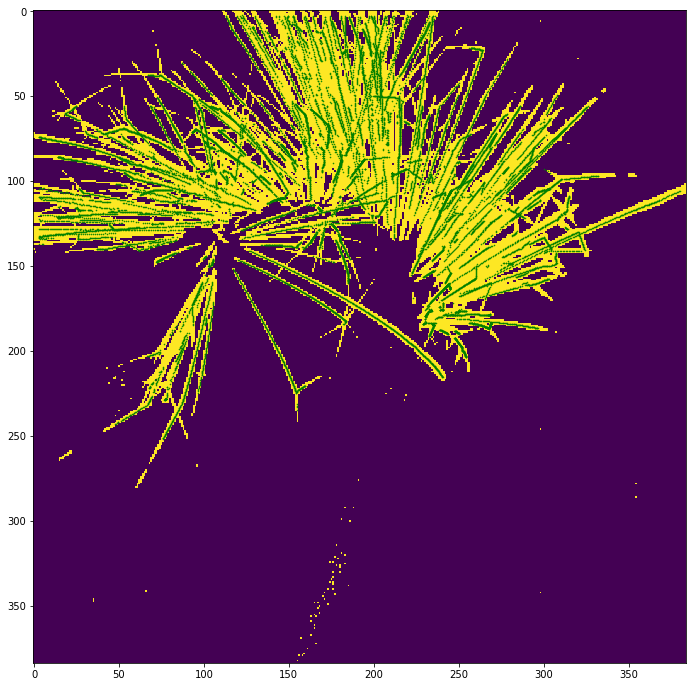

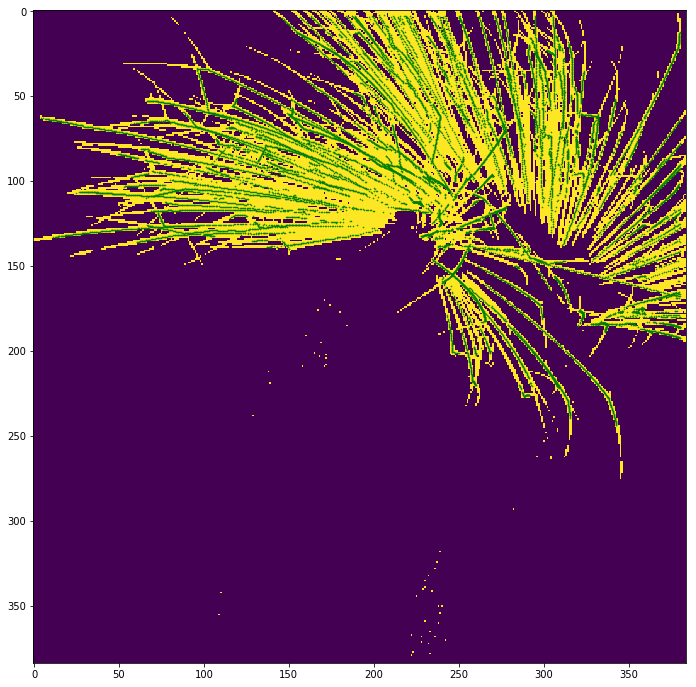

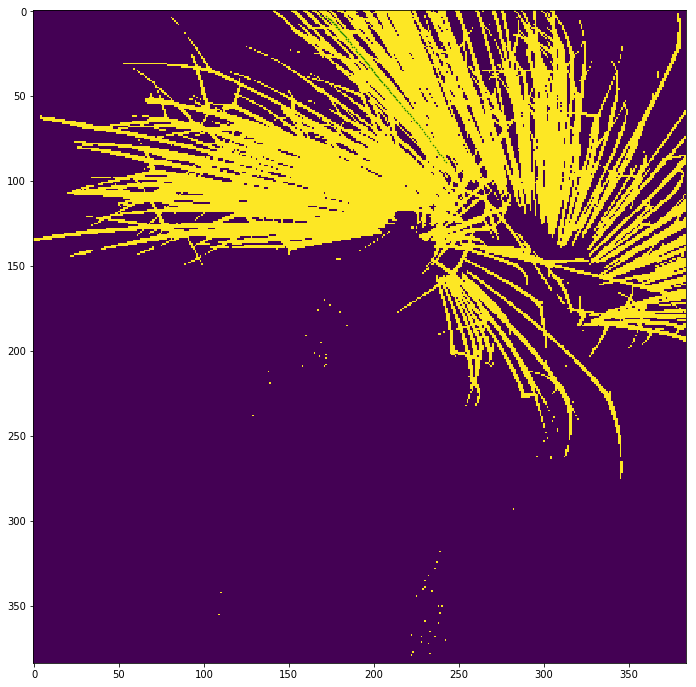

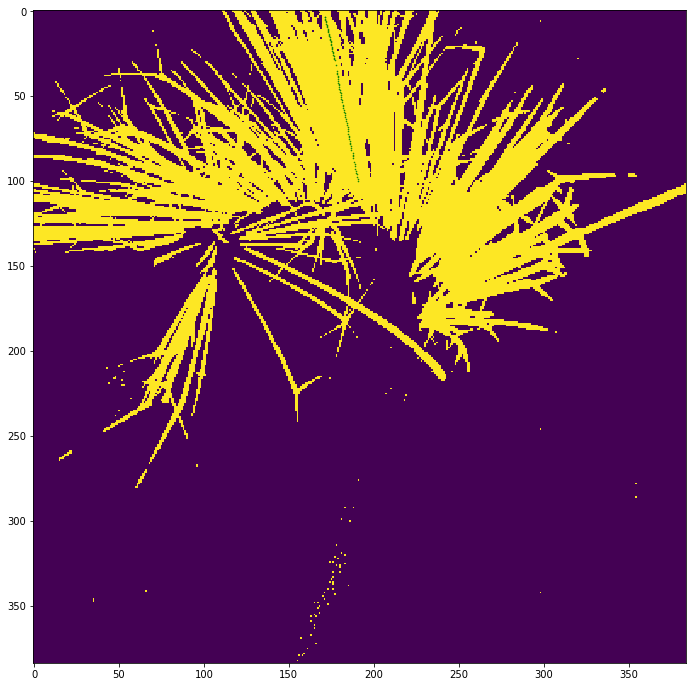

In [16]:
#t1['x'].iloc[0]
plt.figure(figsize=[12,12])
plt.imshow(FrameLSum[0])
for ip in range(len(t1)):
    x = t1['x'].iloc[ip]
    y = t1['y'].iloc[ip]
    plt.scatter(x,y,s=0.3,c='g')
plt.show()
plt.figure(figsize=[12,12])
plt.imshow(FrameRSum[0])
for ip in range(len(t2)):
    x = t2['x'].iloc[ip]
    y = t2['y'].iloc[ip]
    plt.scatter(x,y,s=0.3,c='g')
plt.show()